# Robyn: Marketing Mix Modeling Application

This notebook demonstrates the usage of Robyn, a Marketing Mix Modeling (MMM) application. We'll go through the main steps of initializing the model, running it, and performing budget allocation.



## 1. Import Required Libraries and Create Synthetic Data

First, let's import the necessary libraries and create some synthetic data for our demonstration.

In [1]:
import sys

sys.path.append("/Users/yijuilee/robynpy_release_reviews/Robyn/python/src")

import pandas as pd
import numpy as np
from robyn.robyn import Robyn
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.data.entities.calibration_input import (
    CalibrationInput,
    ChannelCalibrationData,
)
from robyn.data.entities.enums import AdstockType, DependentVarType, CalibrationScope

2024-12-02 01:43:18,170 - robyn - INFO - Logging is set up to console only.
/Users/yijuilee/robynpy_release_reviews/robynvenv_py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.1 Load simulated data.

You need to replace this with real data.

In [2]:
# Read the simulated data and holidays data
dt_simulated_weekly = pd.read_csv("resources/dt_simulated_weekly.csv")

print("Simulated Data...")
dt_simulated_weekly.head()

Simulated Data...


DATE       revenue          tv_S     ooh_S       print_S  \
0  2015-11-23  2.754372e+06  22358.346667       0.0  12728.488889   
1  2015-11-30  2.584277e+06  28613.453333       0.0      0.000000   
2  2015-12-07  2.547387e+06      0.000000  132278.4    453.866667   
3  2015-12-14  2.875220e+06  83450.306667       0.0  17680.000000   
4  2015-12-21  2.215953e+06      0.000000  277336.0      0.000000   

     facebook_I  search_clicks_P     search_S  competitor_sales_B  \
0  2.430128e+07         0.000000     0.000000             8125009   
1  5.527033e+06      9837.238486  4133.333333             7901549   
2  1.665159e+07     12044.119653  3786.666667             8300197   
3  1.054977e+07     12268.070319  4253.333333             8122883   
4  2.934090e+06      9467.248023  3613.333333             7105985   

    facebook_S events    newsletter  
0  7607.132915     na  19401.653846  
1  1141.952450     na  14791.000000  
2  4256.375378     na  14544.000000  
3  2800.490677     na   2800.000000  
4   689.582605     na  15478.000000

In [3]:
dt_prophet_holidays = pd.read_csv("resources/dt_prophet_holidays.csv")

print("Holidays Data...")
dt_prophet_holidays.head()

Holidays Data...


ds           holiday country  year
0  1995-01-01    New Year's Day      AD  1995
1  1995-01-06          Epiphany      AD  1995
2  1995-02-28          Carnival      AD  1995
3  1995-03-14  Constitution Day      AD  1995
4  1995-04-14       Good Friday      AD  1995

## 2.2. Initialize Robyn

Now, let's initialize Robyn with our synthetic data and configuration.

In [4]:
# Initialize Robyn
robyn = Robyn(working_dir="output")

# Create MMMData
mmm_data_spec = MMMData.MMMDataSpec(
    dep_var="revenue",
    dep_var_type="revenue",
    date_var="DATE",
    context_vars=["competitor_sales_B", "events"],
    paid_media_spends=["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    paid_media_vars=["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    organic_vars=["newsletter"],
    window_start="2016-01-01",
    window_end="2018-12-31",
)

mmm_data = MMMData(data=dt_simulated_weekly, mmmdata_spec=mmm_data_spec)

# Create HolidaysData (using dummy data for demonstration)
holidays_data = HolidaysData(
    dt_holidays=dt_prophet_holidays,
    prophet_vars=["trend", "season", "holiday"],
    prophet_country="DE",
    prophet_signs=["default", "default", "default"],
)

# Create Hyperparameters
hyperparameters = Hyperparameters(
    hyperparameters={
        "facebook_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "print_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "tv_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.3, 0.8],
        ),
        "search_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "ooh_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "newsletter": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
    },
    adstock=AdstockType.GEOMETRIC,
    lambda_=[0, 1],
    train_size=[0.5, 0.8],
)


## Calibration is not supported yet
# Create CalibrationInput (using dummy data for demonstration)
# calibration_input = CalibrationInput({
#     "tv_spend": ChannelCalibrationData(
#         lift_start_date=pd.Timestamp("2022-03-01"),
#         lift_end_date=pd.Timestamp("2022-03-15"),
#         lift_abs=10000,
#         spend=50000,
#         confidence=0.9,
#         metric="revenue",
#         calibration_scope=CalibrationScope.IMMEDIATE
#     )
# })

# Initialize Robyn
robyn.initialize(
    mmm_data=mmm_data,
    holidays_data=holidays_data,
    hyperparameters=hyperparameters,
)

print("Robyn initialized successfully!")

INFO: Initialized Robyn in output
2024-12-02 01:43:20,505 - robyn.robyn - INFO - Initialized Robyn in output
INFO: Validating input data
2024-12-02 01:43:20,509 - robyn.robyn - INFO - Validating input data
2024-12-02 01:43:20,510 - robyn.data.validation.mmmdata_validation - INFO - Starting complete MMMData validation
2024-12-02 01:43:20,511 - robyn.data.validation.mmmdata_validation - INFO - Missing and infinite value check passed successfully
2024-12-02 01:43:20,512 - robyn.data.validation.mmmdata_validation - INFO - No-variance check passed successfully
2024-12-02 01:43:20,512 - robyn.data.validation.mmmdata_validation - INFO - Variable names validation passed successfully
2024-12-02 01:43:20,513 - robyn.data.validation.mmmdata_validation - INFO - Date variable validation passed successfully
2024-12-02 01:43:20,513 - robyn.data.validation.mmmdata_validation - INFO - Dependent variable validation passed successfully
2024-12-02 01:43:20,513 - robyn.data.validation.mmmdata_validation - 

Adjusted window_start to the closest date in the data: 2016-01-04 00:00:00
Adjusted window_end to the closest date in the data: 2018-12-31 00:00:00
Robyn initialized successfully!


## Feature Engineering

INFO: Performing feature engineering
2024-12-02 01:43:20,533 - robyn.robyn - INFO - Performing feature engineering
2024-12-02 01:43:20,534 - robyn.modeling.feature_engineering - INFO - Starting feature engineering process
2024-12-02 01:43:20,535 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
2024-12-02 01:43:20,536 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
/Users/yijuilee/robynpy_release_reviews/robynvenv_py3.10/lib/python3.10/site-packages/prophet/forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
2024-12-02 01:43:21,095 - cmdstanpy - DEBUG - input tempfile: /var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/tmpq

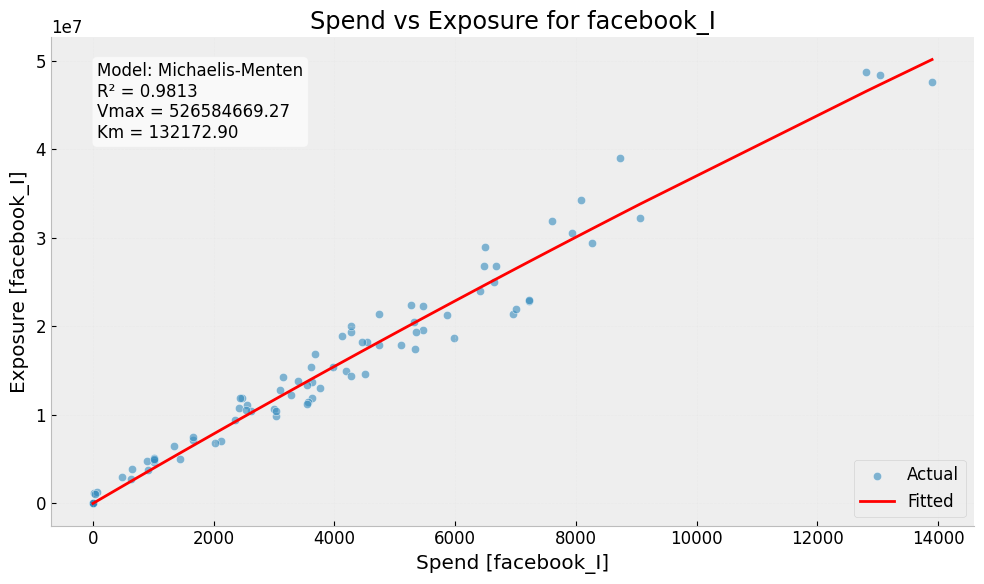

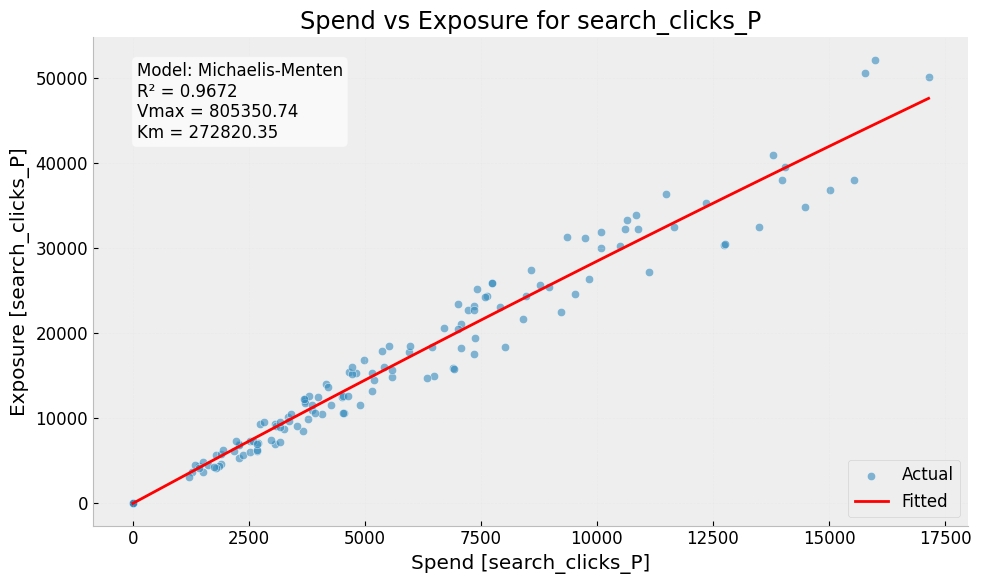

FeaturizedMMMData(dt_mod=            ds       dep_var         trend        season      holiday  \
0   2015-11-23  2.754372e+06  1.715494e+06  1.126399e+06       0.0000   
1   2015-11-30  2.584277e+06  1.716691e+06  9.011866e+05       0.0000   
2   2015-12-07  2.547387e+06  1.717888e+06  7.162881e+05       0.0000   
3   2015-12-14  2.875220e+06  1.719085e+06  6.931421e+05       0.0000   
4   2015-12-21  2.215953e+06  1.720283e+06  7.855960e+05  511758.5616   
..         ...           ...           ...           ...          ...   
203 2019-10-14  2.456240e+06  1.733547e+06  7.397506e+05       0.0000   
204 2019-10-21  2.182825e+06  1.732738e+06  7.952188e+05       0.0000   
205 2019-10-28  2.377707e+06  1.731930e+06  8.694171e+05       0.0000   
206 2019-11-04  2.732825e+06  1.731122e+06  1.015043e+06       0.0000   
207 2019-11-11  2.767788e+06  1.730314e+06  1.174804e+06       0.0000   

     competitor_sales_B  events          tv_S          ooh_S       print_S  \
0               8125

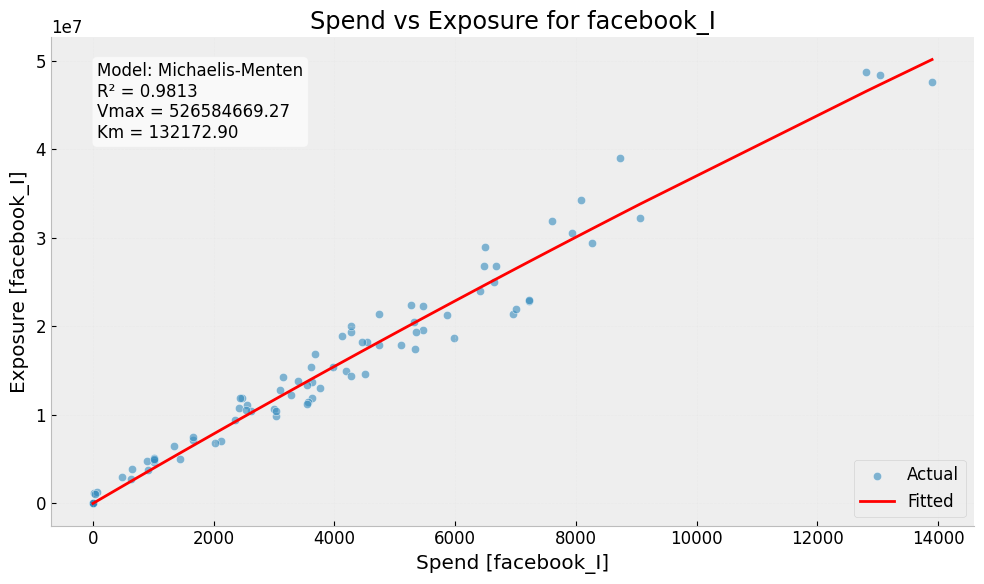

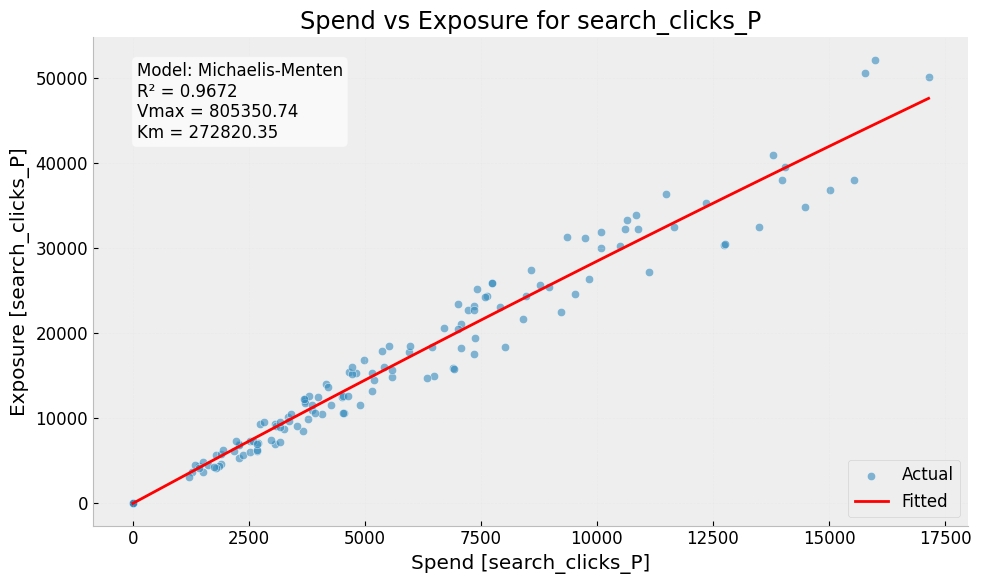

In [5]:
%matplotlib inline
robyn.feature_engineering()

## 3. Run Robyn Model

After initialization, we can run the Robyn model.

INFO: Training models
2024-12-02 01:43:21,948 - robyn.robyn - INFO - Training models
2024-12-02 01:43:21,950 - robyn.modeling.base_model_executor - INFO - Initializing BaseModelExecutor
2024-12-02 01:43:21,950 - robyn.modeling.model_executor - INFO - Starting model execution with model_name=Models.RIDGE
2024-12-02 01:43:21,951 - robyn.modeling.base_model_executor - INFO - Input validation successful
2024-12-02 01:43:21,951 - robyn.modeling.base_model_executor - INFO - Preparing hyperparameters
2024-12-02 01:43:21,951 - robyn.modeling.base_model_executor - INFO - Completed hyperparameter preparation with 20 parameters to optimize
2024-12-02 01:43:21,952 - robyn.modeling.model_executor - INFO - Initializing Ridge model builder
2024-12-02 01:43:21,952 - robyn.modeling.model_executor - INFO - Building models with configured parameters
2024-12-02 01:43:21,952 - robyn.modeling.ridge.ridge_data_builder - INFO - Collecting hyperparameters for optimization...
Running trial 1 of total 5 trials: 


Lambda Debug (iter 0):
x_means: 606617.312834
x_sds mean: 253275.779423
sx mean: 0.750020
sy mean: 1788934.055944
lambda_max: 648315902.665468
lambda_: 361107186.970813
lambda_hp: 0.556948


Running trial 1 of total 5 trials:   1%|▏                                  


Lambda Debug (iter 10):
x_means: 606394.128202
x_sds mean: 256578.880685
sx mean: 0.738880
sy mean: 1792504.688249
lambda_max: 656634040.388617
lambda_: 213123640.532847
lambda_hp: 0.324502


Running trial 1 of total 5 trials:   1%|▍                                  


Lambda Debug (iter 20):
x_means: 609076.133442
x_sds mean: 256864.437221
sx mean: 0.746045
sy mean: 1808526.446078
lambda_max: 654767318.406049
lambda_: 117307575.147828
lambda_hp: 0.179077


Running trial 1 of total 5 trials:   2%|▌                                  


Lambda Debug (iter 30):
x_means: 633624.648723
x_sds mean: 247362.029594
sx mean: 0.808382
sy mean: 1893737.115942
lambda_max: 667169055.967856
lambda_: 371608254.624043
lambda_hp: 0.556948


Running trial 1 of total 5 trials:   2%|▊                                  


Lambda Debug (iter 40):
x_means: 606394.123028
x_sds mean: 256578.881515
sx mean: 0.728130
sy mean: 1792504.688249
lambda_max: 656634040.388618
lambda_: 583715532.487333
lambda_hp: 0.888940


Running trial 1 of total 5 trials:   3%|▉                                  


Lambda Debug (iter 50):
x_means: 617295.044890
x_sds mean: 255755.186917
sx mean: 0.721087
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 426967069.878666
lambda_hp: 0.656298


Running trial 1 of total 5 trials:   3%|█                                  


Lambda Debug (iter 60):
x_means: 606617.309342
x_sds mean: 253275.777157
sx mean: 0.748717
sy mean: 1788934.055944
lambda_max: 648315902.665469
lambda_: 361107186.970813
lambda_hp: 0.556948


Running trial 1 of total 5 trials:   4%|█▎                                 


Lambda Debug (iter 70):
x_means: 629861.701434
x_sds mean: 256961.983360
sx mean: 0.742574
sy mean: 1875855.141414
lambda_max: 655382594.704675
lambda_: 334502403.023965
lambda_hp: 0.510344


Running trial 1 of total 5 trials:   4%|█▍                                 


Lambda Debug (iter 80):
x_means: 609076.124754
x_sds mean: 256864.431536
sx mean: 0.756368
sy mean: 1808526.446078
lambda_max: 654767318.406049
lambda_: 542008113.663318
lambda_hp: 0.827770


Running trial 1 of total 5 trials:   5%|█▋                                 


Lambda Debug (iter 90):
x_means: 634053.503116
x_sds mean: 244401.874341
sx mean: 0.796622
sy mean: 1891858.531073
lambda_max: 658731839.681827
lambda_: 366908787.240340
lambda_hp: 0.556948


Running trial 1 of total 5 trials:   5%|█▊                                 


Lambda Debug (iter 100):
x_means: 620033.773015
x_sds mean: 255600.416440
sx mean: 0.740219
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 202400100.182132
lambda_hp: 0.311443


Running trial 1 of total 5 trials:   6%|█▉                                 


Lambda Debug (iter 110):
x_means: 615829.797119
x_sds mean: 254892.326561
sx mean: 0.743283
sy mean: 1834364.839744
lambda_max: 650244748.922828
lambda_: 212300364.706089
lambda_hp: 0.326426


Running trial 1 of total 5 trials:   6%|██▏                                


Lambda Debug (iter 120):
x_means: 634053.499798
x_sds mean: 244401.873149
sx mean: 0.795981
sy mean: 1891858.531073
lambda_max: 658731839.681826
lambda_: 537740036.932256
lambda_hp: 0.816308


Running trial 1 of total 5 trials:   7%|██▎                                


Lambda Debug (iter 130):
x_means: 618840.501427
x_sds mean: 255861.853269
sx mean: 0.747410
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 202954390.876170
lambda_hp: 0.311443


Running trial 1 of total 5 trials:   7%|██▌                                


Lambda Debug (iter 140):
x_means: 609076.133637
x_sds mean: 256864.430072
sx mean: 0.765415
sy mean: 1808526.446078
lambda_max: 654767318.406049
lambda_: 71697236.775061
lambda_hp: 0.109411


Running trial 1 of total 5 trials:   8%|██▋                                


Lambda Debug (iter 150):
x_means: 611187.439154
x_sds mean: 250974.929251
sx mean: 0.740535
sy mean: 1809952.291667
lambda_max: 641040211.852958
lambda_: 523297898.221179
lambda_hp: 0.816308


Running trial 1 of total 5 trials:   8%|██▊                                


Lambda Debug (iter 160):
x_means: 618840.496270
x_sds mean: 255861.852337
sx mean: 0.732281
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 616442410.846296
lambda_hp: 0.946164


Running trial 1 of total 5 trials:   9%|███                                


Lambda Debug (iter 170):
x_means: 628454.480751
x_sds mean: 256936.374330
sx mean: 0.734131
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 326460435.863376
lambda_hp: 0.498176


Running trial 1 of total 5 trials:   9%|███▏                               


Lambda Debug (iter 180):
x_means: 634053.498874
x_sds mean: 244401.874567
sx mean: 0.780404
sy mean: 1891858.531073
lambda_max: 658731839.681826
lambda_: 537740036.932255
lambda_hp: 0.816308


Running trial 1 of total 5 trials:  10%|███▎                               


Lambda Debug (iter 190):
x_means: 626675.682062
x_sds mean: 256480.294851
sx mean: 0.742914
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 289239003.148725
lambda_hp: 0.441405


Running trial 1 of total 5 trials:  10%|███▌                               


Lambda Debug (iter 200):
x_means: 628454.475206
x_sds mean: 256936.379648
sx mean: 0.728243
sy mean: 1871715.060976
lambda_max: 655244970.622006
lambda_: 587467787.940518
lambda_hp: 0.896552


Running trial 1 of total 5 trials:  11%|███▋                               


Lambda Debug (iter 210):
x_means: 634053.501553
x_sds mean: 244401.873432
sx mean: 0.803787
sy mean: 1891858.531073
lambda_max: 658731839.681826
lambda_: 537740036.932255
lambda_hp: 0.816308


Running trial 1 of total 5 trials:  11%|███▉                               


Lambda Debug (iter 220):
x_means: 618840.506842
x_sds mean: 255861.856661
sx mean: 0.750150
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 202954390.876170
lambda_hp: 0.311443


Running trial 1 of total 5 trials:  12%|████                               


Lambda Debug (iter 230):
x_means: 628454.471737
x_sds mean: 256936.377320
sx mean: 0.728002
sy mean: 1871715.060976
lambda_max: 655244970.622008
lambda_: 507581704.080548
lambda_hp: 0.774622


Running trial 1 of total 5 trials:  12%|████▎                              


Lambda Debug (iter 240):
x_means: 615829.782758
x_sds mean: 254892.318537
sx mean: 0.735797
sy mean: 1834364.839744
lambda_max: 650244748.922828
lambda_: 530811802.674753
lambda_hp: 0.816308


Running trial 1 of total 5 trials:  13%|████▍                              


Lambda Debug (iter 250):
x_means: 618840.515550
x_sds mean: 255861.858791
sx mean: 0.751067
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 202954390.876170
lambda_hp: 0.311443


Running trial 1 of total 5 trials:  13%|████▌                              


Lambda Debug (iter 260):
x_means: 607090.353759
x_sds mean: 250859.378029
sx mean: 0.736643
sy mean: 1789907.766440
lambda_max: 640889992.683563
lambda_: 496461703.942099
lambda_hp: 0.774622


Running trial 1 of total 5 trials:  14%|████▊                              


Lambda Debug (iter 270):
x_means: 634053.499798
x_sds mean: 244401.873149
sx mean: 0.796668
sy mean: 1891858.531073
lambda_max: 658731839.681827
lambda_: 537740036.932256
lambda_hp: 0.816308


Running trial 1 of total 5 trials:  14%|████▉                              


Lambda Debug (iter 280):
x_means: 618840.506893
x_sds mean: 255861.856656
sx mean: 0.750170
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 202954390.876170
lambda_hp: 0.311443


Running trial 1 of total 5 trials:  15%|█████                              


Lambda Debug (iter 290):
x_means: 615829.768912
x_sds mean: 254892.313028
sx mean: 0.721533
sy mean: 1834364.839744
lambda_max: 650244748.922828
lambda_: 201069625.295416
lambda_hp: 0.309152


Running trial 1 of total 5 trials:  15%|█████▎                             


Lambda Debug (iter 300):
x_means: 634053.502001
x_sds mean: 244401.872167
sx mean: 0.799243
sy mean: 1891858.531073
lambda_max: 658731839.681827
lambda_: 173707514.238846
lambda_hp: 0.263626


Running trial 1 of total 5 trials:  16%|█████▍                             


Lambda Debug (iter 310):
x_means: 608184.360718
x_sds mean: 250153.809179
sx mean: 0.730343
sy mean: 1794519.731544
lambda_max: 637622490.793484
lambda_: 201935492.316331
lambda_hp: 0.316632


Running trial 1 of total 5 trials:  16%|█████▋                             


Lambda Debug (iter 320):
x_means: 621633.790110
x_sds mean: 255749.195516
sx mean: 0.730749
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 431694092.943860
lambda_hp: 0.664785


Running trial 1 of total 5 trials:  17%|█████▊                             


Lambda Debug (iter 330):
x_means: 634053.504730
x_sds mean: 244401.871917
sx mean: 0.803209
sy mean: 1891858.531073
lambda_max: 658731839.681826
lambda_: 173707514.238845
lambda_hp: 0.263626


Running trial 1 of total 5 trials:  17%|██████                             


Lambda Debug (iter 340):
x_means: 621633.816125
x_sds mean: 255749.203484
sx mean: 0.754355
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 339607140.407051
lambda_hp: 0.522955


Running trial 1 of total 5 trials:  18%|██████▏                            


Lambda Debug (iter 350):
x_means: 623338.301672
x_sds mean: 256015.490383
sx mean: 0.728962
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 261679693.063217
lambda_hp: 0.403178


Running trial 1 of total 5 trials:  18%|██████▎                            


Lambda Debug (iter 360):
x_means: 634053.498830
x_sds mean: 244401.870234
sx mean: 0.790382
sy mean: 1891858.531073
lambda_max: 658731839.681827
lambda_: 14963642.066808
lambda_hp: 0.022618


Running trial 1 of total 5 trials:  19%|██████▌                            


Lambda Debug (iter 370):
x_means: 621633.816125
x_sds mean: 255749.203484
sx mean: 0.754355
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 190406926.292484
lambda_hp: 0.293160


Running trial 1 of total 5 trials:  19%|██████▋                            


Lambda Debug (iter 380):
x_means: 626675.693615
x_sds mean: 256480.306062
sx mean: 0.731523
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 507536631.299512
lambda_hp: 0.774622


Running trial 1 of total 5 trials:  20%|██████▉                            


Lambda Debug (iter 390):
x_means: 613928.786588
x_sds mean: 253127.453441
sx mean: 0.734741
sy mean: 1822894.372294
lambda_max: 646684113.086841
lambda_: 170530530.050477
lambda_hp: 0.263626


Running trial 1 of total 5 trials:  20%|███████                            


Lambda Debug (iter 400):
x_means: 623338.321034
x_sds mean: 256015.502946
sx mean: 0.739720
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 491794108.499496
lambda_hp: 0.757810


Running trial 1 of total 5 trials:  21%|███████▏                           


Lambda Debug (iter 410):
x_means: 625308.882663
x_sds mean: 256620.969774
sx mean: 0.749622
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 624117050.853669
lambda_hp: 0.954140


Running trial 1 of total 5 trials:  21%|███████▍                           


Lambda Debug (iter 420):
x_means: 618840.503784
x_sds mean: 255861.854921
sx mean: 0.725253
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 619577372.247266
lambda_hp: 0.950977


Running trial 1 of total 5 trials:  22%|███████▌                           


Lambda Debug (iter 430):
x_means: 618840.493932
x_sds mean: 255861.844370
sx mean: 0.734386
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 493739645.607199
lambda_hp: 0.757810


Running trial 1 of total 5 trials:  22%|███████▊                           


Lambda Debug (iter 440):
x_means: 626675.696377
x_sds mean: 256480.306794
sx mean: 0.739803
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 599568919.583582
lambda_hp: 0.915103


Running trial 1 of total 5 trials:  23%|███████▉                           


Lambda Debug (iter 450):
x_means: 618840.513250
x_sds mean: 255861.860050
sx mean: 0.735378
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 619577372.247266
lambda_hp: 0.950977


Running trial 1 of total 5 trials:  23%|████████                           


Lambda Debug (iter 460):
x_means: 621633.793299
x_sds mean: 255749.196530
sx mean: 0.731473
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 492093096.795491
lambda_hp: 0.757810


Running trial 1 of total 5 trials:  24%|████████▎                          


Lambda Debug (iter 470):
x_means: 626675.689918
x_sds mean: 256480.301969
sx mean: 0.727359
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 31666777.379956
lambda_hp: 0.048237


Running trial 1 of total 5 trials:  24%|████████▍                          


Lambda Debug (iter 480):
x_means: 617295.063175
x_sds mean: 255755.186765
sx mean: 0.736170
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 618646880.452426
lambda_hp: 0.950977


Running trial 1 of total 5 trials:  25%|████████▋                          


Lambda Debug (iter 490):
x_means: 623338.318295
x_sds mean: 256015.501300
sx mean: 0.728371
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 491794108.499496
lambda_hp: 0.757810


Running trial 1 of total 5 trials:  25%|████████▊                          


Lambda Debug (iter 500):
x_means: 620033.783790
x_sds mean: 255600.430315
sx mean: 0.737838
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 113391682.088840
lambda_hp: 0.174438


Running trial 1 of total 5 trials:  26%|████████▉                          


Lambda Debug (iter 510):
x_means: 620033.789813
x_sds mean: 255600.431411
sx mean: 0.736741
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 617885238.511254
lambda_hp: 0.950977


Running trial 1 of total 5 trials:  26%|█████████▏                         


Lambda Debug (iter 520):
x_means: 621633.793571
x_sds mean: 255749.193478
sx mean: 0.728947
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 492093096.795491
lambda_hp: 0.757810


Running trial 1 of total 5 trials:  27%|█████████▎                         


Lambda Debug (iter 530):
x_means: 626675.685408
x_sds mean: 256480.301662
sx mean: 0.722227
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 142392295.999099
lambda_hp: 0.217253


Running trial 1 of total 5 trials:  27%|█████████▍                         


Lambda Debug (iter 540):
x_means: 618840.514021
x_sds mean: 255861.858358
sx mean: 0.741941
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 619577372.247266
lambda_hp: 0.950977


Running trial 1 of total 5 trials:  28%|█████████▋                         


Lambda Debug (iter 550):
x_means: 620033.780389
x_sds mean: 255600.426321
sx mean: 0.729415
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 358084984.710049
lambda_hp: 0.551080


Running trial 1 of total 5 trials:  28%|█████████▊                         


Lambda Debug (iter 560):
x_means: 621633.794230
x_sds mean: 255749.195772
sx mean: 0.717137
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  29%|██████████                         


Lambda Debug (iter 570):
x_means: 618840.520856
x_sds mean: 255861.865494
sx mean: 0.741923
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 119113946.812068
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  29%|██████████▏                        


Lambda Debug (iter 580):
x_means: 620033.787087
x_sds mean: 255600.430877
sx mean: 0.738424
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 178220940.320850
lambda_hp: 0.274226


Running trial 1 of total 5 trials:  30%|██████████▍                        


Lambda Debug (iter 590):
x_means: 621633.794230
x_sds mean: 255749.195772
sx mean: 0.717137
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  30%|██████████▌                        


Lambda Debug (iter 600):
x_means: 618840.508678
x_sds mean: 255861.857871
sx mean: 0.721718
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 119113946.812068
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  31%|██████████▋                        


Lambda Debug (iter 610):
x_means: 620033.787758
x_sds mean: 255600.426594
sx mean: 0.741144
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 113405689.408664
lambda_hp: 0.174459


Running trial 1 of total 5 trials:  31%|██████████▉                        


Lambda Debug (iter 620):
x_means: 623338.324678
x_sds mean: 256015.508247
sx mean: 0.726332
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 237097856.553895
lambda_hp: 0.365295


Running trial 1 of total 5 trials:  32%|███████████                        


Lambda Debug (iter 630):
x_means: 618840.508920
x_sds mean: 255861.857456
sx mean: 0.724408
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 119113946.812068
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  32%|███████████▏                       


Lambda Debug (iter 640):
x_means: 623338.317906
x_sds mean: 256015.507831
sx mean: 0.730480
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 115064768.589129
lambda_hp: 0.177228


Running trial 1 of total 5 trials:  33%|███████████▍                       


Lambda Debug (iter 650):
x_means: 621633.789345
x_sds mean: 255749.193212
sx mean: 0.714809
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  33%|███████████▌                       


Lambda Debug (iter 660):
x_means: 618840.508881
x_sds mean: 255861.857900
sx mean: 0.731276
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 120878829.781007
lambda_hp: 0.185454


Running trial 1 of total 5 trials:  34%|███████████▊                       


Lambda Debug (iter 670):
x_means: 620033.780665
x_sds mean: 255600.426308
sx mean: 0.729461
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 358084984.710050
lambda_hp: 0.551080


Running trial 1 of total 5 trials:  34%|███████████▉                       


Lambda Debug (iter 680):
x_means: 621633.794340
x_sds mean: 255749.195731
sx mean: 0.717118
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 144835812.154790
lambda_hp: 0.222973


Running trial 1 of total 5 trials:  35%|████████████▏                      


Lambda Debug (iter 690):
x_means: 621633.810706
x_sds mean: 255749.205988
sx mean: 0.740825
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  35%|████████████▎                      


Lambda Debug (iter 700):
x_means: 620033.782467
x_sds mean: 255600.428048
sx mean: 0.730011
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 71312680.270208
lambda_hp: 0.109668


Running trial 1 of total 5 trials:  36%|████████████▍                      


Lambda Debug (iter 710):
x_means: 623338.319341
x_sds mean: 256015.505342
sx mean: 0.716189
sy mean: 1853665.238095
lambda_max: 648946417.494518
lambda_: 12402154.000055
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  36%|████████████▋                      


Lambda Debug (iter 720):
x_means: 621633.804974
x_sds mean: 255749.200324
sx mean: 0.726136
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  37%|████████████▊                      


Lambda Debug (iter 730):
x_means: 620033.781910
x_sds mean: 255600.425813
sx mean: 0.728841
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 252976472.459651
lambda_hp: 0.389293


Running trial 1 of total 5 trials:  37%|████████████▉                      


Lambda Debug (iter 740):
x_means: 621633.796487
x_sds mean: 255749.195408
sx mean: 0.716289
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 123449390.904465
lambda_hp: 0.190034


Running trial 1 of total 5 trials:  38%|█████████████▏                     


Lambda Debug (iter 750):
x_means: 621633.798381
x_sds mean: 255749.200649
sx mean: 0.725922
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  38%|█████████████▎                     


Lambda Debug (iter 760):
x_means: 621633.798041
x_sds mean: 255749.195109
sx mean: 0.730724
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 142393881.155321
lambda_hp: 0.219212


Running trial 1 of total 5 trials:  39%|█████████████▌                     


Lambda Debug (iter 770):
x_means: 621633.793854
x_sds mean: 255749.195621
sx mean: 0.717072
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  39%|█████████████▋                     


Lambda Debug (iter 780):
x_means: 621633.793771
x_sds mean: 255749.197903
sx mean: 0.713301
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 60841516.767229
lambda_hp: 0.093607


Running trial 1 of total 5 trials:  40%|█████████████▊                     


Lambda Debug (iter 790):
x_means: 620033.790074
x_sds mean: 255600.432314
sx mean: 0.742624
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 77472558.741389
lambda_hp: 0.119149


Running trial 1 of total 5 trials:  40%|██████████████                     


Lambda Debug (iter 800):
x_means: 620033.804710
x_sds mean: 255600.435068
sx mean: 0.739453
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 160391121.366264
lambda_hp: 0.246781


Running trial 1 of total 5 trials:  41%|██████████████▏                    


Lambda Debug (iter 810):
x_means: 621633.801734
x_sds mean: 255749.201617
sx mean: 0.724781
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  41%|██████████████▍                    


Lambda Debug (iter 820):
x_means: 621633.809922
x_sds mean: 255749.204603
sx mean: 0.734279
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 67927709.702789
lambda_hp: 0.104521


Running trial 1 of total 5 trials:  42%|██████████████▌                    


Lambda Debug (iter 830):
x_means: 623338.309993
x_sds mean: 256015.502115
sx mean: 0.715247
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 12402154.000055
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  42%|██████████████▋                    


Lambda Debug (iter 840):
x_means: 621633.805643
x_sds mean: 255749.198560
sx mean: 0.722698
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  43%|██████████████▉                    


Lambda Debug (iter 850):
x_means: 620033.785192
x_sds mean: 255600.427623
sx mean: 0.734807
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 252976472.459651
lambda_hp: 0.389293


Running trial 1 of total 5 trials:  43%|███████████████                    


Lambda Debug (iter 860):
x_means: 621633.799804
x_sds mean: 255749.200753
sx mean: 0.732307
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 355298445.882991
lambda_hp: 0.547122


Running trial 1 of total 5 trials:  44%|███████████████▎                   


Lambda Debug (iter 870):
x_means: 621633.800294
x_sds mean: 255749.199241
sx mean: 0.724456
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  44%|███████████████▍                   


Lambda Debug (iter 880):
x_means: 620033.782247
x_sds mean: 255600.429592
sx mean: 0.720735
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 209682777.819908
lambda_hp: 0.322653


Running trial 1 of total 5 trials:  45%|███████████████▋                   


Lambda Debug (iter 890):
x_means: 621633.791499
x_sds mean: 255749.195253
sx mean: 0.716064
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  45%|███████████████▊                   


Lambda Debug (iter 900):
x_means: 621633.797006
x_sds mean: 255749.201375
sx mean: 0.724011
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 118716719.388008
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  46%|███████████████▉                   


Lambda Debug (iter 910):
x_means: 620033.790558
x_sds mean: 255600.433148
sx mean: 0.722862
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 126934909.744585
lambda_hp: 0.195284


Running trial 1 of total 5 trials:  46%|████████████████▏                  


Lambda Debug (iter 920):
x_means: 621633.791095
x_sds mean: 255749.195306
sx mean: 0.713980
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  47%|████████████████▎                  


Lambda Debug (iter 930):
x_means: 621633.799042
x_sds mean: 255749.200331
sx mean: 0.725137
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  47%|████████████████▌                  


Lambda Debug (iter 940):
x_means: 620033.789635
x_sds mean: 255600.432377
sx mean: 0.721300
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 144366598.403579
lambda_hp: 0.222115


Running trial 1 of total 5 trials:  48%|████████████████▋                  


Lambda Debug (iter 950):
x_means: 621633.795281
x_sds mean: 255749.196498
sx mean: 0.717304
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  48%|████████████████▊                  


Lambda Debug (iter 960):
x_means: 621633.801631
x_sds mean: 255749.201265
sx mean: 0.724621
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  49%|█████████████████                  


Lambda Debug (iter 970):
x_means: 620033.784032
x_sds mean: 255600.431320
sx mean: 0.722002
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 144366598.403579
lambda_hp: 0.222115


Running trial 1 of total 5 trials:  49%|█████████████████▏                 


Lambda Debug (iter 980):
x_means: 621633.799062
x_sds mean: 255749.197087
sx mean: 0.715031
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 226885129.836576
lambda_hp: 0.349343


Running trial 1 of total 5 trials:  50%|█████████████████▍                 


Lambda Debug (iter 990):
x_means: 620033.785263
x_sds mean: 255600.431441
sx mean: 0.725176
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 118788633.563298
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  50%|█████████████████▌                 


Lambda Debug (iter 1000):
x_means: 620033.784296
x_sds mean: 255600.431320
sx mean: 0.722478
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 61708955.161073
lambda_hp: 0.094885


Running trial 1 of total 5 trials:  51%|█████████████████▋                 


Lambda Debug (iter 1010):
x_means: 621633.793822
x_sds mean: 255749.195619
sx mean: 0.716934
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  51%|█████████████████▉                 


Lambda Debug (iter 1020):
x_means: 621633.792091
x_sds mean: 255749.196507
sx mean: 0.721082
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 118716719.388007
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  52%|██████████████████                 


Lambda Debug (iter 1030):
x_means: 620033.782843
x_sds mean: 255600.429822
sx mean: 0.722266
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236150111.697066
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  52%|██████████████████▎                


Lambda Debug (iter 1040):
x_means: 621633.790870
x_sds mean: 255749.194366
sx mean: 0.719630
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  53%|██████████████████▍                


Lambda Debug (iter 1050):
x_means: 621633.805701
x_sds mean: 255749.201446
sx mean: 0.728506
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 46010518.298278
lambda_hp: 0.070764


Running trial 1 of total 5 trials:  53%|██████████████████▌                


Lambda Debug (iter 1060):
x_means: 620033.784097
x_sds mean: 255600.429306
sx mean: 0.722955
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 209781541.490018
lambda_hp: 0.322805


Running trial 1 of total 5 trials:  54%|██████████████████▊                


Lambda Debug (iter 1070):
x_means: 623338.308284
x_sds mean: 256015.501108
sx mean: 0.715415
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 12402154.000055
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  54%|██████████████████▉                


Lambda Debug (iter 1080):
x_means: 620033.786082
x_sds mean: 255600.430168
sx mean: 0.725236
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 36064459.616420
lambda_hp: 0.055412


Running trial 1 of total 5 trials:  55%|███████████████████▏               


Lambda Debug (iter 1090):
x_means: 620033.779448
x_sds mean: 255600.429330
sx mean: 0.725282
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  55%|███████████████████▎               


Lambda Debug (iter 1100):
x_means: 621633.793897
x_sds mean: 255749.195434
sx mean: 0.716927
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 37267236.401088
lambda_hp: 0.057298


Running trial 1 of total 5 trials:  56%|███████████████████▍               


Lambda Debug (iter 1110):
x_means: 618840.506166
x_sds mean: 255861.856612
sx mean: 0.723564
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 119113946.812068
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  56%|███████████████████▋               


Lambda Debug (iter 1120):
x_means: 620033.788591
x_sds mean: 255600.431419
sx mean: 0.722771
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 32320024.940249
lambda_hp: 0.049648


Running trial 1 of total 5 trials:  57%|███████████████████▊               


Lambda Debug (iter 1130):
x_means: 621633.804306
x_sds mean: 255749.204045
sx mean: 0.733309
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 108393364.121397
lambda_hp: 0.166845


Running trial 1 of total 5 trials:  57%|████████████████████               


Lambda Debug (iter 1140):
x_means: 620033.779492
x_sds mean: 255600.428162
sx mean: 0.722941
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 118788633.563298
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  58%|████████████████████▏              


Lambda Debug (iter 1150):
x_means: 620033.780147
x_sds mean: 255600.430758
sx mean: 0.727709
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  58%|████████████████████▎              


Lambda Debug (iter 1160):
x_means: 621633.795497
x_sds mean: 255749.197713
sx mean: 0.724214
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 101881175.967296
lambda_hp: 0.156815


Running trial 1 of total 5 trials:  59%|████████████████████▌              


Lambda Debug (iter 1170):
x_means: 620033.784733
x_sds mean: 255600.431930
sx mean: 0.723768
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 118788633.563298
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  59%|████████████████████▋              


Lambda Debug (iter 1180):
x_means: 620033.794360
x_sds mean: 255600.437981
sx mean: 0.738829
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 354727072.686386
lambda_hp: 0.545912


Running trial 1 of total 5 trials:  60%|████████████████████▉              


Lambda Debug (iter 1190):
x_means: 621633.798312
x_sds mean: 255749.198637
sx mean: 0.722770
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  60%|█████████████████████              


Lambda Debug (iter 1200):
x_means: 621633.808527
x_sds mean: 255749.204903
sx mean: 0.726157
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 166796699.557822
lambda_hp: 0.256796


Running trial 1 of total 5 trials:  61%|█████████████████████▏             


Lambda Debug (iter 1210):
x_means: 620033.788848
x_sds mean: 255600.435381
sx mean: 0.732563
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 242261582.981547
lambda_hp: 0.372800


Running trial 1 of total 5 trials:  61%|█████████████████████▍             


Lambda Debug (iter 1220):
x_means: 618840.492951
x_sds mean: 255861.848953
sx mean: 0.714444
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 154657965.062712
lambda_hp: 0.237306


Running trial 1 of total 5 trials:  62%|█████████████████████▌             


Lambda Debug (iter 1230):
x_means: 620033.785894
x_sds mean: 255600.431473
sx mean: 0.727647
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 118788633.563298
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  62%|█████████████████████▊             


Lambda Debug (iter 1240):
x_means: 620033.775767
x_sds mean: 255600.424504
sx mean: 0.720583
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 142615985.165808
lambda_hp: 0.219421


Running trial 1 of total 5 trials:  63%|█████████████████████▉             


Lambda Debug (iter 1250):
x_means: 620033.773602
x_sds mean: 255600.423673
sx mean: 0.715690
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 12417211.272981
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  63%|██████████████████████             


Lambda Debug (iter 1260):
x_means: 620033.792954
x_sds mean: 255600.436416
sx mean: 0.742719
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 157429528.512874
lambda_hp: 0.242223


Running trial 1 of total 5 trials:  64%|██████████████████████▎            


Lambda Debug (iter 1270):
x_means: 620033.777528
x_sds mean: 255600.426682
sx mean: 0.721653
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  64%|██████████████████████▍            


Lambda Debug (iter 1280):
x_means: 620033.774889
x_sds mean: 255600.424617
sx mean: 0.716685
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 15339711.812030
lambda_hp: 0.023512


Running trial 1 of total 5 trials:  65%|██████████████████████▋            


Lambda Debug (iter 1290):
x_means: 620033.784004
x_sds mean: 255600.432230
sx mean: 0.729665
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 118788633.563298
lambda_hp: 0.182745


Running trial 1 of total 5 trials:  65%|██████████████████████▊            


Lambda Debug (iter 1300):
x_means: 623338.321672
x_sds mean: 256015.508127
sx mean: 0.723285
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 235863752.980508
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  66%|██████████████████████▉            


Lambda Debug (iter 1310):
x_means: 620033.780941
x_sds mean: 255600.429646
sx mean: 0.729703
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 8276780.525511
lambda_hp: 0.012640


Running trial 1 of total 5 trials:  66%|███████████████████████▏           


Lambda Debug (iter 1320):
x_means: 618840.508243
x_sds mean: 255861.861801
sx mean: 0.733899
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 90700610.586278
lambda_hp: 0.139129


Running trial 1 of total 5 trials:  67%|███████████████████████▎           


Lambda Debug (iter 1330):
x_means: 620033.785260
x_sds mean: 255600.430142
sx mean: 0.723328
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  67%|███████████████████████▌           


Lambda Debug (iter 1340):
x_means: 621633.809654
x_sds mean: 255749.201538
sx mean: 0.740350
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 383202791.212662
lambda_hp: 0.590100


Running trial 1 of total 5 trials:  68%|███████████████████████▋           


Lambda Debug (iter 1350):
x_means: 621633.801434
x_sds mean: 255749.194208
sx mean: 0.724333
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 380574856.115183
lambda_hp: 0.586053


Running trial 1 of total 5 trials:  68%|███████████████████████▊           


Lambda Debug (iter 1360):
x_means: 620033.789137
x_sds mean: 255600.430494
sx mean: 0.720648
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 211921043.597698
lambda_hp: 0.326098


Running trial 1 of total 5 trials:  69%|████████████████████████           


Lambda Debug (iter 1370):
x_means: 620033.773758
x_sds mean: 255600.423613
sx mean: 0.716987
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 12417211.272981
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  69%|████████████████████████▏          


Lambda Debug (iter 1380):
x_means: 620033.785738
x_sds mean: 255600.429571
sx mean: 0.724359
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 100833596.433552
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  70%|████████████████████████▎          


Lambda Debug (iter 1390):
x_means: 621633.813891
x_sds mean: 255749.206313
sx mean: 0.737710
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 236007147.340814
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  70%|████████████████████████▌          


Lambda Debug (iter 1400):
x_means: 620033.776440
x_sds mean: 255600.428067
sx mean: 0.724198
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 12417211.272981
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  71%|████████████████████████▋          


Lambda Debug (iter 1410):
x_means: 621633.802466
x_sds mean: 255749.201706
sx mean: 0.728629
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 100772552.167686
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  71%|████████████████████████▉          


Lambda Debug (iter 1420):
x_means: 620033.781476
x_sds mean: 255600.428456
sx mean: 0.717342
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  72%|█████████████████████████          


Lambda Debug (iter 1430):
x_means: 621633.792923
x_sds mean: 255749.200141
sx mean: 0.729730
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 12409693.941724
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  72%|█████████████████████████▏         


Lambda Debug (iter 1440):
x_means: 620033.783963
x_sds mean: 255600.423845
sx mean: 0.718377
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 100833596.433552
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  73%|█████████████████████████▍         


Lambda Debug (iter 1450):
x_means: 620033.782843
x_sds mean: 255600.429822
sx mean: 0.722266
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  73%|█████████████████████████▌         


Lambda Debug (iter 1460):
x_means: 620033.781805
x_sds mean: 255600.425599
sx mean: 0.722915
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 279867446.884531
lambda_hp: 0.430684


Running trial 1 of total 5 trials:  74%|█████████████████████████▊         


Lambda Debug (iter 1470):
x_means: 620033.785516
x_sds mean: 255600.429490
sx mean: 0.724741
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 170557165.602804
lambda_hp: 0.262429


Running trial 1 of total 5 trials:  74%|█████████████████████████▉         


Lambda Debug (iter 1480):
x_means: 620033.783063
x_sds mean: 255600.430079
sx mean: 0.724243
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 31070742.168806
lambda_hp: 0.047725


Running trial 1 of total 5 trials:  75%|██████████████████████████▏        


Lambda Debug (iter 1490):
x_means: 620033.777628
x_sds mean: 255600.429076
sx mean: 0.727683
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 1838046.717151
lambda_hp: 0.002729


Running trial 1 of total 5 trials:  75%|██████████████████████████▎        


Lambda Debug (iter 1500):
x_means: 620033.785169
x_sds mean: 255600.429643
sx mean: 0.724377
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 100833596.433552
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  76%|██████████████████████████▍        


Lambda Debug (iter 1510):
x_means: 623338.320664
x_sds mean: 256015.508156
sx mean: 0.728523
sy mean: 1853665.238095
lambda_max: 648946417.494518
lambda_: 59634518.011540
lambda_hp: 0.091804


Running trial 1 of total 5 trials:  76%|██████████████████████████▋        


Lambda Debug (iter 1520):
x_means: 620033.775127
x_sds mean: 255600.427726
sx mean: 0.720136
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 97433987.481542
lambda_hp: 0.149875


Running trial 1 of total 5 trials:  77%|██████████████████████████▊        


Lambda Debug (iter 1530):
x_means: 620033.785676
x_sds mean: 255600.429607
sx mean: 0.724368
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 108057783.564142
lambda_hp: 0.166227


Running trial 1 of total 5 trials:  77%|██████████████████████████▉        


Lambda Debug (iter 1540):
x_means: 620033.782580
x_sds mean: 255600.427397
sx mean: 0.717794
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  78%|███████████████████████████▏       


Lambda Debug (iter 1550):
x_means: 620033.776318
x_sds mean: 255600.428340
sx mean: 0.723561
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 12417211.272981
lambda_hp: 0.019013


Running trial 1 of total 5 trials:  78%|███████████████████████████▎       


Lambda Debug (iter 1560):
x_means: 621633.797975
x_sds mean: 255749.197036
sx mean: 0.721877
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 90337656.229018
lambda_hp: 0.139036


Running trial 1 of total 5 trials:  79%|███████████████████████████▌       


Lambda Debug (iter 1570):
x_means: 620033.784632
x_sds mean: 255600.429319
sx mean: 0.720765
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236150111.697066
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  79%|███████████████████████████▋       


Lambda Debug (iter 1580):
x_means: 620033.774417
x_sds mean: 255600.426049
sx mean: 0.722060
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 141206771.854015
lambda_hp: 0.217252


Running trial 1 of total 5 trials:  80%|███████████████████████████▊       


Lambda Debug (iter 1590):
x_means: 620033.786143
x_sds mean: 255600.429018
sx mean: 0.724073
sy mean: 1846031.037736
lambda_max: 649734293.803960
lambda_: 100833596.433552
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  80%|████████████████████████████       


Lambda Debug (iter 1600):
x_means: 620033.786166
x_sds mean: 255600.433444
sx mean: 0.732546
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 343901486.291797
lambda_hp: 0.529248


Running trial 1 of total 5 trials:  81%|████████████████████████████▏      


Lambda Debug (iter 1610):
x_means: 620033.781495
x_sds mean: 255600.424487
sx mean: 0.714349
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 81143181.038381
lambda_hp: 0.124799


Running trial 1 of total 5 trials:  81%|████████████████████████████▍      


Lambda Debug (iter 1620):
x_means: 621633.798609
x_sds mean: 255749.196854
sx mean: 0.721793
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 100772552.167686
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  82%|████████████████████████████▌      


Lambda Debug (iter 1630):
x_means: 620033.782480
x_sds mean: 255600.427369
sx mean: 0.720499
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 145251827.783320
lambda_hp: 0.223478


Running trial 1 of total 5 trials:  82%|████████████████████████████▊      


Lambda Debug (iter 1640):
x_means: 621633.792085
x_sds mean: 255749.195152
sx mean: 0.721456
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 191438126.030415
lambda_hp: 0.294749


Running trial 1 of total 5 trials:  83%|████████████████████████████▉      


Lambda Debug (iter 1650):
x_means: 620033.788688
x_sds mean: 255600.429836
sx mean: 0.724411
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 225950524.702350
lambda_hp: 0.347693


Running trial 1 of total 5 trials:  83%|█████████████████████████████      


Lambda Debug (iter 1660):
x_means: 620033.792541
x_sds mean: 255600.433946
sx mean: 0.733007
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 458996895.563028
lambda_hp: 0.706408


Running trial 1 of total 5 trials:  84%|█████████████████████████████▎     


Lambda Debug (iter 1670):
x_means: 621633.794160
x_sds mean: 255749.197729
sx mean: 0.726756
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 191438126.030415
lambda_hp: 0.294749


Running trial 1 of total 5 trials:  84%|█████████████████████████████▍     


Lambda Debug (iter 1680):
x_means: 620033.785359
x_sds mean: 255600.427444
sx mean: 0.722606
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 410370382.510737
lambda_hp: 0.631560


Running trial 1 of total 5 trials:  85%|█████████████████████████████▌     


Lambda Debug (iter 1690):
x_means: 620033.789300
x_sds mean: 255600.431425
sx mean: 0.721301
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 130045361.284986
lambda_hp: 0.200072


Running trial 1 of total 5 trials:  85%|█████████████████████████████▊     


Lambda Debug (iter 1700):
x_means: 621633.789999
x_sds mean: 255749.191752
sx mean: 0.716769
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 191438126.030415
lambda_hp: 0.294749


Running trial 1 of total 5 trials:  86%|█████████████████████████████▉     


Lambda Debug (iter 1710):
x_means: 620033.783081
x_sds mean: 255600.427749
sx mean: 0.723593
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 255297839.820471
lambda_hp: 0.392866


Running trial 1 of total 5 trials:  86%|██████████████████████████████▏    


Lambda Debug (iter 1720):
x_means: 620033.784145
x_sds mean: 255600.426431
sx mean: 0.722053
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  87%|██████████████████████████████▎    


Lambda Debug (iter 1730):
x_means: 620033.783827
x_sds mean: 255600.427910
sx mean: 0.720746
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 394394547.351609
lambda_hp: 0.606970


Running trial 1 of total 5 trials:  87%|██████████████████████████████▌    


Lambda Debug (iter 1740):
x_means: 620033.788626
x_sds mean: 255600.429767
sx mean: 0.727069
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 100833596.433552
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  88%|██████████████████████████████▋    


Lambda Debug (iter 1750):
x_means: 620033.785986
x_sds mean: 255600.431291
sx mean: 0.722748
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 205699485.298825
lambda_hp: 0.316522


Running trial 1 of total 5 trials:  88%|██████████████████████████████▊    


Lambda Debug (iter 1760):
x_means: 621633.792443
x_sds mean: 255749.195346
sx mean: 0.723465
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 191438126.030415
lambda_hp: 0.294749


Running trial 1 of total 5 trials:  89%|███████████████████████████████    


Lambda Debug (iter 1770):
x_means: 621633.797632
x_sds mean: 255749.198365
sx mean: 0.722653
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 100772552.167686
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  89%|███████████████████████████████▏   


Lambda Debug (iter 1780):
x_means: 620033.785116
x_sds mean: 255600.428249
sx mean: 0.721329
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  90%|███████████████████████████████▍   


Lambda Debug (iter 1790):
x_means: 621633.792643
x_sds mean: 255749.196216
sx mean: 0.721167
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 191438126.030415
lambda_hp: 0.294749


Running trial 1 of total 5 trials:  90%|███████████████████████████████▌   


Lambda Debug (iter 1800):
x_means: 620033.785199
x_sds mean: 255600.429475
sx mean: 0.723681
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 100833596.433552
lambda_hp: 0.155108


Running trial 1 of total 5 trials:  91%|███████████████████████████████▋   


Lambda Debug (iter 1810):
x_means: 621633.798016
x_sds mean: 255749.199850
sx mean: 0.722211
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 236007147.340815
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  91%|███████████████████████████████▉   


Lambda Debug (iter 1820):
x_means: 620033.780815
x_sds mean: 255600.432321
sx mean: 0.736024
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 174964182.599854
lambda_hp: 0.269213


Running trial 1 of total 5 trials:  92%|████████████████████████████████   


Lambda Debug (iter 1830):
x_means: 620033.786041
x_sds mean: 255600.430098
sx mean: 0.724707
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 2393798.676505
lambda_hp: 0.003585


Running trial 1 of total 5 trials:  92%|████████████████████████████████▏  


Lambda Debug (iter 1840):
x_means: 621633.793232
x_sds mean: 255749.197937
sx mean: 0.725327
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 236007147.340814
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  93%|████████████████████████████████▍  


Lambda Debug (iter 1850):
x_means: 618840.502215
x_sds mean: 255861.855852
sx mean: 0.725755
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 192078680.065787
lambda_hp: 0.294749


Running trial 1 of total 5 trials:  93%|████████████████████████████████▌  


Lambda Debug (iter 1860):
x_means: 620033.782338
x_sds mean: 255600.429039
sx mean: 0.723671
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 40813999.824678
lambda_hp: 0.062723


Running trial 1 of total 5 trials:  94%|████████████████████████████████▊  


Lambda Debug (iter 1870):
x_means: 620033.790993
x_sds mean: 255600.435937
sx mean: 0.729219
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 515151589.931603
lambda_hp: 0.792844


Running trial 1 of total 5 trials:  94%|████████████████████████████████▉  


Lambda Debug (iter 1880):
x_means: 621633.804336
x_sds mean: 255749.202830
sx mean: 0.738860
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 191438126.030415
lambda_hp: 0.294749


Running trial 1 of total 5 trials:  95%|█████████████████████████████████  


Lambda Debug (iter 1890):
x_means: 620033.785908
x_sds mean: 255600.433874
sx mean: 0.724056
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 40813999.824678
lambda_hp: 0.062723


Running trial 1 of total 5 trials:  95%|█████████████████████████████████▎ 


Lambda Debug (iter 1900):
x_means: 620033.782658
x_sds mean: 255600.430497
sx mean: 0.722372
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 216106261.554173
lambda_hp: 0.332540


Running trial 1 of total 5 trials:  96%|█████████████████████████████████▍ 


Lambda Debug (iter 1910):
x_means: 621633.792930
x_sds mean: 255749.196390
sx mean: 0.718869
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 141777935.967896
lambda_hp: 0.218263


Running trial 1 of total 5 trials:  96%|█████████████████████████████████▋ 


Lambda Debug (iter 1920):
x_means: 620033.782160
x_sds mean: 255600.429185
sx mean: 0.723497
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 40813999.824678
lambda_hp: 0.062723


Running trial 1 of total 5 trials:  97%|█████████████████████████████████▊ 


Lambda Debug (iter 1930):
x_means: 620033.791504
x_sds mean: 255600.438218
sx mean: 0.739812
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236150111.697067
lambda_hp: 0.363393


Running trial 1 of total 5 trials:  97%|██████████████████████████████████ 


Lambda Debug (iter 1940):
x_means: 621633.792580
x_sds mean: 255749.194686
sx mean: 0.721217
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 191438126.030415
lambda_hp: 0.294749


Running trial 1 of total 5 trials:  98%|██████████████████████████████████▏


Lambda Debug (iter 1950):
x_means: 620033.784877
x_sds mean: 255600.432085
sx mean: 0.728534
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 40813999.824678
lambda_hp: 0.062723


Running trial 1 of total 5 trials:  98%|██████████████████████████████████▎


Lambda Debug (iter 1960):
x_means: 620033.801234
x_sds mean: 255600.435912
sx mean: 0.741105
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 475227702.683296
lambda_hp: 0.731392


Running trial 1 of total 5 trials:  99%|██████████████████████████████████▌


Lambda Debug (iter 1970):
x_means: 621633.794996
x_sds mean: 255749.197528
sx mean: 0.724971
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 93547911.817934
lambda_hp: 0.143980


Running trial 1 of total 5 trials:  99%|██████████████████████████████████▋


Lambda Debug (iter 1980):
x_means: 620033.783786
x_sds mean: 255600.432435
sx mean: 0.729894
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 4744924.292753
lambda_hp: 0.007204


Running trial 1 of total 5 trials: 100%|██████████████████████████████████▉


Lambda Debug (iter 1990):
x_means: 620033.781241
x_sds mean: 255600.423201
sx mean: 0.713723
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 133088533.161999
lambda_hp: 0.204756


Running trial 1 of total 5 trials: 100%|███████████████████████████████████
2024-12-02 01:45:05,953 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.73 mins
Running trial 2 of total 5 trials:   0%|                                   


Lambda Debug (iter 0):
x_means: 632435.133361
x_sds mean: 250402.999334
sx mean: 0.787189
sy mean: 1891039.494048
lambda_max: 675486203.936404
lambda_: 366909514.003973
lambda_hp: 0.543133


Running trial 2 of total 5 trials:   1%|▏                                  


Lambda Debug (iter 10):
x_means: 610718.610300
x_sds mean: 256781.359139
sx mean: 0.727247
sy mean: 1820301.231343
lambda_max: 652609620.596234
lambda_: 269730411.483202
lambda_hp: 0.413252


Running trial 2 of total 5 trials:   1%|▍                                  


Lambda Debug (iter 20):
x_means: 606262.803569
x_sds mean: 254913.965465
sx mean: 0.749961
sy mean: 1789252.825059
lambda_max: 652389676.945289
lambda_: 324966425.667096
lambda_hp: 0.498067


Running trial 2 of total 5 trials:   2%|▌                                  


Lambda Debug (iter 30):
x_means: 632435.126703
x_sds mean: 250402.995355
sx mean: 0.788475
sy mean: 1891039.494048
lambda_max: 675486203.936404
lambda_: 621272963.766388
lambda_hp: 0.919734


Running trial 2 of total 5 trials:   2%|▊                                  


Lambda Debug (iter 40):
x_means: 610718.598301
x_sds mean: 256781.363622
sx mean: 0.716081
sy mean: 1820301.231343
lambda_max: 652609620.596235
lambda_: 412282452.502930
lambda_hp: 0.631708


Running trial 2 of total 5 trials:   3%|▉                                  


Lambda Debug (iter 50):
x_means: 607456.354133
x_sds mean: 250373.446040
sx mean: 0.744234
sy mean: 1791723.614865
lambda_max: 639046087.559374
lambda_: 318319756.197073
lambda_hp: 0.498067


Running trial 2 of total 5 trials:   3%|█                                  


Lambda Debug (iter 60):
x_means: 609076.103315
x_sds mean: 256864.423529
sx mean: 0.726987
sy mean: 1808526.446078
lambda_max: 654767318.406048
lambda_: 401397819.600585
lambda_hp: 0.613000


Running trial 2 of total 5 trials:   4%|█▎                                 


Lambda Debug (iter 70):
x_means: 632764.727405
x_sds mean: 242593.832123
sx mean: 0.771740
sy mean: 1886926.763889
lambda_max: 654298066.297630
lambda_: 516112442.067158
lambda_hp: 0.788782


Running trial 2 of total 5 trials:   4%|█▍                                 


Lambda Debug (iter 80):
x_means: 616669.010402
x_sds mean: 245220.801793
sx mean: 0.801165
sy mean: 1842763.565891
lambda_max: 655529014.957503
lambda_: 326530183.477561
lambda_hp: 0.498067


Running trial 2 of total 5 trials:   5%|█▋                                 


Lambda Debug (iter 90):
x_means: 615202.269107
x_sds mean: 254358.008345
sx mean: 0.735804
sy mean: 1828997.903226
lambda_max: 648906862.989073
lambda_: 397805132.610699
lambda_hp: 0.613000


Running trial 2 of total 5 trials:   5%|█▊                                 


Lambda Debug (iter 100):
x_means: 623338.279494
x_sds mean: 256015.488441
sx mean: 0.692403
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 511891044.091020
lambda_hp: 0.788782


Running trial 2 of total 5 trials:   6%|█▉                                 


Lambda Debug (iter 110):
x_means: 613928.792841
x_sds mean: 253127.465516
sx mean: 0.746968
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 322124386.991413
lambda_hp: 0.498067


Running trial 2 of total 5 trials:   6%|██▏                                


Lambda Debug (iter 120):
x_means: 629861.702958
x_sds mean: 256961.976453
sx mean: 0.731390
sy mean: 1875855.141414
lambda_max: 655382594.704677
lambda_: 58685390.498418
lambda_hp: 0.089453


Running trial 2 of total 5 trials:   7%|██▎                                


Lambda Debug (iter 130):
x_means: 606379.065692
x_sds mean: 251155.332658
sx mean: 0.738474
sy mean: 1787481.723744
lambda_max: 642638339.179050
lambda_: 15721634.879276
lambda_hp: 0.024367


Running trial 2 of total 5 trials:   7%|██▌                                


Lambda Debug (iter 140):
x_means: 612595.530500
x_sds mean: 252051.903302
sx mean: 0.727037
sy mean: 1815541.557734
lambda_max: 642358540.686028
lambda_: 319969745.598804
lambda_hp: 0.498067


Running trial 2 of total 5 trials:   8%|██▋                                


Lambda Debug (iter 150):
x_means: 629861.702958
x_sds mean: 256961.976453
sx mean: 0.731390
sy mean: 1875855.141414
lambda_max: 655382594.704676
lambda_: 58685390.498418
lambda_hp: 0.089453


Running trial 2 of total 5 trials:   8%|██▊                                


Lambda Debug (iter 160):
x_means: 606379.056774
x_sds mean: 251155.329011
sx mean: 0.713160
sy mean: 1787481.723744
lambda_max: 642638339.179050
lambda_: 55783796.659291
lambda_hp: 0.086713


Running trial 2 of total 5 trials:   9%|███                                


Lambda Debug (iter 170):
x_means: 607090.348127
x_sds mean: 250859.384902
sx mean: 0.720750
sy mean: 1789907.766440
lambda_max: 640889992.683563
lambda_: 196153469.554340
lambda_hp: 0.305995


Running trial 2 of total 5 trials:   9%|███▏                               


Lambda Debug (iter 180):
x_means: 629861.702958
x_sds mean: 256961.976453
sx mean: 0.731390
sy mean: 1875855.141414
lambda_max: 655382594.704676
lambda_: 58685390.498418
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  10%|███▎                               


Lambda Debug (iter 190):
x_means: 606379.056482
x_sds mean: 251155.324220
sx mean: 0.723098
sy mean: 1787481.723744
lambda_max: 642638339.179051
lambda_: 125272863.732220
lambda_hp: 0.194855


Running trial 2 of total 5 trials:  10%|███▌                               


Lambda Debug (iter 200):
x_means: 607090.349304
x_sds mean: 250859.385412
sx mean: 0.726777
sy mean: 1789907.766440
lambda_max: 640889992.683563
lambda_: 259157557.004270
lambda_hp: 0.404312


Running trial 2 of total 5 trials:  11%|███▋                               


Lambda Debug (iter 210):
x_means: 607456.335656
x_sds mean: 250373.450221
sx mean: 0.718833
sy mean: 1791723.614865
lambda_max: 639046087.559374
lambda_: 57222559.002818
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  11%|███▉                               


Lambda Debug (iter 220):
x_means: 606379.048045
x_sds mean: 251155.319398
sx mean: 0.720948
sy mean: 1787481.723744
lambda_max: 642638339.179051
lambda_: 125272863.732220
lambda_hp: 0.194855


Running trial 2 of total 5 trials:  12%|████                               


Lambda Debug (iter 230):
x_means: 611187.421209
x_sds mean: 250974.926561
sx mean: 0.716824
sy mean: 1809952.291667
lambda_max: 641040211.852959
lambda_: 196199446.261118
lambda_hp: 0.305995


Running trial 2 of total 5 trials:  12%|████▎                              


Lambda Debug (iter 240):
x_means: 629861.691295
x_sds mean: 256961.975351
sx mean: 0.712961
sy mean: 1875855.141414
lambda_max: 655382594.704676
lambda_: 58685390.498418
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  13%|████▍                              


Lambda Debug (iter 250):
x_means: 611187.442676
x_sds mean: 250974.934228
sx mean: 0.723591
sy mean: 1809952.291667
lambda_max: 641040211.852959
lambda_: 124961332.386293
lambda_hp: 0.194855


Running trial 2 of total 5 trials:  13%|████▌                              


Lambda Debug (iter 260):
x_means: 625308.870582
x_sds mean: 256620.965082
sx mean: 0.728948
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 200200214.772697
lambda_hp: 0.305995


Running trial 2 of total 5 trials:  14%|████▊                              


Lambda Debug (iter 270):
x_means: 629861.705722
x_sds mean: 256961.974332
sx mean: 0.729239
sy mean: 1875855.141414
lambda_max: 655382594.704676
lambda_: 58685390.498418
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  14%|████▉                              


Lambda Debug (iter 280):
x_means: 606394.136271
x_sds mean: 256578.878267
sx mean: 0.738009
sy mean: 1792504.688249
lambda_max: 656634040.388618
lambda_: 128001119.212126
lambda_hp: 0.194855


Running trial 2 of total 5 trials:  15%|█████                              


Lambda Debug (iter 290):
x_means: 613928.795404
x_sds mean: 253127.456912
sx mean: 0.725400
sy mean: 1822894.372294
lambda_max: 646684113.086841
lambda_: 198653003.892454
lambda_hp: 0.307118


Running trial 2 of total 5 trials:  15%|█████▎                             


Lambda Debug (iter 300):
x_means: 614379.833175
x_sds mean: 245767.128626
sx mean: 0.772110
sy mean: 1835225.769231
lambda_max: 658555057.517087
lambda_: 58969464.595735
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  16%|█████▍                             


Lambda Debug (iter 310):
x_means: 606379.054249
x_sds mean: 251155.323028
sx mean: 0.729654
sy mean: 1787481.723744
lambda_max: 642638339.179050
lambda_: 216133365.933179
lambda_hp: 0.336256


Running trial 2 of total 5 trials:  16%|█████▋                             


Lambda Debug (iter 320):
x_means: 613928.791862
x_sds mean: 253127.460447
sx mean: 0.732441
sy mean: 1822894.372294
lambda_max: 646684113.086841
lambda_: 377417679.760407
lambda_hp: 0.583578


Running trial 2 of total 5 trials:  17%|█████▊                             


Lambda Debug (iter 330):
x_means: 629861.691883
x_sds mean: 256961.977248
sx mean: 0.712581
sy mean: 1875855.141414
lambda_max: 655382594.704677
lambda_: 58685390.498418
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  17%|██████                             


Lambda Debug (iter 340):
x_means: 606379.048045
x_sds mean: 251155.319398
sx mean: 0.720948
sy mean: 1787481.723744
lambda_max: 642638339.179050
lambda_: 125272863.732220
lambda_hp: 0.194855


Running trial 2 of total 5 trials:  18%|██████▏                            


Lambda Debug (iter 350):
x_means: 609233.612472
x_sds mean: 250320.669474
sx mean: 0.719576
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 59956045.887641
lambda_hp: 0.093754


Running trial 2 of total 5 trials:  18%|██████▎                            


Lambda Debug (iter 360):
x_means: 623338.301167
x_sds mean: 256015.499883
sx mean: 0.714544
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 58109071.298081
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  19%|██████▌                            


Lambda Debug (iter 370):
x_means: 606379.054822
x_sds mean: 251155.315063
sx mean: 0.723796
sy mean: 1787481.723744
lambda_max: 642638339.179052
lambda_: 100192791.217193
lambda_hp: 0.155824


Running trial 2 of total 5 trials:  19%|██████▋                            


Lambda Debug (iter 380):
x_means: 612595.545327
x_sds mean: 252051.902884
sx mean: 0.736833
sy mean: 1815541.557734
lambda_max: 642358540.686027
lambda_: 307295240.917651
lambda_hp: 0.478334


Running trial 2 of total 5 trials:  20%|██████▉                            


Lambda Debug (iter 390):
x_means: 620033.763503
x_sds mean: 255600.421002
sx mean: 0.724221
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 58179620.667651
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  20%|███████                            


Lambda Debug (iter 400):
x_means: 606379.054476
x_sds mean: 251155.317699
sx mean: 0.729813
sy mean: 1787481.723744
lambda_max: 642638339.179050
lambda_: 41315149.610197
lambda_hp: 0.064196


Running trial 2 of total 5 trials:  21%|███████▏                           


Lambda Debug (iter 410):
x_means: 620033.791194
x_sds mean: 255600.422412
sx mean: 0.739966
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 336189229.530436
lambda_hp: 0.517377


Running trial 2 of total 5 trials:  21%|███████▍                           


Lambda Debug (iter 420):
x_means: 623338.311191
x_sds mean: 256015.499425
sx mean: 0.728537
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 58109071.298081
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  22%|███████▌                           


Lambda Debug (iter 430):
x_means: 629861.698817
x_sds mean: 256961.974805
sx mean: 0.734316
sy mean: 1875855.141414
lambda_max: 655382594.704677
lambda_: 402146647.616849
lambda_hp: 0.613567


Running trial 2 of total 5 trials:  22%|███████▋                           


Lambda Debug (iter 440):
x_means: 620033.792536
x_sds mean: 255600.422643
sx mean: 0.740544
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 267231122.330081
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  23%|███████▉                           


Lambda Debug (iter 450):
x_means: 626675.684274
x_sds mean: 256480.301144
sx mean: 0.734171
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 186846057.264639
lambda_hp: 0.285108


Running trial 2 of total 5 trials:  23%|████████                           


Lambda Debug (iter 460):
x_means: 606379.055035
x_sds mean: 251155.315342
sx mean: 0.724099
sy mean: 1787481.723744
lambda_max: 642638339.179051
lambda_: 100192791.217193
lambda_hp: 0.155824


Running trial 2 of total 5 trials:  24%|████████▎                          


Lambda Debug (iter 470):
x_means: 620033.790760
x_sds mean: 255600.428359
sx mean: 0.743865
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 331890807.119841
lambda_hp: 0.510761


Running trial 2 of total 5 trials:  24%|████████▍                          


Lambda Debug (iter 480):
x_means: 625308.867148
x_sds mean: 256620.971321
sx mean: 0.737177
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 132186681.771667
lambda_hp: 0.202006


Running trial 2 of total 5 trials:  25%|████████▋                          


Lambda Debug (iter 490):
x_means: 606379.050279
x_sds mean: 251155.318919
sx mean: 0.735584
sy mean: 1787481.723744
lambda_max: 642638339.179051
lambda_: 75512046.077796
lambda_hp: 0.117415


Running trial 2 of total 5 trials:  25%|████████▊                          


Lambda Debug (iter 500):
x_means: 620033.789371
x_sds mean: 255600.424035
sx mean: 0.737722
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 146192358.098108
lambda_hp: 0.224926


Running trial 2 of total 5 trials:  26%|████████▉                          


Lambda Debug (iter 510):
x_means: 623338.322352
x_sds mean: 256015.505670
sx mean: 0.743373
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 58109071.298081
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  26%|█████████▏                         


Lambda Debug (iter 520):
x_means: 606379.054822
x_sds mean: 251155.315063
sx mean: 0.723796
sy mean: 1787481.723744
lambda_max: 642638339.179050
lambda_: 131241432.823256
lambda_hp: 0.204143


Running trial 2 of total 5 trials:  27%|█████████▎                         


Lambda Debug (iter 530):
x_means: 620033.798332
x_sds mean: 255600.432527
sx mean: 0.745690
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 400642400.255227
lambda_hp: 0.616587


Running trial 2 of total 5 trials:  27%|█████████▍                         


Lambda Debug (iter 540):
x_means: 620033.764610
x_sds mean: 255600.428027
sx mean: 0.726553
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 58179620.667651
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  28%|█████████▋                         


Lambda Debug (iter 550):
x_means: 606379.064222
x_sds mean: 251155.322056
sx mean: 0.735628
sy mean: 1787481.723744
lambda_max: 642638339.179051
lambda_: 131241432.823256
lambda_hp: 0.204143


Running trial 2 of total 5 trials:  28%|█████████▊                         


Lambda Debug (iter 560):
x_means: 620033.782906
x_sds mean: 255600.420832
sx mean: 0.725065
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 267231122.330081
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  29%|██████████                         


Lambda Debug (iter 570):
x_means: 620033.760480
x_sds mean: 255600.424126
sx mean: 0.724888
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 192315005.740861
lambda_hp: 0.295920


Running trial 2 of total 5 trials:  29%|██████████▏                        


Lambda Debug (iter 580):
x_means: 606379.059436
x_sds mean: 251155.317244
sx mean: 0.719241
sy mean: 1787481.723744
lambda_max: 642638339.179050
lambda_: 87261876.174684
lambda_hp: 0.135700


Running trial 2 of total 5 trials:  30%|██████████▍                        


Lambda Debug (iter 590):
x_means: 626675.670803
x_sds mean: 256480.296170
sx mean: 0.732836
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 269473693.615319
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  30%|██████████▌                        


Lambda Debug (iter 600):
x_means: 625308.857533
x_sds mean: 256620.968648
sx mean: 0.726832
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 58571605.731873
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  31%|██████████▋                        


Lambda Debug (iter 610):
x_means: 620033.787202
x_sds mean: 255600.429065
sx mean: 0.740196
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 132690588.896657
lambda_hp: 0.204143


Running trial 2 of total 5 trials:  31%|██████████▉                        


Lambda Debug (iter 620):
x_means: 620033.779768
x_sds mean: 255600.421812
sx mean: 0.728086
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 267231122.330080
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  32%|███████████                        


Lambda Debug (iter 630):
x_means: 618840.498375
x_sds mean: 255861.852104
sx mean: 0.721290
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 96034239.382893
lambda_hp: 0.147316


Running trial 2 of total 5 trials:  32%|███████████▎                       


Lambda Debug (iter 640):
x_means: 620033.784839
x_sds mean: 255600.433641
sx mean: 0.741104
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 29967452.452071
lambda_hp: 0.046027


Running trial 2 of total 5 trials:  33%|███████████▍                       


Lambda Debug (iter 650):
x_means: 620033.782906
x_sds mean: 255600.420832
sx mean: 0.725065
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 267231122.330081
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  33%|███████████▌                       


Lambda Debug (iter 660):
x_means: 621633.783304
x_sds mean: 255749.195722
sx mean: 0.726537
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 58144398.952294
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  34%|███████████▊                       


Lambda Debug (iter 670):
x_means: 617295.073077
x_sds mean: 255755.182809
sx mean: 0.736947
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 40765032.454316
lambda_hp: 0.062570


Running trial 2 of total 5 trials:  34%|███████████▉                       


Lambda Debug (iter 680):
x_means: 620033.784086
x_sds mean: 255600.428850
sx mean: 0.728588
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 267231122.330081
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  35%|████████████▏                      


Lambda Debug (iter 690):
x_means: 606746.337364
x_sds mean: 254134.006934
sx mean: 0.733441
sy mean: 1790803.708920
lambda_max: 650349224.340846
lambda_: 58234683.830723
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  35%|████████████▎                      


Lambda Debug (iter 700):
x_means: 618840.501077
x_sds mean: 255861.851458
sx mean: 0.737183
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 133053973.887799
lambda_hp: 0.204143


Running trial 2 of total 5 trials:  36%|████████████▍                      


Lambda Debug (iter 710):
x_means: 620033.781898
x_sds mean: 255600.420812
sx mean: 0.725649
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 267231122.330081
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  36%|████████████▋                      


Lambda Debug (iter 720):
x_means: 621633.786248
x_sds mean: 255749.194493
sx mean: 0.731934
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 213671497.227639
lambda_hp: 0.328992


Running trial 2 of total 5 trials:  37%|████████████▊                      


Lambda Debug (iter 730):
x_means: 615829.801114
x_sds mean: 254892.325029
sx mean: 0.740402
sy mean: 1834364.839744
lambda_max: 650244748.922828
lambda_: 8841734.176026
lambda_hp: 0.013499


Running trial 2 of total 5 trials:  37%|█████████████                      


Lambda Debug (iter 740):
x_means: 620033.778194
x_sds mean: 255600.419977
sx mean: 0.725929
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 267231122.330081
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  38%|█████████████▏                     


Lambda Debug (iter 750):
x_means: 621633.780109
x_sds mean: 255749.195919
sx mean: 0.720296
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 58144398.952294
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  38%|█████████████▎                     


Lambda Debug (iter 760):
x_means: 613928.789476
x_sds mean: 253127.455943
sx mean: 0.738463
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 132067672.299126
lambda_hp: 0.204143


Running trial 2 of total 5 trials:  39%|█████████████▌                     


Lambda Debug (iter 770):
x_means: 606394.144920
x_sds mean: 256578.880658
sx mean: 0.747831
sy mean: 1792504.688249
lambda_max: 656634040.388618
lambda_: 165707994.961872
lambda_hp: 0.252285


Running trial 2 of total 5 trials:  39%|█████████████▋                     


Lambda Debug (iter 780):
x_means: 625308.854265
x_sds mean: 256620.967373
sx mean: 0.727686
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 58571605.731873
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  40%|█████████████▉                     


Lambda Debug (iter 790):
x_means: 623338.321750
x_sds mean: 256015.506225
sx mean: 0.739625
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 132529686.551692
lambda_hp: 0.204143


Running trial 2 of total 5 trials:  40%|██████████████                     


Lambda Debug (iter 800):
x_means: 618840.483819
x_sds mean: 255861.844343
sx mean: 0.706698
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 267962958.550180
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  41%|██████████████▏                    


Lambda Debug (iter 810):
x_means: 621633.780216
x_sds mean: 255749.194690
sx mean: 0.722777
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 23821357.540256
lambda_hp: 0.036589


Running trial 2 of total 5 trials:  41%|██████████████▍                    


Lambda Debug (iter 820):
x_means: 620033.787099
x_sds mean: 255600.428074
sx mean: 0.739646
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 132690588.896657
lambda_hp: 0.204143


Running trial 2 of total 5 trials:  42%|██████████████▌                    


Lambda Debug (iter 830):
x_means: 618840.480508
x_sds mean: 255861.842877
sx mean: 0.697999
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 267962958.550180
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  42%|██████████████▊                    


Lambda Debug (iter 840):
x_means: 606746.334852
x_sds mean: 254134.010299
sx mean: 0.733281
sy mean: 1790803.708920
lambda_max: 650349224.340847
lambda_: 66469887.304530
lambda_hp: 0.102117


Running trial 2 of total 5 trials:  43%|██████████████▉                    


Lambda Debug (iter 850):
x_means: 620033.797605
x_sds mean: 255600.425258
sx mean: 0.742594
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 132690588.896657
lambda_hp: 0.204143


Running trial 2 of total 5 trials:  43%|███████████████                    


Lambda Debug (iter 860):
x_means: 618840.486268
x_sds mean: 255861.844669
sx mean: 0.711027
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 267962958.550180
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  44%|███████████████▎                   


Lambda Debug (iter 870):
x_means: 607456.329803
x_sds mean: 250373.446266
sx mean: 0.724243
sy mean: 1791723.614865
lambda_max: 639046087.559374
lambda_: 44164580.098253
lambda_hp: 0.069017


Running trial 2 of total 5 trials:  44%|███████████████▍                   


Lambda Debug (iter 880):
x_means: 620033.787202
x_sds mean: 255600.429065
sx mean: 0.740196
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896943
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  45%|███████████████▋                   


Lambda Debug (iter 890):
x_means: 625308.845600
x_sds mean: 256620.956290
sx mean: 0.711580
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 269031591.419538
lambda_hp: 0.411234


Running trial 2 of total 5 trials:  45%|███████████████▊                   


Lambda Debug (iter 900):
x_means: 621633.783272
x_sds mean: 255749.194743
sx mean: 0.723201
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 237035929.724096
lambda_hp: 0.364977


Running trial 2 of total 5 trials:  46%|███████████████▉                   


Lambda Debug (iter 910):
x_means: 620033.785736
x_sds mean: 255600.431255
sx mean: 0.741793
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896943
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  46%|████████████████▏                  


Lambda Debug (iter 920):
x_means: 625308.860866
x_sds mean: 256620.961445
sx mean: 0.730752
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 47037472.628498
lambda_hp: 0.071818


Running trial 2 of total 5 trials:  47%|████████████████▎                  


Lambda Debug (iter 930):
x_means: 625308.864135
x_sds mean: 256620.969180
sx mean: 0.730010
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 170166845.936305
lambda_hp: 0.260075


Running trial 2 of total 5 trials:  47%|████████████████▍                  


Lambda Debug (iter 940):
x_means: 625308.858946
x_sds mean: 256620.964426
sx mean: 0.727490
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 238490628.410908
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  48%|████████████████▋                  


Lambda Debug (iter 950):
x_means: 625308.860524
x_sds mean: 256620.964068
sx mean: 0.728325
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 47037472.628498
lambda_hp: 0.071818


Running trial 2 of total 5 trials:  48%|████████████████▊                  


Lambda Debug (iter 960):
x_means: 621633.792889
x_sds mean: 255749.193261
sx mean: 0.725268
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 58144398.952294
lambda_hp: 0.089453


Running trial 2 of total 5 trials:  49%|█████████████████                  


Lambda Debug (iter 970):
x_means: 620033.786498
x_sds mean: 255600.430536
sx mean: 0.737954
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896943
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  49%|█████████████████▏                 


Lambda Debug (iter 980):
x_means: 621633.795825
x_sds mean: 255749.192353
sx mean: 0.730352
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 122060005.051458
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  50%|█████████████████▍                 


Lambda Debug (iter 990):
x_means: 620033.787778
x_sds mean: 255600.427178
sx mean: 0.740120
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  50%|█████████████████▌                 


Lambda Debug (iter 1000):
x_means: 620033.786498
x_sds mean: 255600.430536
sx mean: 0.737954
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896943
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  51%|█████████████████▋                 


Lambda Debug (iter 1010):
x_means: 621633.798570
x_sds mean: 255749.197226
sx mean: 0.734466
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 122060005.051458
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  51%|█████████████████▉                 


Lambda Debug (iter 1020):
x_means: 617295.059621
x_sds mean: 255755.185090
sx mean: 0.735771
sy mean: 1838983.853503
lambda_max: 650535194.777046
lambda_: 270383995.208042
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  52%|██████████████████                 


Lambda Debug (iter 1030):
x_means: 620033.786979
x_sds mean: 255600.431303
sx mean: 0.737068
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 77903354.820722
lambda_hp: 0.119812


Running trial 2 of total 5 trials:  52%|██████████████████▎                


Lambda Debug (iter 1040):
x_means: 621633.788992
x_sds mean: 255749.196261
sx mean: 0.725882
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 59688188.365435
lambda_hp: 0.091830


Running trial 2 of total 5 trials:  53%|██████████████████▍                


Lambda Debug (iter 1050):
x_means: 620033.787546
x_sds mean: 255600.427277
sx mean: 0.740379
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 67357409.766111
lambda_hp: 0.103580


Running trial 2 of total 5 trials:  53%|██████████████████▌                


Lambda Debug (iter 1060):
x_means: 615202.276508
x_sds mean: 254358.022022
sx mean: 0.727132
sy mean: 1828997.903226
lambda_max: 648906862.989074
lambda_: 33265771.707504
lambda_hp: 0.051169


Running trial 2 of total 5 trials:  54%|██████████████████▊                


Lambda Debug (iter 1070):
x_means: 620033.785339
x_sds mean: 255600.430903
sx mean: 0.735625
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 122133944.464916
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  54%|██████████████████▉                


Lambda Debug (iter 1080):
x_means: 618840.503803
x_sds mean: 255861.857402
sx mean: 0.737003
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 270790673.228972
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  55%|███████████████████▏               


Lambda Debug (iter 1090):
x_means: 620033.783988
x_sds mean: 255600.433088
sx mean: 0.738959
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896943
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  55%|███████████████████▎               


Lambda Debug (iter 1100):
x_means: 621633.796735
x_sds mean: 255749.196396
sx mean: 0.729487
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 153675751.249221
lambda_hp: 0.236588


Running trial 2 of total 5 trials:  56%|███████████████████▍               


Lambda Debug (iter 1110):
x_means: 620033.781896
x_sds mean: 255600.426432
sx mean: 0.735145
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  56%|███████████████████▋               


Lambda Debug (iter 1120):
x_means: 618840.500754
x_sds mean: 255861.857391
sx mean: 0.740274
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 275534999.474864
lambda_hp: 0.422857


Running trial 2 of total 5 trials:  57%|███████████████████▊               


Lambda Debug (iter 1130):
x_means: 621633.792340
x_sds mean: 255749.192348
sx mean: 0.729729
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 167899027.043477
lambda_hp: 0.258494


Running trial 2 of total 5 trials:  57%|████████████████████               


Lambda Debug (iter 1140):
x_means: 620033.785191
x_sds mean: 255600.426753
sx mean: 0.739274
sy mean: 1846031.037736
lambda_max: 649734293.803957
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  58%|████████████████████▏              


Lambda Debug (iter 1150):
x_means: 620033.785773
x_sds mean: 255600.430235
sx mean: 0.737296
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236894551.896944
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  58%|████████████████████▎              


Lambda Debug (iter 1160):
x_means: 618840.503182
x_sds mean: 255861.856573
sx mean: 0.734367
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 122468419.145424
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  59%|████████████████████▌              


Lambda Debug (iter 1170):
x_means: 620033.768143
x_sds mean: 255600.422724
sx mean: 0.727649
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 315907807.580204
lambda_hp: 0.486159


Running trial 2 of total 5 trials:  59%|████████████████████▋              


Lambda Debug (iter 1180):
x_means: 618840.508765
x_sds mean: 255861.859577
sx mean: 0.740360
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 237543308.718046
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  60%|████████████████████▉              


Lambda Debug (iter 1190):
x_means: 621633.795984
x_sds mean: 255749.199836
sx mean: 0.734008
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 122060005.051458
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  60%|█████████████████████              


Lambda Debug (iter 1200):
x_means: 620033.787778
x_sds mean: 255600.427178
sx mean: 0.740120
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  61%|█████████████████████▏             


Lambda Debug (iter 1210):
x_means: 620033.784028
x_sds mean: 255600.431541
sx mean: 0.734108
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 236894551.896944
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  61%|█████████████████████▍             


Lambda Debug (iter 1220):
x_means: 618840.493942
x_sds mean: 255861.854922
sx mean: 0.732546
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 122468419.145424
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  62%|█████████████████████▌             


Lambda Debug (iter 1230):
x_means: 618840.501006
x_sds mean: 255861.851802
sx mean: 0.737126
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 154148730.981643
lambda_hp: 0.236525


Running trial 2 of total 5 trials:  62%|█████████████████████▊             


Lambda Debug (iter 1240):
x_means: 618840.498787
x_sds mean: 255861.852755
sx mean: 0.736796
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 237543308.718046
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  63%|█████████████████████▉             


Lambda Debug (iter 1250):
x_means: 621633.799796
x_sds mean: 255749.198625
sx mean: 0.739649
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 122060005.051458
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  63%|██████████████████████             


Lambda Debug (iter 1260):
x_means: 620033.787113
x_sds mean: 255600.427945
sx mean: 0.739808
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  64%|██████████████████████▎            


Lambda Debug (iter 1270):
x_means: 620033.782544
x_sds mean: 255600.432093
sx mean: 0.735042
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 130196330.931608
lambda_hp: 0.200304


Running trial 2 of total 5 trials:  64%|██████████████████████▍            


Lambda Debug (iter 1280):
x_means: 618840.496447
x_sds mean: 255861.854595
sx mean: 0.734671
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 122468419.145424
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  65%|██████████████████████▋            


Lambda Debug (iter 1290):
x_means: 618840.497478
x_sds mean: 255861.847411
sx mean: 0.732531
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 298771672.826425
lambda_hp: 0.458527


Running trial 2 of total 5 trials:  65%|██████████████████████▊            


Lambda Debug (iter 1300):
x_means: 618840.491776
x_sds mean: 255861.851030
sx mean: 0.731176
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 237543308.718046
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  66%|██████████████████████▉            


Lambda Debug (iter 1310):
x_means: 618840.504413
x_sds mean: 255861.856677
sx mean: 0.740009
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 168988254.265583
lambda_hp: 0.259304


Running trial 2 of total 5 trials:  66%|███████████████████████▏           


Lambda Debug (iter 1320):
x_means: 618840.502492
x_sds mean: 255861.852791
sx mean: 0.735854
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 270790673.228972
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  67%|███████████████████████▎           


Lambda Debug (iter 1330):
x_means: 620033.786498
x_sds mean: 255600.430536
sx mean: 0.737954
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896943
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  67%|███████████████████████▌           


Lambda Debug (iter 1340):
x_means: 618840.488859
x_sds mean: 255861.850891
sx mean: 0.729455
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 122468419.145424
lambda_hp: 0.187894


Running trial 2 of total 5 trials:  68%|███████████████████████▋           


Lambda Debug (iter 1350):
x_means: 620033.786061
x_sds mean: 255600.427667
sx mean: 0.740690
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 69284754.100153
lambda_hp: 0.106546


Running trial 2 of total 5 trials:  68%|███████████████████████▊           


Lambda Debug (iter 1360):
x_means: 620033.783551
x_sds mean: 255600.430846
sx mean: 0.736828
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896944
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  69%|████████████████████████           


Lambda Debug (iter 1370):
x_means: 618840.494674
x_sds mean: 255861.851884
sx mean: 0.735359
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 122321515.453384
lambda_hp: 0.187669


Running trial 2 of total 5 trials:  69%|████████████████████████▏          


Lambda Debug (iter 1380):
x_means: 620033.783382
x_sds mean: 255600.426065
sx mean: 0.734152
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  70%|████████████████████████▍          


Lambda Debug (iter 1390):
x_means: 620033.779732
x_sds mean: 255600.433137
sx mean: 0.736410
sy mean: 1846031.037736
lambda_max: 649734293.803957
lambda_: 568997.474614
lambda_hp: 0.000776


Running trial 2 of total 5 trials:  70%|████████████████████████▌          


Lambda Debug (iter 1400):
x_means: 618840.493680
x_sds mean: 255861.852145
sx mean: 0.734556
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 6431362.025697
lambda_hp: 0.009772


Running trial 2 of total 5 trials:  71%|████████████████████████▋          


Lambda Debug (iter 1410):
x_means: 620033.783092
x_sds mean: 255600.426255
sx mean: 0.733934
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  71%|████████████████████████▉          


Lambda Debug (iter 1420):
x_means: 620033.786487
x_sds mean: 255600.430725
sx mean: 0.736110
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896943
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  72%|█████████████████████████          


Lambda Debug (iter 1430):
x_means: 621633.790013
x_sds mean: 255749.195169
sx mean: 0.733493
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 184640912.528883
lambda_hp: 0.284280


Running trial 2 of total 5 trials:  72%|█████████████████████████▎         


Lambda Debug (iter 1440):
x_means: 620033.784838
x_sds mean: 255600.425782
sx mean: 0.733878
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  73%|█████████████████████████▍         


Lambda Debug (iter 1450):
x_means: 618840.511767
x_sds mean: 255861.859767
sx mean: 0.738014
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 231753515.848595
lambda_hp: 0.355651


Running trial 2 of total 5 trials:  73%|█████████████████████████▌         


Lambda Debug (iter 1460):
x_means: 618840.496963
x_sds mean: 255861.854619
sx mean: 0.735233
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 185258723.014535
lambda_hp: 0.284280


Running trial 2 of total 5 trials:  74%|█████████████████████████▊         


Lambda Debug (iter 1470):
x_means: 620033.783344
x_sds mean: 255600.426038
sx mean: 0.734150
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  74%|█████████████████████████▉         


Lambda Debug (iter 1480):
x_means: 620033.793658
x_sds mean: 255600.434128
sx mean: 0.738126
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 236894551.896943
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  75%|██████████████████████████▏        


Lambda Debug (iter 1490):
x_means: 621633.798089
x_sds mean: 255749.200960
sx mean: 0.736916
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 391554919.646290
lambda_hp: 0.602964


Running trial 2 of total 5 trials:  75%|██████████████████████████▎        


Lambda Debug (iter 1500):
x_means: 620033.783137
x_sds mean: 255600.426288
sx mean: 0.738201
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  76%|██████████████████████████▍        


Lambda Debug (iter 1510):
x_means: 621633.799928
x_sds mean: 255749.200966
sx mean: 0.738201
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 236751136.859499
lambda_hp: 0.364539


Running trial 2 of total 5 trials:  76%|██████████████████████████▋        


Lambda Debug (iter 1520):
x_means: 618840.500054
x_sds mean: 255861.860531
sx mean: 0.737051
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 392865066.632420
lambda_hp: 0.602964


Running trial 2 of total 5 trials:  77%|██████████████████████████▊        


Lambda Debug (iter 1530):
x_means: 620033.779604
x_sds mean: 255600.426086
sx mean: 0.733779
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 270051114.210045
lambda_hp: 0.415575


Running trial 2 of total 5 trials:  77%|██████████████████████████▉        


Lambda Debug (iter 1540):
x_means: 620033.786747
x_sds mean: 255600.432369
sx mean: 0.739706
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 305124112.915333
lambda_hp: 0.469561


Running trial 2 of total 5 trials:  78%|███████████████████████████▏       


Lambda Debug (iter 1550):
x_means: 621633.798072
x_sds mean: 255749.202926
sx mean: 0.738081
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 165485822.727431
lambda_hp: 0.254777


Running trial 2 of total 5 trials:  78%|███████████████████████████▎       


Lambda Debug (iter 1560):
x_means: 620033.774939
x_sds mean: 255600.430708
sx mean: 0.731714
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 153851450.569054
lambda_hp: 0.236715


Running trial 2 of total 5 trials:  79%|███████████████████████████▌       


Lambda Debug (iter 1570):
x_means: 620033.790186
x_sds mean: 255600.434049
sx mean: 0.739525
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 305124112.915333
lambda_hp: 0.469561


Running trial 2 of total 5 trials:  79%|███████████████████████████▋       


Lambda Debug (iter 1580):
x_means: 621633.797803
x_sds mean: 255749.200669
sx mean: 0.736729
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 391554919.646290
lambda_hp: 0.602964


Running trial 2 of total 5 trials:  80%|███████████████████████████▉       


Lambda Debug (iter 1590):
x_means: 620033.774939
x_sds mean: 255600.430708
sx mean: 0.731714
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 153851450.569054
lambda_hp: 0.236715


Running trial 2 of total 5 trials:  80%|████████████████████████████       


Lambda Debug (iter 1600):
x_means: 617295.063700
x_sds mean: 255755.196648
sx mean: 0.740453
sy mean: 1838983.853503
lambda_max: 650535194.777044
lambda_: 60013317.307809
lambda_hp: 0.092161


Running trial 2 of total 5 trials:  81%|████████████████████████████▏      


Lambda Debug (iter 1610):
x_means: 621633.797770
x_sds mean: 255749.200778
sx mean: 0.736694
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 391554919.646290
lambda_hp: 0.602964


Running trial 2 of total 5 trials:  81%|████████████████████████████▍      


Lambda Debug (iter 1620):
x_means: 618840.501567
x_sds mean: 255861.858448
sx mean: 0.733576
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 154272786.463839
lambda_hp: 0.236715


Running trial 2 of total 5 trials:  82%|████████████████████████████▌      


Lambda Debug (iter 1630):
x_means: 620033.792404
x_sds mean: 255600.436688
sx mean: 0.740210
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 305124112.915332
lambda_hp: 0.469561


Running trial 2 of total 5 trials:  82%|████████████████████████████▊      


Lambda Debug (iter 1640):
x_means: 621633.801432
x_sds mean: 255749.204507
sx mean: 0.738985
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 17913416.054822
lambda_hp: 0.027490


Running trial 2 of total 5 trials:  83%|████████████████████████████▉      


Lambda Debug (iter 1650):
x_means: 620033.791196
x_sds mean: 255600.435246
sx mean: 0.739353
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 62070359.054715
lambda_hp: 0.095441


Running trial 2 of total 5 trials:  83%|█████████████████████████████      


Lambda Debug (iter 1660):
x_means: 620033.787775
x_sds mean: 255600.430766
sx mean: 0.737765
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 149904316.738919
lambda_hp: 0.230639


Running trial 2 of total 5 trials:  84%|█████████████████████████████▎     


Lambda Debug (iter 1670):
x_means: 620033.785727
x_sds mean: 255600.432100
sx mean: 0.735786
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 391792109.060489
lambda_hp: 0.602964


Running trial 2 of total 5 trials:  84%|█████████████████████████████▍     


Lambda Debug (iter 1680):
x_means: 618840.500917
x_sds mean: 255861.855120
sx mean: 0.735859
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 199550384.305559
lambda_hp: 0.306218


Running trial 2 of total 5 trials:  85%|█████████████████████████████▌     


Lambda Debug (iter 1690):
x_means: 620033.780500
x_sds mean: 255600.430529
sx mean: 0.737805
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 23119869.553007
lambda_hp: 0.035487


Running trial 2 of total 5 trials:  85%|█████████████████████████████▊     


Lambda Debug (iter 1700):
x_means: 621633.797757
x_sds mean: 255749.200379
sx mean: 0.736143
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 391554919.646290
lambda_hp: 0.602964


Running trial 2 of total 5 trials:  86%|█████████████████████████████▉     


Lambda Debug (iter 1710):
x_means: 618840.494580
x_sds mean: 255861.856225
sx mean: 0.731266
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 154272786.463839
lambda_hp: 0.236715


Running trial 2 of total 5 trials:  86%|██████████████████████████████▏    


Lambda Debug (iter 1720):
x_means: 620033.790871
x_sds mean: 255600.433703
sx mean: 0.737981
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 139387541.260201
lambda_hp: 0.214452


Running trial 2 of total 5 trials:  87%|██████████████████████████████▎    


Lambda Debug (iter 1730):
x_means: 621633.799819
x_sds mean: 255749.202149
sx mean: 0.738032
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 391554919.646290
lambda_hp: 0.602964


Running trial 2 of total 5 trials:  87%|██████████████████████████████▌    


Lambda Debug (iter 1740):
x_means: 620033.788557
x_sds mean: 255600.435183
sx mean: 0.740558
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 257127008.121064
lambda_hp: 0.395681


Running trial 2 of total 5 trials:  88%|██████████████████████████████▋    


Lambda Debug (iter 1750):
x_means: 620033.785530
x_sds mean: 255600.432453
sx mean: 0.734471
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 105730965.250320
lambda_hp: 0.162646


Running trial 2 of total 5 trials:  88%|██████████████████████████████▊    


Lambda Debug (iter 1760):
x_means: 620033.792252
x_sds mean: 255600.438141
sx mean: 0.738074
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 17903688.653493
lambda_hp: 0.027458


Running trial 2 of total 5 trials:  89%|███████████████████████████████    


Lambda Debug (iter 1770):
x_means: 620033.784644
x_sds mean: 255600.431626
sx mean: 0.735963
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 6488096.899375
lambda_hp: 0.009887


Running trial 2 of total 5 trials:  89%|███████████████████████████████▏   


Lambda Debug (iter 1780):
x_means: 620033.781122
x_sds mean: 255600.431428
sx mean: 0.736989
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 60887416.512132
lambda_hp: 0.093621


Running trial 2 of total 5 trials:  90%|███████████████████████████████▍   


Lambda Debug (iter 1790):
x_means: 618840.506792
x_sds mean: 255861.861165
sx mean: 0.740211
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 143464033.395020
lambda_hp: 0.220123


Running trial 2 of total 5 trials:  90%|███████████████████████████████▌   


Lambda Debug (iter 1800):
x_means: 620033.781802
x_sds mean: 255600.433122
sx mean: 0.737665
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 153851450.569054
lambda_hp: 0.236715


Running trial 2 of total 5 trials:  91%|███████████████████████████████▋   


Lambda Debug (iter 1810):
x_means: 620033.783783
x_sds mean: 255600.431633
sx mean: 0.739098
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 23119869.553007
lambda_hp: 0.035487


Running trial 2 of total 5 trials:  91%|███████████████████████████████▉   


Lambda Debug (iter 1820):
x_means: 620033.777011
x_sds mean: 255600.425614
sx mean: 0.735673
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 292202036.756439
lambda_hp: 0.449670


Running trial 2 of total 5 trials:  92%|████████████████████████████████   


Lambda Debug (iter 1830):
x_means: 620033.772831
x_sds mean: 255600.430872
sx mean: 0.731311
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 153851450.569054
lambda_hp: 0.236715


Running trial 2 of total 5 trials:  92%|████████████████████████████████▏  


Lambda Debug (iter 1840):
x_means: 621633.794111
x_sds mean: 255749.202103
sx mean: 0.734776
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 104378082.259643
lambda_hp: 0.160661


Running trial 2 of total 5 trials:  93%|████████████████████████████████▍  


Lambda Debug (iter 1850):
x_means: 620033.786741
x_sds mean: 255600.431537
sx mean: 0.739358
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 292202036.756439
lambda_hp: 0.449670


Running trial 2 of total 5 trials:  93%|████████████████████████████████▌  


Lambda Debug (iter 1860):
x_means: 620033.796213
x_sds mean: 255600.439620
sx mean: 0.739972
sy mean: 1846031.037736
lambda_max: 649734293.803957
lambda_: 87126054.506447
lambda_hp: 0.134008


Running trial 2 of total 5 trials:  94%|████████████████████████████████▊  


Lambda Debug (iter 1870):
x_means: 620033.781329
x_sds mean: 255600.428664
sx mean: 0.739373
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 222070133.252139
lambda_hp: 0.341720


Running trial 2 of total 5 trials:  94%|████████████████████████████████▉  


Lambda Debug (iter 1880):
x_means: 620033.778824
x_sds mean: 255600.428069
sx mean: 0.734293
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 173659322.819954
lambda_hp: 0.267204


Running trial 2 of total 5 trials:  95%|█████████████████████████████████  


Lambda Debug (iter 1890):
x_means: 621633.789411
x_sds mean: 255749.200075
sx mean: 0.731334
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 153758309.501151
lambda_hp: 0.236715


Running trial 2 of total 5 trials:  95%|█████████████████████████████████▎ 


Lambda Debug (iter 1900):
x_means: 620033.780669
x_sds mean: 255600.430000
sx mean: 0.737350
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 17122231.446509
lambda_hp: 0.026255


Running trial 2 of total 5 trials:  96%|█████████████████████████████████▍ 


Lambda Debug (iter 1910):
x_means: 620033.792629
x_sds mean: 255600.433320
sx mean: 0.739774
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 292202036.756439
lambda_hp: 0.449670


Running trial 2 of total 5 trials:  96%|█████████████████████████████████▋ 


Lambda Debug (iter 1920):
x_means: 621633.804928
x_sds mean: 255749.201996
sx mean: 0.734896
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 22406506.760152
lambda_hp: 0.034410


Running trial 2 of total 5 trials:  97%|█████████████████████████████████▊ 


Lambda Debug (iter 1930):
x_means: 620033.780736
x_sds mean: 255600.431672
sx mean: 0.738464
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 23119869.553007
lambda_hp: 0.035487


Running trial 2 of total 5 trials:  97%|█████████████████████████████████▉ 


Lambda Debug (iter 1940):
x_means: 621633.804383
x_sds mean: 255749.198510
sx mean: 0.737870
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 292025138.783450
lambda_hp: 0.449670


Running trial 2 of total 5 trials:  98%|██████████████████████████████████▏


Lambda Debug (iter 1950):
x_means: 620033.790634
x_sds mean: 255600.440406
sx mean: 0.739147
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 102341150.990221
lambda_hp: 0.157428


Running trial 2 of total 5 trials:  98%|██████████████████████████████████▎


Lambda Debug (iter 1960):
x_means: 620033.778107
x_sds mean: 255600.429730
sx mean: 0.736696
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 252955785.171445
lambda_hp: 0.389261


Running trial 2 of total 5 trials:  99%|██████████████████████████████████▌


Lambda Debug (iter 1970):
x_means: 620033.793371
x_sds mean: 255600.432790
sx mean: 0.739643
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 46477192.172620
lambda_hp: 0.071440


Running trial 2 of total 5 trials:  99%|██████████████████████████████████▋


Lambda Debug (iter 1980):
x_means: 621633.793421
x_sds mean: 255749.196443
sx mean: 0.734757
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 280076199.012402
lambda_hp: 0.431267


Running trial 2 of total 5 trials: 100%|██████████████████████████████████▉


Lambda Debug (iter 1990):
x_means: 620033.779252
x_sds mean: 255600.430944
sx mean: 0.735548
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 23119869.553007
lambda_hp: 0.035487


Running trial 2 of total 5 trials: 100%|███████████████████████████████████
2024-12-02 01:46:52,338 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.77 mins
Running trial 3 of total 5 trials:   0%|                                   


Lambda Debug (iter 0):
x_means: 606746.339899
x_sds mean: 254134.009769
sx mean: 0.738383
sy mean: 1790803.708920
lambda_max: 650349224.340847
lambda_: 502111111.135652
lambda_hp: 0.772041


Running trial 3 of total 5 trials:   1%|▏                                  


Lambda Debug (iter 10):
x_means: 623316.768985
x_sds mean: 251703.364769
sx mean: 0.795812
sy mean: 1850203.177570
lambda_max: 673003037.545954
lambda_: 471263004.409428
lambda_hp: 0.700209


Running trial 3 of total 5 trials:   1%|▍                                  


Lambda Debug (iter 20):
x_means: 617295.051389
x_sds mean: 255755.180288
sx mean: 0.725021
sy mean: 1838983.853503
lambda_max: 650535194.777046
lambda_: 488073595.266154
lambda_hp: 0.750240


Running trial 3 of total 5 trials:   2%|▌                                  


Lambda Debug (iter 30):
x_means: 621633.787469
x_sds mean: 255749.191786
sx mean: 0.730349
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 501332656.825527
lambda_hp: 0.772041


Running trial 3 of total 5 trials:   2%|▋                                  


Lambda Debug (iter 40):
x_means: 625319.628600
x_sds mean: 251488.140231
sx mean: 0.794718
sy mean: 1854001.265432
lambda_max: 670748475.513579
lambda_: 469684272.044596
lambda_hp: 0.700209


Running trial 3 of total 5 trials:   3%|▉                                  


Lambda Debug (iter 50):
x_means: 617295.054448
x_sds mean: 255755.183936
sx mean: 0.727483
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 488073595.266153
lambda_hp: 0.750240


Running trial 3 of total 5 trials:   3%|█                                  


Lambda Debug (iter 60):
x_means: 629038.146419
x_sds mean: 251107.138321
sx mean: 0.781011
sy mean: 1876898.484848
lambda_max: 675661420.240867
lambda_: 359798665.841565
lambda_hp: 0.532467


Running trial 3 of total 5 trials:   4%|█▎                                 


Lambda Debug (iter 70):
x_means: 621372.714416
x_sds mean: 243622.040604
sx mean: 0.791279
sy mean: 1858638.700787
lambda_max: 648355605.700069
lambda_: 454003910.267709
lambda_hp: 0.700209


Running trial 3 of total 5 trials:   4%|█▍                                 


Lambda Debug (iter 80):
x_means: 617295.058654
x_sds mean: 255755.188357
sx mean: 0.731138
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 348313872.240560
lambda_hp: 0.535380


Running trial 3 of total 5 trials:   5%|█▋                                 


Lambda Debug (iter 90):
x_means: 621633.798263
x_sds mean: 255749.193734
sx mean: 0.735353
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 619514089.796177
lambda_hp: 0.954061


Running trial 3 of total 5 trials:   5%|█▊                                 


Lambda Debug (iter 100):
x_means: 625319.625397
x_sds mean: 251488.139355
sx mean: 0.787581
sy mean: 1854001.265432
lambda_max: 670748475.513579
lambda_: 469684272.044596
lambda_hp: 0.700209


Running trial 3 of total 5 trials:   6%|█▉                                 


Lambda Debug (iter 110):
x_means: 617295.056023
x_sds mean: 255755.181559
sx mean: 0.713387
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 368400155.232558
lambda_hp: 0.566260


Running trial 3 of total 5 trials:   6%|██▏                                


Lambda Debug (iter 120):
x_means: 621633.798649
x_sds mean: 255749.193904
sx mean: 0.735399
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 619514089.796178
lambda_hp: 0.954061


Running trial 3 of total 5 trials:   7%|██▎                                


Lambda Debug (iter 130):
x_means: 625319.639842
x_sds mean: 251488.135320
sx mean: 0.799199
sy mean: 1854001.265432
lambda_max: 670748475.513578
lambda_: 353566317.305287
lambda_hp: 0.527075


Running trial 3 of total 5 trials:   7%|██▌                                


Lambda Debug (iter 140):
x_means: 617295.057477
x_sds mean: 255755.182098
sx mean: 0.715938
sy mean: 1838983.853503
lambda_max: 650535194.777046
lambda_: 368400155.232559
lambda_hp: 0.566260


Running trial 3 of total 5 trials:   8%|██▋                                


Lambda Debug (iter 150):
x_means: 620033.780752
x_sds mean: 255600.426909
sx mean: 0.727161
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 619889368.401231
lambda_hp: 0.954061


Running trial 3 of total 5 trials:   8%|██▊                                


Lambda Debug (iter 160):
x_means: 629000.210692
x_sds mean: 240965.641641
sx mean: 0.800206
sy mean: 1876062.994580
lambda_max: 650561380.722525
lambda_: 455548480.063300
lambda_hp: 0.700209


Running trial 3 of total 5 trials:   9%|███                                


Lambda Debug (iter 170):
x_means: 609233.616766
x_sds mean: 250320.662291
sx mean: 0.719980
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 361804621.856774
lambda_hp: 0.566260


Running trial 3 of total 5 trials:   9%|███▏                               


Lambda Debug (iter 180):
x_means: 621633.797544
x_sds mean: 255749.193933
sx mean: 0.734321
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 619514089.796177
lambda_hp: 0.954061


Running trial 3 of total 5 trials:  10%|███▎                               


Lambda Debug (iter 190):
x_means: 611733.018859
x_sds mean: 256264.239882
sx mean: 0.735379
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 455460465.215708
lambda_hp: 0.700209


Running trial 3 of total 5 trials:  10%|███▌                               


Lambda Debug (iter 200):
x_means: 608184.364863
x_sds mean: 250153.803204
sx mean: 0.720838
sy mean: 1794519.731544
lambda_max: 637622490.793484
lambda_: 443965391.828161
lambda_hp: 0.696252


Running trial 3 of total 5 trials:  11%|███▋                               


Lambda Debug (iter 210):
x_means: 607456.368364
x_sds mean: 250373.457411
sx mean: 0.729722
sy mean: 1791723.614865
lambda_max: 639046087.559375
lambda_: 408241178.046732
lambda_hp: 0.638793


Running trial 3 of total 5 trials:  11%|███▉                               


Lambda Debug (iter 220):
x_means: 617295.058014
x_sds mean: 255755.186315
sx mean: 0.730985
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 455530143.641840
lambda_hp: 0.700209


Running trial 3 of total 5 trials:  12%|████                               


Lambda Debug (iter 230):
x_means: 615202.301618
x_sds mean: 254358.017910
sx mean: 0.719810
sy mean: 1828997.903226
lambda_max: 648906862.989073
lambda_: 367478025.748596
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  12%|████▎                              


Lambda Debug (iter 240):
x_means: 623338.311937
x_sds mean: 256015.504491
sx mean: 0.731266
sy mean: 1853665.238095
lambda_max: 648946417.494520
lambda_: 619137682.438994
lambda_hp: 0.954061


Running trial 3 of total 5 trials:  13%|████▍                              


Lambda Debug (iter 250):
x_means: 617295.049107
x_sds mean: 255755.184910
sx mean: 0.731417
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 455530143.641840
lambda_hp: 0.700209


Running trial 3 of total 5 trials:  13%|████▌                              


Lambda Debug (iter 260):
x_means: 618840.509266
x_sds mean: 255861.861472
sx mean: 0.729774
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 623138637.154462
lambda_hp: 0.956443


Running trial 3 of total 5 trials:  14%|████▊                              


Lambda Debug (iter 270):
x_means: 621633.802868
x_sds mean: 255749.193023
sx mean: 0.733121
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 590881619.724203
lambda_hp: 0.909962


Running trial 3 of total 5 trials:  14%|████▉                              


Lambda Debug (iter 280):
x_means: 617295.058014
x_sds mean: 255755.186315
sx mean: 0.730985
sy mean: 1838983.853503
lambda_max: 650535194.777046
lambda_: 556883461.448627
lambda_hp: 0.856025


Running trial 3 of total 5 trials:  15%|█████▏                             


Lambda Debug (iter 290):
x_means: 609233.617442
x_sds mean: 250320.662099
sx mean: 0.724804
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 567485947.024628
lambda_hp: 0.888228


Running trial 3 of total 5 trials:  15%|█████▎                             


Lambda Debug (iter 300):
x_means: 621633.793962
x_sds mean: 255749.183555
sx mean: 0.726906
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 431467219.785319
lambda_hp: 0.664436


Running trial 3 of total 5 trials:  16%|█████▍                             


Lambda Debug (iter 310):
x_means: 617295.055086
x_sds mean: 255755.185541
sx mean: 0.730767
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 455530143.641840
lambda_hp: 0.700209


Running trial 3 of total 5 trials:  16%|█████▌                             


Lambda Debug (iter 320):
x_means: 609233.616766
x_sds mean: 250320.662291
sx mean: 0.719980
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 432632009.772254
lambda_hp: 0.677131


Running trial 3 of total 5 trials:  17%|█████▊                             


Lambda Debug (iter 330):
x_means: 621633.800814
x_sds mean: 255749.194069
sx mean: 0.733588
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 590881619.724204
lambda_hp: 0.909962


Running trial 3 of total 5 trials:  17%|██████                             


Lambda Debug (iter 340):
x_means: 617295.050972
x_sds mean: 255755.178983
sx mean: 0.735006
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 455530143.641840
lambda_hp: 0.700209


Running trial 3 of total 5 trials:  18%|██████▏                            


Lambda Debug (iter 350):
x_means: 609233.619166
x_sds mean: 250320.670175
sx mean: 0.728740
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 621436309.521938
lambda_hp: 0.972681


Running trial 3 of total 5 trials:  18%|██████▎                            


Lambda Debug (iter 360):
x_means: 630319.242312
x_sds mean: 256289.070630
sx mean: 0.736303
sy mean: 1876360.271084
lambda_max: 653336343.122366
lambda_: 594517315.310178
lambda_hp: 0.909962


Running trial 3 of total 5 trials:  19%|██████▌                            


Lambda Debug (iter 370):
x_means: 620033.784747
x_sds mean: 255600.416332
sx mean: 0.732992
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 443675963.151619
lambda_hp: 0.682826


Running trial 3 of total 5 trials:  19%|██████▋                            


Lambda Debug (iter 380):
x_means: 609233.600683
x_sds mean: 250320.666076
sx mean: 0.724102
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 360573899.605246
lambda_hp: 0.564333


Running trial 3 of total 5 trials:  20%|██████▊                            


Lambda Debug (iter 390):
x_means: 617295.060698
x_sds mean: 255755.181430
sx mean: 0.732187
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 591968350.735382
lambda_hp: 0.909962


Running trial 3 of total 5 trials:  20%|███████                            


Lambda Debug (iter 400):
x_means: 621633.803902
x_sds mean: 255749.198230
sx mean: 0.740103
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 549805015.793814
lambda_hp: 0.846697


Running trial 3 of total 5 trials:  21%|███████▏                           


Lambda Debug (iter 410):
x_means: 625308.863805
x_sds mean: 256620.970411
sx mean: 0.724702
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 370425641.869307
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  21%|███████▍                           


Lambda Debug (iter 420):
x_means: 618840.497382
x_sds mean: 255861.851989
sx mean: 0.739195
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 446552145.346731
lambda_hp: 0.685376


Running trial 3 of total 5 trials:  22%|███████▌                           


Lambda Debug (iter 430):
x_means: 620033.783098
x_sds mean: 255600.414190
sx mean: 0.732361
sy mean: 1846031.037736
lambda_max: 649734293.803957
lambda_: 443675963.151618
lambda_hp: 0.682826


Running trial 3 of total 5 trials:  22%|███████▊                           


Lambda Debug (iter 440):
x_means: 612595.552082
x_sds mean: 252051.902426
sx mean: 0.729965
sy mean: 1815541.557734
lambda_max: 642358540.686027
lambda_: 363769689.947054
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  23%|███████▉                           


Lambda Debug (iter 450):
x_means: 621633.798519
x_sds mean: 255749.189570
sx mean: 0.730853
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 639087104.465187
lambda_hp: 0.984207


Running trial 3 of total 5 trials:  23%|████████                           


Lambda Debug (iter 460):
x_means: 623338.321529
x_sds mean: 256015.501536
sx mean: 0.729736
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 355811768.212259
lambda_hp: 0.548246


Running trial 3 of total 5 trials:  24%|████████▎                          


Lambda Debug (iter 470):
x_means: 609233.626093
x_sds mean: 250320.662324
sx mean: 0.727262
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 361804621.856774
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  24%|████████▍                          


Lambda Debug (iter 480):
x_means: 620033.790288
x_sds mean: 255600.422197
sx mean: 0.732909
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 591239553.843304
lambda_hp: 0.909962


Running trial 3 of total 5 trials:  25%|████████▋                          


Lambda Debug (iter 490):
x_means: 620033.788080
x_sds mean: 255600.417894
sx mean: 0.733272
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 443675963.151619
lambda_hp: 0.682826


Running trial 3 of total 5 trials:  25%|████████▊                          


Lambda Debug (iter 500):
x_means: 609233.625711
x_sds mean: 250320.661782
sx mean: 0.726666
sy mean: 1799909.655556
lambda_max: 638888547.705017
lambda_: 361804621.856774
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  26%|████████▉                          


Lambda Debug (iter 510):
x_means: 621633.809722
x_sds mean: 255749.191604
sx mean: 0.733879
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 590881619.724204
lambda_hp: 0.909962


Running trial 3 of total 5 trials:  26%|█████████▏                         


Lambda Debug (iter 520):
x_means: 620033.796992
x_sds mean: 255600.428629
sx mean: 0.724692
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 546432104.409724
lambda_hp: 0.840993


Running trial 3 of total 5 trials:  27%|█████████▎                         


Lambda Debug (iter 530):
x_means: 611187.436947
x_sds mean: 250974.919578
sx mean: 0.721464
sy mean: 1809952.291667
lambda_max: 641040211.852958
lambda_: 35365769.116022
lambda_hp: 0.055075


Running trial 3 of total 5 trials:  27%|█████████▍                         


Lambda Debug (iter 540):
x_means: 620033.790496
x_sds mean: 255600.422131
sx mean: 0.731015
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 591239553.843305
lambda_hp: 0.909962


Running trial 3 of total 5 trials:  28%|█████████▋                         


Lambda Debug (iter 550):
x_means: 620033.792820
x_sds mean: 255600.423723
sx mean: 0.730822
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 596591760.970402
lambda_hp: 0.918201


Running trial 3 of total 5 trials:  28%|█████████▊                         


Lambda Debug (iter 560):
x_means: 620033.801164
x_sds mean: 255600.423385
sx mean: 0.739760
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 367946602.457582
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  29%|██████████                         


Lambda Debug (iter 570):
x_means: 621633.812718
x_sds mean: 255749.194893
sx mean: 0.737054
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 307131753.156399
lambda_hp: 0.472937


Running trial 3 of total 5 trials:  29%|██████████▏                        


Lambda Debug (iter 580):
x_means: 625308.882263
x_sds mean: 256620.965902
sx mean: 0.735630
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 116206049.449737
lambda_hp: 0.177572


Running trial 3 of total 5 trials:  30%|██████████▍                        


Lambda Debug (iter 590):
x_means: 620033.797056
x_sds mean: 255600.423485
sx mean: 0.745351
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 365321514.962613
lambda_hp: 0.562219


Running trial 3 of total 5 trials:  30%|██████████▌                        


Lambda Debug (iter 600):
x_means: 621633.813862
x_sds mean: 255749.194352
sx mean: 0.739198
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 307131753.156399
lambda_hp: 0.472937


Running trial 3 of total 5 trials:  31%|██████████▋                        


Lambda Debug (iter 610):
x_means: 625308.882291
x_sds mean: 256620.965915
sx mean: 0.735922
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 116206049.449737
lambda_hp: 0.177572


Running trial 3 of total 5 trials:  31%|██████████▉                        


Lambda Debug (iter 620):
x_means: 618840.532676
x_sds mean: 255861.858568
sx mean: 0.739998
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  32%|███████████                        


Lambda Debug (iter 630):
x_means: 621633.814052
x_sds mean: 255749.195760
sx mean: 0.737856
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 100650555.050033
lambda_hp: 0.154920


Running trial 3 of total 5 trials:  32%|███████████▎                       


Lambda Debug (iter 640):
x_means: 626675.699293
x_sds mean: 256480.304712
sx mean: 0.737706
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 116397011.965900
lambda_hp: 0.177572


Running trial 3 of total 5 trials:  33%|███████████▍                       


Lambda Debug (iter 650):
x_means: 620033.811090
x_sds mean: 255600.432762
sx mean: 0.740710
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 367946602.457582
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  33%|███████████▌                       


Lambda Debug (iter 660):
x_means: 620033.794404
x_sds mean: 255600.421161
sx mean: 0.733188
sy mean: 1846031.037736
lambda_max: 649734293.803957
lambda_: 242646708.021956
lambda_hp: 0.373393


Running trial 3 of total 5 trials:  34%|███████████▊                       


Lambda Debug (iter 670):
x_means: 625308.882398
x_sds mean: 256620.965917
sx mean: 0.736767
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 176259595.371805
lambda_hp: 0.269391


Running trial 3 of total 5 trials:  34%|███████████▉                       


Lambda Debug (iter 680):
x_means: 617295.089852
x_sds mean: 255755.196933
sx mean: 0.743723
sy mean: 1838983.853503
lambda_max: 650535194.777046
lambda_: 84403388.393230
lambda_hp: 0.129658


Running trial 3 of total 5 trials:  35%|████████████                       


Lambda Debug (iter 690):
x_means: 620033.794404
x_sds mean: 255600.421161
sx mean: 0.733188
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 242646708.021956
lambda_hp: 0.373393


Running trial 3 of total 5 trials:  35%|████████████▎                      


Lambda Debug (iter 700):
x_means: 618840.532248
x_sds mean: 255861.858834
sx mean: 0.739990
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 362862507.728389
lambda_hp: 0.556909


Running trial 3 of total 5 trials:  36%|████████████▍                      


Lambda Debug (iter 710):
x_means: 623338.343959
x_sds mean: 256015.502747
sx mean: 0.739803
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 367500425.591162
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  36%|████████████▋                      


Lambda Debug (iter 720):
x_means: 620033.784309
x_sds mean: 255600.414610
sx mean: 0.721014
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 252364302.474617
lambda_hp: 0.388350


Running trial 3 of total 5 trials:  37%|████████████▊                      


Lambda Debug (iter 730):
x_means: 623338.331652
x_sds mean: 256015.503857
sx mean: 0.736308
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 361432680.328341
lambda_hp: 0.556909


Running trial 3 of total 5 trials:  37%|█████████████                      


Lambda Debug (iter 740):
x_means: 618840.535709
x_sds mean: 255861.857525
sx mean: 0.737477
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 226029842.035902
lambda_hp: 0.346865


Running trial 3 of total 5 trials:  38%|█████████████▏                     


Lambda Debug (iter 750):
x_means: 620033.791953
x_sds mean: 255600.421792
sx mean: 0.733412
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 179101418.223314
lambda_hp: 0.275581


Running trial 3 of total 5 trials:  38%|█████████████▎                     


Lambda Debug (iter 760):
x_means: 628454.505775
x_sds mean: 256936.384515
sx mean: 0.740838
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 364940678.643283
lambda_hp: 0.556909


Running trial 3 of total 5 trials:  39%|█████████████▌                     


Lambda Debug (iter 770):
x_means: 618840.532676
x_sds mean: 255861.858568
sx mean: 0.739998
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  39%|█████████████▋                     


Lambda Debug (iter 780):
x_means: 623338.342469
x_sds mean: 256015.505846
sx mean: 0.747506
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 242352471.447656
lambda_hp: 0.373393


Running trial 3 of total 5 trials:  40%|█████████████▊                     


Lambda Debug (iter 790):
x_means: 618840.529286
x_sds mean: 255861.857736
sx mean: 0.739838
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 362862507.728390
lambda_hp: 0.556909


Running trial 3 of total 5 trials:  40%|██████████████                     


Lambda Debug (iter 800):
x_means: 626675.716108
x_sds mean: 256480.311047
sx mean: 0.742704
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 215784047.029577
lambda_hp: 0.329280


Running trial 3 of total 5 trials:  41%|██████████████▏                    


Lambda Debug (iter 810):
x_means: 620033.794604
x_sds mean: 255600.421262
sx mean: 0.734426
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 159808605.969830
lambda_hp: 0.245885


Running trial 3 of total 5 trials:  41%|██████████████▍                    


Lambda Debug (iter 820):
x_means: 618840.526593
x_sds mean: 255861.857176
sx mean: 0.738685
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 362862507.728390
lambda_hp: 0.556909


Running trial 3 of total 5 trials:  42%|██████████████▌                    


Lambda Debug (iter 830):
x_means: 618840.532506
x_sds mean: 255861.858370
sx mean: 0.740077
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  42%|██████████████▊                    


Lambda Debug (iter 840):
x_means: 620033.804436
x_sds mean: 255600.429376
sx mean: 0.749968
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 179235069.258133
lambda_hp: 0.275787


Running trial 3 of total 5 trials:  43%|██████████████▉                    


Lambda Debug (iter 850):
x_means: 623338.347390
x_sds mean: 256015.510045
sx mean: 0.739693
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 361432680.328340
lambda_hp: 0.556909


Running trial 3 of total 5 trials:  43%|███████████████                    


Lambda Debug (iter 860):
x_means: 618840.534403
x_sds mean: 255861.859054
sx mean: 0.739972
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  44%|███████████████▎                   


Lambda Debug (iter 870):
x_means: 620033.795146
x_sds mean: 255600.420856
sx mean: 0.735601
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 184931113.751579
lambda_hp: 0.284554


Running trial 3 of total 5 trials:  44%|███████████████▍                   


Lambda Debug (iter 880):
x_means: 618840.514644
x_sds mean: 255861.849559
sx mean: 0.734765
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 362862507.728390
lambda_hp: 0.556909


Running trial 3 of total 5 trials:  45%|███████████████▋                   


Lambda Debug (iter 890):
x_means: 621633.811726
x_sds mean: 255749.200268
sx mean: 0.738464
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 367723849.020044
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  45%|███████████████▊                   


Lambda Debug (iter 900):
x_means: 626675.697577
x_sds mean: 256480.297884
sx mean: 0.729375
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 201479317.625943
lambda_hp: 0.307445


Running trial 3 of total 5 trials:  46%|███████████████▉                   


Lambda Debug (iter 910):
x_means: 625308.892050
x_sds mean: 256620.970630
sx mean: 0.742382
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 184890927.918889
lambda_hp: 0.282588


Running trial 3 of total 5 trials:  46%|████████████████▏                  


Lambda Debug (iter 920):
x_means: 618840.532615
x_sds mean: 255861.857386
sx mean: 0.744120
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 32255964.124197
lambda_hp: 0.049414


Running trial 3 of total 5 trials:  47%|████████████████▎                  


Lambda Debug (iter 930):
x_means: 623338.336143
x_sds mean: 256015.505826
sx mean: 0.734049
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 2108055.687972
lambda_hp: 0.003149


Running trial 3 of total 5 trials:  47%|████████████████▌                  


Lambda Debug (iter 940):
x_means: 618840.532900
x_sds mean: 255861.859605
sx mean: 0.750037
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 362862507.728390
lambda_hp: 0.556909


Running trial 3 of total 5 trials:  48%|████████████████▋                  


Lambda Debug (iter 950):
x_means: 618840.531297
x_sds mean: 255861.857535
sx mean: 0.734840
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  48%|████████████████▊                  


Lambda Debug (iter 960):
x_means: 620033.794536
x_sds mean: 255600.421788
sx mean: 0.730646
sy mean: 1846031.037736
lambda_max: 649734293.803957
lambda_: 159808605.969829
lambda_hp: 0.245885


Running trial 3 of total 5 trials:  49%|█████████████████                  


Lambda Debug (iter 970):
x_means: 618840.529286
x_sds mean: 255861.857134
sx mean: 0.736577
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 288311400.045153
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  49%|█████████████████▏                 


Lambda Debug (iter 980):
x_means: 618840.533148
x_sds mean: 255861.859954
sx mean: 0.736416
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  50%|█████████████████▍                 


Lambda Debug (iter 990):
x_means: 628454.499078
x_sds mean: 256936.383844
sx mean: 0.733200
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 242296243.029075
lambda_hp: 0.369717


Running trial 3 of total 5 trials:  50%|█████████████████▌                 


Lambda Debug (iter 1000):
x_means: 625308.888606
x_sds mean: 256620.971266
sx mean: 0.737437
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 110191734.247832
lambda_hp: 0.168377


Running trial 3 of total 5 trials:  51%|█████████████████▋                 


Lambda Debug (iter 1010):
x_means: 618840.533558
x_sds mean: 255861.860050
sx mean: 0.736423
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 130960665.482591
lambda_hp: 0.200930


Running trial 3 of total 5 trials:  51%|█████████████████▉                 


Lambda Debug (iter 1020):
x_means: 625308.889826
x_sds mean: 256620.970293
sx mean: 0.743596
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 160885316.095391
lambda_hp: 0.245885


Running trial 3 of total 5 trials:  52%|██████████████████                 


Lambda Debug (iter 1030):
x_means: 618840.529500
x_sds mean: 255861.856999
sx mean: 0.736472
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 288311400.045153
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  52%|██████████████████▎                


Lambda Debug (iter 1040):
x_means: 618840.532698
x_sds mean: 255861.857295
sx mean: 0.739396
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 203908000.094505
lambda_hp: 0.312907


Running trial 3 of total 5 trials:  53%|██████████████████▍                


Lambda Debug (iter 1050):
x_means: 625308.887712
x_sds mean: 256620.967423
sx mean: 0.739621
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 160885316.095391
lambda_hp: 0.245885


Running trial 3 of total 5 trials:  53%|██████████████████▌                


Lambda Debug (iter 1060):
x_means: 626675.717105
x_sds mean: 256480.311422
sx mean: 0.739770
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 94045924.411207
lambda_hp: 0.143455


Running trial 3 of total 5 trials:  54%|██████████████████▊                


Lambda Debug (iter 1070):
x_means: 618840.537745
x_sds mean: 255861.861177
sx mean: 0.736292
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  54%|██████████████████▉                


Lambda Debug (iter 1080):
x_means: 620033.794283
x_sds mean: 255600.420989
sx mean: 0.733506
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 136095882.167824
lambda_hp: 0.209385


Running trial 3 of total 5 trials:  55%|███████████████████▏               


Lambda Debug (iter 1090):
x_means: 625308.889868
x_sds mean: 256620.970677
sx mean: 0.743256
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 289461182.240296
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  55%|███████████████████▎               


Lambda Debug (iter 1100):
x_means: 618840.528556
x_sds mean: 255861.857861
sx mean: 0.745150
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 41214095.532321
lambda_hp: 0.063165


Running trial 3 of total 5 trials:  56%|███████████████████▍               


Lambda Debug (iter 1110):
x_means: 623338.333080
x_sds mean: 256015.501800
sx mean: 0.736322
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 159614819.962397
lambda_hp: 0.245885


Running trial 3 of total 5 trials:  56%|███████████████████▋               


Lambda Debug (iter 1120):
x_means: 618840.520743
x_sds mean: 255861.853083
sx mean: 0.740856
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 135269397.130098
lambda_hp: 0.207544


Running trial 3 of total 5 trials:  57%|███████████████████▊               


Lambda Debug (iter 1130):
x_means: 625308.890969
x_sds mean: 256620.968174
sx mean: 0.738962
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 370425641.869307
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  57%|████████████████████               


Lambda Debug (iter 1140):
x_means: 626675.698300
x_sds mean: 256480.301024
sx mean: 0.736710
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 161149700.479171
lambda_hp: 0.245885


Running trial 3 of total 5 trials:  58%|████████████████████▏              


Lambda Debug (iter 1150):
x_means: 618840.528472
x_sds mean: 255861.857574
sx mean: 0.732831
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 106800412.727228
lambda_hp: 0.163843


Running trial 3 of total 5 trials:  58%|████████████████████▎              


Lambda Debug (iter 1160):
x_means: 621633.830291
x_sds mean: 255749.204029
sx mean: 0.736327
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 367723849.020044
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  59%|████████████████████▌              


Lambda Debug (iter 1170):
x_means: 621633.809391
x_sds mean: 255749.189260
sx mean: 0.721316
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 236237625.879189
lambda_hp: 0.363748


Running trial 3 of total 5 trials:  59%|████████████████████▋              


Lambda Debug (iter 1180):
x_means: 625308.895604
x_sds mean: 256620.971614
sx mean: 0.751202
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 44094321.582841
lambda_hp: 0.067318


Running trial 3 of total 5 trials:  60%|████████████████████▉              


Lambda Debug (iter 1190):
x_means: 625308.883299
x_sds mean: 256620.968528
sx mean: 0.736131
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 106887363.471563
lambda_hp: 0.163325


Running trial 3 of total 5 trials:  60%|█████████████████████              


Lambda Debug (iter 1200):
x_means: 626675.714493
x_sds mean: 256480.307456
sx mean: 0.750463
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 161149700.479171
lambda_hp: 0.245885


Running trial 3 of total 5 trials:  61%|█████████████████████▏             


Lambda Debug (iter 1210):
x_means: 626675.709884
x_sds mean: 256480.309846
sx mean: 0.746498
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 255517398.869556
lambda_hp: 0.389931


Running trial 3 of total 5 trials:  61%|█████████████████████▍             


Lambda Debug (iter 1220):
x_means: 625308.896162
x_sds mean: 256620.974282
sx mean: 0.742954
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 297831811.384492
lambda_hp: 0.455268


Running trial 3 of total 5 trials:  62%|█████████████████████▌             


Lambda Debug (iter 1230):
x_means: 621633.820067
x_sds mean: 255749.198441
sx mean: 0.738877
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 112361438.139255
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  62%|█████████████████████▋             


Lambda Debug (iter 1240):
x_means: 625308.891573
x_sds mean: 256620.968282
sx mean: 0.735893
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 289461182.240296
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  63%|█████████████████████▉             


Lambda Debug (iter 1250):
x_means: 625308.894490
x_sds mean: 256620.972720
sx mean: 0.740390
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 265340909.596960
lambda_hp: 0.405591


Running trial 3 of total 5 trials:  63%|██████████████████████             


Lambda Debug (iter 1260):
x_means: 626675.708508
x_sds mean: 256480.306952
sx mean: 0.748032
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 199465462.914966
lambda_hp: 0.304371


Running trial 3 of total 5 trials:  64%|██████████████████████▎            


Lambda Debug (iter 1270):
x_means: 618840.529500
x_sds mean: 255861.856999
sx mean: 0.736472
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 288311400.045153
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  64%|██████████████████████▍            


Lambda Debug (iter 1280):
x_means: 623338.345128
x_sds mean: 256015.510281
sx mean: 0.736016
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 367500425.591162
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  65%|██████████████████████▌            


Lambda Debug (iter 1290):
x_means: 625308.888668
x_sds mean: 256620.970848
sx mean: 0.738883
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 222666702.252794
lambda_hp: 0.340345


Running trial 3 of total 5 trials:  65%|██████████████████████▊            


Lambda Debug (iter 1300):
x_means: 626675.708151
x_sds mean: 256480.308293
sx mean: 0.736572
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 289936856.578713
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  66%|██████████████████████▉            


Lambda Debug (iter 1310):
x_means: 618840.532866
x_sds mean: 255861.860035
sx mean: 0.736351
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  66%|███████████████████████▏           


Lambda Debug (iter 1320):
x_means: 621633.818802
x_sds mean: 255749.198680
sx mean: 0.738786
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 112361438.139255
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  67%|███████████████████████▎           


Lambda Debug (iter 1330):
x_means: 618840.531928
x_sds mean: 255861.859458
sx mean: 0.752544
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 278504070.787033
lambda_hp: 0.427415


Running trial 3 of total 5 trials:  67%|███████████████████████▍           


Lambda Debug (iter 1340):
x_means: 618840.531861
x_sds mean: 255861.858771
sx mean: 0.735520
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 207728685.323226
lambda_hp: 0.318772


Running trial 3 of total 5 trials:  68%|███████████████████████▋           


Lambda Debug (iter 1350):
x_means: 621633.817660
x_sds mean: 255749.198197
sx mean: 0.738484
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 112361438.139255
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  68%|███████████████████████▊           


Lambda Debug (iter 1360):
x_means: 626675.702481
x_sds mean: 256480.305343
sx mean: 0.745535
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 289936856.578713
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  69%|████████████████████████           


Lambda Debug (iter 1370):
x_means: 618840.536364
x_sds mean: 255861.861100
sx mean: 0.744153
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  69%|████████████████████████▏          


Lambda Debug (iter 1380):
x_means: 626675.707962
x_sds mean: 256480.304132
sx mean: 0.731170
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 86268021.167882
lambda_hp: 0.131583


Running trial 3 of total 5 trials:  70%|████████████████████████▍          


Lambda Debug (iter 1390):
x_means: 623338.343573
x_sds mean: 256015.506376
sx mean: 0.735618
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 287175334.646411
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  70%|████████████████████████▌          


Lambda Debug (iter 1400):
x_means: 628454.495755
x_sds mean: 256936.387459
sx mean: 0.738453
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 371067316.312120
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  71%|████████████████████████▋          


Lambda Debug (iter 1410):
x_means: 623338.337503
x_sds mean: 256015.506103
sx mean: 0.730153
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 112293169.035007
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  71%|████████████████████████▉          


Lambda Debug (iter 1420):
x_means: 618840.530774
x_sds mean: 255861.857870
sx mean: 0.743610
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 288311400.045153
lambda_hp: 0.442470


Running trial 3 of total 5 trials:  72%|█████████████████████████          


Lambda Debug (iter 1430):
x_means: 625308.883933
x_sds mean: 256620.965981
sx mean: 0.728086
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 370425641.869307
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  72%|█████████████████████████▏         


Lambda Debug (iter 1440):
x_means: 621633.814577
x_sds mean: 255749.197485
sx mean: 0.743096
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 214859014.567386
lambda_hp: 0.330821


Running trial 3 of total 5 trials:  73%|█████████████████████████▍         


Lambda Debug (iter 1450):
x_means: 618840.532506
x_sds mean: 255861.858341
sx mean: 0.742789
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 47015641.178928
lambda_hp: 0.072071


Running trial 3 of total 5 trials:  73%|█████████████████████████▌         


Lambda Debug (iter 1460):
x_means: 618840.532796
x_sds mean: 255861.859086
sx mean: 0.735331
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  74%|█████████████████████████▊         


Lambda Debug (iter 1470):
x_means: 626675.702829
x_sds mean: 256480.308172
sx mean: 0.744281
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 166155235.250554
lambda_hp: 0.253525


Running trial 3 of total 5 trials:  74%|█████████████████████████▉         


Lambda Debug (iter 1480):
x_means: 625308.888141
x_sds mean: 256620.965383
sx mean: 0.740769
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 47203138.957762
lambda_hp: 0.072071


Running trial 3 of total 5 trials:  75%|██████████████████████████▏        


Lambda Debug (iter 1490):
x_means: 621633.816538
x_sds mean: 255749.198867
sx mean: 0.740480
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 25810484.976489
lambda_hp: 0.039653


Running trial 3 of total 5 trials:  75%|██████████████████████████▎        


Lambda Debug (iter 1500):
x_means: 625308.886235
x_sds mean: 256620.968084
sx mean: 0.739119
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 113186996.043390
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  76%|██████████████████████████▍        


Lambda Debug (iter 1510):
x_means: 626675.710225
x_sds mean: 256480.309719
sx mean: 0.746764
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 270244908.268328
lambda_hp: 0.412411


Running trial 3 of total 5 trials:  76%|██████████████████████████▋        


Lambda Debug (iter 1520):
x_means: 618840.533461
x_sds mean: 255861.859549
sx mean: 0.735373
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 442925756.581672
lambda_hp: 0.679809


Running trial 3 of total 5 trials:  77%|██████████████████████████▊        


Lambda Debug (iter 1530):
x_means: 626675.703320
x_sds mean: 256480.306783
sx mean: 0.748144
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 122986689.632413
lambda_hp: 0.187631


Running trial 3 of total 5 trials:  77%|███████████████████████████        


Lambda Debug (iter 1540):
x_means: 623338.346288
x_sds mean: 256015.509161
sx mean: 0.743268
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 162607909.542701
lambda_hp: 0.250497


Running trial 3 of total 5 trials:  78%|███████████████████████████▏       


Lambda Debug (iter 1550):
x_means: 626675.716558
x_sds mean: 256480.306343
sx mean: 0.740455
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 371034365.881159
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  78%|███████████████████████████▎       


Lambda Debug (iter 1560):
x_means: 621633.818171
x_sds mean: 255749.197941
sx mean: 0.739911
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 112361438.139255
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  79%|███████████████████████████▌       


Lambda Debug (iter 1570):
x_means: 618840.533973
x_sds mean: 255861.857345
sx mean: 0.743595
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 47015641.178928
lambda_hp: 0.072071


Running trial 3 of total 5 trials:  79%|███████████████████████████▋       


Lambda Debug (iter 1580):
x_means: 618840.532796
x_sds mean: 255861.859086
sx mean: 0.735331
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 62550069.160683
lambda_hp: 0.095917


Running trial 3 of total 5 trials:  80%|███████████████████████████▉       


Lambda Debug (iter 1590):
x_means: 621633.819234
x_sds mean: 255749.199694
sx mean: 0.739277
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 112361438.139255
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  80%|████████████████████████████       


Lambda Debug (iter 1600):
x_means: 623338.341682
x_sds mean: 256015.507666
sx mean: 0.743488
sy mean: 1853665.238095
lambda_max: 648946417.494518
lambda_: 28970458.697350
lambda_hp: 0.044547


Running trial 3 of total 5 trials:  81%|████████████████████████████▏      


Lambda Debug (iter 1610):
x_means: 621633.814632
x_sds mean: 255749.198580
sx mean: 0.733302
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 367723849.020044
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  81%|████████████████████████████▍      


Lambda Debug (iter 1620):
x_means: 621633.817458
x_sds mean: 255749.197329
sx mean: 0.745254
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 147780815.334007
lambda_hp: 0.227509


Running trial 3 of total 5 trials:  82%|████████████████████████████▌      


Lambda Debug (iter 1630):
x_means: 623338.348887
x_sds mean: 256015.510755
sx mean: 0.749337
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 46830380.231443
lambda_hp: 0.072071


Running trial 3 of total 5 trials:  82%|████████████████████████████▊      


Lambda Debug (iter 1640):
x_means: 618840.528601
x_sds mean: 255861.857165
sx mean: 0.736355
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 368954256.986715
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  83%|████████████████████████████▉      


Lambda Debug (iter 1650):
x_means: 626675.709333
x_sds mean: 256480.309344
sx mean: 0.746687
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 113372997.320119
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  83%|█████████████████████████████      


Lambda Debug (iter 1660):
x_means: 618840.530921
x_sds mean: 255861.856632
sx mean: 0.750159
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 181424535.039776
lambda_hp: 0.278394


Running trial 3 of total 5 trials:  84%|█████████████████████████████▎     


Lambda Debug (iter 1670):
x_means: 628454.495920
x_sds mean: 256936.377235
sx mean: 0.736786
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 22565241.254232
lambda_hp: 0.034341


Running trial 3 of total 5 trials:  84%|█████████████████████████████▍     


Lambda Debug (iter 1680):
x_means: 626675.703576
x_sds mean: 256480.306579
sx mean: 0.740959
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 113372997.320119
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  85%|█████████████████████████████▋     


Lambda Debug (iter 1690):
x_means: 618840.531604
x_sds mean: 255861.857717
sx mean: 0.737668
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 47015641.178928
lambda_hp: 0.072071


Running trial 3 of total 5 trials:  85%|█████████████████████████████▊     


Lambda Debug (iter 1700):
x_means: 618840.531160
x_sds mean: 255861.857905
sx mean: 0.734431
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 397146001.175089
lambda_hp: 0.609535


Running trial 3 of total 5 trials:  86%|█████████████████████████████▉     


Lambda Debug (iter 1710):
x_means: 623338.348101
x_sds mean: 256015.511432
sx mean: 0.740996
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 182602070.871520
lambda_hp: 0.281310


Running trial 3 of total 5 trials:  86%|██████████████████████████████▏    


Lambda Debug (iter 1720):
x_means: 623338.346464
x_sds mean: 256015.508452
sx mean: 0.736434
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 332990858.291974
lambda_hp: 0.513077


Running trial 3 of total 5 trials:  87%|██████████████████████████████▎    


Lambda Debug (iter 1730):
x_means: 626675.698175
x_sds mean: 256480.300445
sx mean: 0.734257
sy mean: 1867454.631902
lambda_max: 655186785.480881
lambda_: 280172030.208784
lambda_hp: 0.427564


Running trial 3 of total 5 trials:  87%|██████████████████████████████▍    


Lambda Debug (iter 1740):
x_means: 623338.331719
x_sds mean: 256015.503691
sx mean: 0.734851
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 112293169.035007
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  88%|██████████████████████████████▋    


Lambda Debug (iter 1750):
x_means: 623338.337941
x_sds mean: 256015.505909
sx mean: 0.731604
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 198926308.675727
lambda_hp: 0.306468


Running trial 3 of total 5 trials:  88%|██████████████████████████████▊    


Lambda Debug (iter 1760):
x_means: 626675.704851
x_sds mean: 256480.307912
sx mean: 0.736627
sy mean: 1867454.631902
lambda_max: 655186785.480880
lambda_: 371034365.881159
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  89%|███████████████████████████████    


Lambda Debug (iter 1770):
x_means: 625308.896472
x_sds mean: 256620.971751
sx mean: 0.742097
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 406231098.243804
lambda_hp: 0.621004


Running trial 3 of total 5 trials:  89%|███████████████████████████████▏   


Lambda Debug (iter 1780):
x_means: 623338.345801
x_sds mean: 256015.508569
sx mean: 0.735247
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 138694668.366006
lambda_hp: 0.213644


Running trial 3 of total 5 trials:  90%|███████████████████████████████▍   


Lambda Debug (iter 1790):
x_means: 625308.885980
x_sds mean: 256620.969971
sx mean: 0.744114
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 52510266.472475
lambda_hp: 0.080185


Running trial 3 of total 5 trials:  90%|███████████████████████████████▌   


Lambda Debug (iter 1800):
x_means: 625308.882865
x_sds mean: 256620.966038
sx mean: 0.737911
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 113186996.043390
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  91%|███████████████████████████████▋   


Lambda Debug (iter 1810):
x_means: 618840.531604
x_sds mean: 255861.857717
sx mean: 0.737668
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 120987140.773887
lambda_hp: 0.185620


Running trial 3 of total 5 trials:  91%|███████████████████████████████▉   


Lambda Debug (iter 1820):
x_means: 618840.519807
x_sds mean: 255861.854054
sx mean: 0.732278
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  92%|████████████████████████████████   


Lambda Debug (iter 1830):
x_means: 628454.496497
x_sds mean: 256936.384014
sx mean: 0.740719
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 113383065.630402
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  92%|████████████████████████████████▏  


Lambda Debug (iter 1840):
x_means: 618840.531909
x_sds mean: 255861.859345
sx mean: 0.738028
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 120987140.773887
lambda_hp: 0.185620


Running trial 3 of total 5 trials:  93%|████████████████████████████████▍  


Lambda Debug (iter 1850):
x_means: 625308.889502
x_sds mean: 256620.970031
sx mean: 0.736856
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 370425641.869307
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  93%|████████████████████████████████▌  


Lambda Debug (iter 1860):
x_means: 628454.497145
x_sds mean: 256936.382085
sx mean: 0.740121
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 113383065.630402
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  94%|████████████████████████████████▊  


Lambda Debug (iter 1870):
x_means: 618840.531893
x_sds mean: 255861.859115
sx mean: 0.741932
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 120987140.773887
lambda_hp: 0.185620


Running trial 3 of total 5 trials:  94%|████████████████████████████████▉  


Lambda Debug (iter 1880):
x_means: 618840.529752
x_sds mean: 255861.858160
sx mean: 0.736346
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 368954256.986714
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  95%|█████████████████████████████████▏ 


Lambda Debug (iter 1890):
x_means: 621633.813884
x_sds mean: 255749.196651
sx mean: 0.736521
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 223751325.119303
lambda_hp: 0.344517


Running trial 3 of total 5 trials:  95%|█████████████████████████████████▎ 


Lambda Debug (iter 1900):
x_means: 625308.889627
x_sds mean: 256620.969340
sx mean: 0.738296
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 136322935.350790
lambda_hp: 0.208330


Running trial 3 of total 5 trials:  96%|█████████████████████████████████▍ 


Lambda Debug (iter 1910):
x_means: 625308.889969
x_sds mean: 256620.970584
sx mean: 0.734779
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 370425641.869307
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  96%|█████████████████████████████████▋ 


Lambda Debug (iter 1920):
x_means: 621633.819925
x_sds mean: 255749.198690
sx mean: 0.738213
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 112361438.139255
lambda_hp: 0.172956


Running trial 3 of total 5 trials:  97%|█████████████████████████████████▊ 


Lambda Debug (iter 1930):
x_means: 625308.896966
x_sds mean: 256620.968520
sx mean: 0.741267
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 121469635.951952
lambda_hp: 0.185620


Running trial 3 of total 5 trials:  97%|██████████████████████████████████ 


Lambda Debug (iter 1940):
x_means: 621633.819952
x_sds mean: 255749.202082
sx mean: 0.734421
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 367723849.020044
lambda_hp: 0.566260


Running trial 3 of total 5 trials:  98%|██████████████████████████████████▏


Lambda Debug (iter 1950):
x_means: 625308.895177
x_sds mean: 256620.974694
sx mean: 0.742386
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 272627228.182019
lambda_hp: 0.416732


Running trial 3 of total 5 trials:  98%|██████████████████████████████████▎


Lambda Debug (iter 1960):
x_means: 618840.532986
x_sds mean: 255861.858740
sx mean: 0.744623
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 134728176.402276
lambda_hp: 0.206713


Running trial 3 of total 5 trials:  99%|██████████████████████████████████▌


Lambda Debug (iter 1970):
x_means: 618840.532016
x_sds mean: 255861.856069
sx mean: 0.737478
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 266821306.401127
lambda_hp: 0.409482


Running trial 3 of total 5 trials:  99%|██████████████████████████████████▋


Lambda Debug (iter 1980):
x_means: 621633.819208
x_sds mean: 255749.199282
sx mean: 0.735749
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 112361438.139255
lambda_hp: 0.172956


Running trial 3 of total 5 trials: 100%|██████████████████████████████████▉


Lambda Debug (iter 1990):
x_means: 625308.895867
x_sds mean: 256620.971939
sx mean: 0.738479
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 121469635.951952
lambda_hp: 0.185620


Running trial 3 of total 5 trials: 100%|███████████████████████████████████
2024-12-02 01:48:39,337 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.78 mins
Running trial 4 of total 5 trials:   0%|                                   


Lambda Debug (iter 0):
x_means: 615202.281934
x_sds mean: 254358.026335
sx mean: 0.713444
sy mean: 1828997.903226
lambda_max: 648906862.989072
lambda_: 424691853.604336
lambda_hp: 0.654438


Running trial 4 of total 5 trials:   1%|▏                                  


Lambda Debug (iter 10):
x_means: 611733.002478
x_sds mean: 256264.237115
sx mean: 0.711675
sy mean: 1827041.441103
lambda_max: 650435688.149111
lambda_: 125930786.683940
lambda_hp: 0.193529


Running trial 4 of total 5 trials:   1%|▍                                  


Lambda Debug (iter 20):
x_means: 627128.543605
x_sds mean: 251142.151980
sx mean: 0.785160
sy mean: 1859002.874618
lambda_max: 669680060.815668
lambda_: 139876097.471100
lambda_hp: 0.208791


Running trial 4 of total 5 trials:   2%|▌                                  


Lambda Debug (iter 30):
x_means: 615202.272424
x_sds mean: 254358.014851
sx mean: 0.706368
sy mean: 1828997.903226
lambda_max: 648906862.989073
lambda_: 608788340.677023
lambda_hp: 0.938169


Running trial 4 of total 5 trials:   2%|▊                                  


Lambda Debug (iter 40):
x_means: 610026.219996
x_sds mean: 250357.934285
sx mean: 0.714555
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 345517524.070934
lambda_hp: 0.541557


Running trial 4 of total 5 trials:   3%|▉                                  


Lambda Debug (iter 50):
x_means: 627128.547847
x_sds mean: 251142.148202
sx mean: 0.781666
sy mean: 1859002.874618
lambda_max: 669680060.815668
lambda_: 139876097.471100
lambda_hp: 0.208791


Running trial 4 of total 5 trials:   3%|█                                  


Lambda Debug (iter 60):
x_means: 615202.277847
x_sds mean: 254358.018199
sx mean: 0.709489
sy mean: 1828997.903226
lambda_max: 648906862.989073
lambda_: 424691853.604336
lambda_hp: 0.654438


Running trial 4 of total 5 trials:   4%|█▎                                 


Lambda Debug (iter 70):
x_means: 634331.331601
x_sds mean: 245413.546985
sx mean: 0.785435
sy mean: 1893872.122507
lambda_max: 661295180.323176
lambda_: 358159169.564862
lambda_hp: 0.541557


Running trial 4 of total 5 trials:   4%|█▍                                 


Lambda Debug (iter 80):
x_means: 627128.555484
x_sds mean: 251142.151248
sx mean: 0.791278
sy mean: 1859002.874618
lambda_max: 669680060.815667
lambda_: 156098915.775345
lambda_hp: 0.233018


Running trial 4 of total 5 trials:   5%|█▋                                 


Lambda Debug (iter 90):
x_means: 615202.258605
x_sds mean: 254358.010321
sx mean: 0.706492
sy mean: 1828997.903226
lambda_max: 648906862.989072
lambda_: 394725490.243346
lambda_hp: 0.608254


Running trial 4 of total 5 trials:   5%|█▊                                 


Lambda Debug (iter 100):
x_means: 610026.231094
x_sds mean: 250357.947483
sx mean: 0.725582
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 345517524.070934
lambda_hp: 0.541557


Running trial 4 of total 5 trials:   6%|█▉                                 


Lambda Debug (iter 110):
x_means: 627128.575828
x_sds mean: 251142.164701
sx mean: 0.806186
sy mean: 1859002.874618
lambda_max: 669680060.815668
lambda_: 391852729.460975
lambda_hp: 0.585093


Running trial 4 of total 5 trials:   6%|██▏                                


Lambda Debug (iter 120):
x_means: 615202.270818
x_sds mean: 254358.009135
sx mean: 0.723080
sy mean: 1828997.903226
lambda_max: 648906862.989073
lambda_: 595549563.413326
lambda_hp: 0.917765


Running trial 4 of total 5 trials:   7%|██▎                                


Lambda Debug (iter 130):
x_means: 612595.495233
x_sds mean: 252051.878954
sx mean: 0.713572
sy mean: 1815541.557734
lambda_max: 642358540.686027
lambda_: 347903036.859531
lambda_hp: 0.541557


Running trial 4 of total 5 trials:   7%|██▌                                


Lambda Debug (iter 140):
x_means: 627128.567387
x_sds mean: 251142.167190
sx mean: 0.809357
sy mean: 1859002.874618
lambda_max: 669680060.815668
lambda_: 637392529.377157
lambda_hp: 0.951782


Running trial 4 of total 5 trials:   8%|██▋                                


Lambda Debug (iter 150):
x_means: 613928.769847
x_sds mean: 253127.449392
sx mean: 0.709418
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 393373407.078738
lambda_hp: 0.608254


Running trial 4 of total 5 trials:   8%|██▊                                


Lambda Debug (iter 160):
x_means: 609233.589158
x_sds mean: 250320.651172
sx mean: 0.721575
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 604375671.564298
lambda_hp: 0.945974


Running trial 4 of total 5 trials:   9%|███                                


Lambda Debug (iter 170):
x_means: 627128.556372
x_sds mean: 251142.152085
sx mean: 0.798791
sy mean: 1859002.874618
lambda_max: 669680060.815668
lambda_: 605324961.429088
lambda_hp: 0.903892


Running trial 4 of total 5 trials:   9%|███▏                               


Lambda Debug (iter 180):
x_means: 613928.758826
x_sds mean: 253127.439695
sx mean: 0.703887
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 393373407.078737
lambda_hp: 0.608254


Running trial 4 of total 5 trials:  10%|███▍                               


Lambda Debug (iter 190):
x_means: 610026.219641
x_sds mean: 250357.933946
sx mean: 0.708805
sy mean: 1803308.885210
lambda_max: 637953995.880949
lambda_: 633222770.816474
lambda_hp: 0.992583


Running trial 4 of total 5 trials:  10%|███▌                               


Lambda Debug (iter 200):
x_means: 627128.552321
x_sds mean: 251142.151549
sx mean: 0.793868
sy mean: 1859002.874618
lambda_max: 669680060.815668
lambda_: 156098915.775345
lambda_hp: 0.233018


Running trial 4 of total 5 trials:  11%|███▋                               


Lambda Debug (iter 210):
x_means: 617295.042937
x_sds mean: 255755.181219
sx mean: 0.718866
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 395715993.041121
lambda_hp: 0.608254


Running trial 4 of total 5 trials:  11%|███▉                               


Lambda Debug (iter 220):
x_means: 610026.224942
x_sds mean: 250357.938117
sx mean: 0.710605
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 345517524.070934
lambda_hp: 0.541557


Running trial 4 of total 5 trials:  12%|████                               


Lambda Debug (iter 230):
x_means: 611187.432993
x_sds mean: 250974.928148
sx mean: 0.716832
sy mean: 1809952.291667
lambda_max: 641040211.852958
lambda_: 348589891.720005
lambda_hp: 0.543742


Running trial 4 of total 5 trials:  12%|████▎                              


Lambda Debug (iter 240):
x_means: 617295.030732
x_sds mean: 255755.170124
sx mean: 0.712758
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 395715993.041121
lambda_hp: 0.608254


Running trial 4 of total 5 trials:  13%|████▍                              


Lambda Debug (iter 250):
x_means: 610026.227181
x_sds mean: 250357.938959
sx mean: 0.713378
sy mean: 1803308.885210
lambda_max: 637953995.880947
lambda_: 345517524.070933
lambda_hp: 0.541557


Running trial 4 of total 5 trials:  13%|████▌                              


Lambda Debug (iter 260):
x_means: 611187.423813
x_sds mean: 250974.920393
sx mean: 0.711291
sy mean: 1809952.291667
lambda_max: 641040211.852959
lambda_: 348589891.720005
lambda_hp: 0.543742


Running trial 4 of total 5 trials:  14%|████▊                              


Lambda Debug (iter 270):
x_means: 609233.585618
x_sds mean: 250320.652395
sx mean: 0.699929
sy mean: 1799909.655556
lambda_max: 638888547.705017
lambda_: 351931114.474112
lambda_hp: 0.550804


Running trial 4 of total 5 trials:  14%|████▉                              


Lambda Debug (iter 280):
x_means: 608184.352254
x_sds mean: 250153.794255
sx mean: 0.716967
sy mean: 1794519.731544
lambda_max: 637622490.793484
lambda_: 345337980.063408
lambda_hp: 0.541557


Running trial 4 of total 5 trials:  15%|█████▏                             


Lambda Debug (iter 290):
x_means: 611187.434003
x_sds mean: 250974.927566
sx mean: 0.717752
sy mean: 1809952.291667
lambda_max: 641040211.852959
lambda_: 348589891.720005
lambda_hp: 0.543742


Running trial 4 of total 5 trials:  15%|█████▎                             


Lambda Debug (iter 300):
x_means: 613928.765438
x_sds mean: 253127.444083
sx mean: 0.706475
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 393373407.078737
lambda_hp: 0.608254


Running trial 4 of total 5 trials:  16%|█████▍                             


Lambda Debug (iter 310):
x_means: 610026.228699
x_sds mean: 250357.942227
sx mean: 0.712267
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 449184765.067943
lambda_hp: 0.704073


Running trial 4 of total 5 trials:  16%|█████▋                             


Lambda Debug (iter 320):
x_means: 611187.433870
x_sds mean: 250974.927283
sx mean: 0.717700
sy mean: 1809952.291667
lambda_max: 641040211.852959
lambda_: 348589891.720005
lambda_hp: 0.543742


Running trial 4 of total 5 trials:  17%|█████▊                             


Lambda Debug (iter 330):
x_means: 620033.762014
x_sds mean: 255600.412371
sx mean: 0.706335
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 395228810.600513
lambda_hp: 0.608254


Running trial 4 of total 5 trials:  17%|██████                             


Lambda Debug (iter 340):
x_means: 613928.775849
x_sds mean: 253127.441044
sx mean: 0.701535
sy mean: 1822894.372294
lambda_max: 646684113.086843
lambda_: 314303428.164344
lambda_hp: 0.485972


Running trial 4 of total 5 trials:  18%|██████▏                            


Lambda Debug (iter 350):
x_means: 611187.431502
x_sds mean: 250974.926875
sx mean: 0.713529
sy mean: 1809952.291667
lambda_max: 641040211.852959
lambda_: 464653559.884476
lambda_hp: 0.724816


Running trial 4 of total 5 trials:  18%|██████▎                            


Lambda Debug (iter 360):
x_means: 613928.789284
x_sds mean: 253127.456979
sx mean: 0.731519
sy mean: 1822894.372294
lambda_max: 646684113.086841
lambda_: 317104930.014136
lambda_hp: 0.490304


Running trial 4 of total 5 trials:  19%|██████▌                            


Lambda Debug (iter 370):
x_means: 625308.880476
x_sds mean: 256620.966996
sx mean: 0.727247
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 354268674.104568
lambda_hp: 0.541557


Running trial 4 of total 5 trials:  19%|██████▋                            


Lambda Debug (iter 380):
x_means: 620033.795034
x_sds mean: 255600.431860
sx mean: 0.741061
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 310218365.534170
lambda_hp: 0.477402


Running trial 4 of total 5 trials:  20%|██████▉                            


Lambda Debug (iter 390):
x_means: 613928.767994
x_sds mean: 253127.443796
sx mean: 0.712759
sy mean: 1822894.372294
lambda_max: 646684113.086841
lambda_: 393373407.078737
lambda_hp: 0.608254


Running trial 4 of total 5 trials:  20%|███████                            


Lambda Debug (iter 400):
x_means: 610026.257066
x_sds mean: 250357.951552
sx mean: 0.734169
sy mean: 1803308.885210
lambda_max: 637953995.880947
lambda_: 461837600.143743
lambda_hp: 0.723908


Running trial 4 of total 5 trials:  21%|███████▏                           


Lambda Debug (iter 410):
x_means: 620033.778369
x_sds mean: 255600.419315
sx mean: 0.712602
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 161438537.883305
lambda_hp: 0.248393


Running trial 4 of total 5 trials:  21%|███████▍                           


Lambda Debug (iter 420):
x_means: 613928.760685
x_sds mean: 253127.437335
sx mean: 0.694665
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 459030990.646471
lambda_hp: 0.709794


Running trial 4 of total 5 trials:  22%|███████▌                           


Lambda Debug (iter 430):
x_means: 610026.254640
x_sds mean: 250357.953168
sx mean: 0.720019
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 386028121.793357
lambda_hp: 0.605064


Running trial 4 of total 5 trials:  22%|███████▊                           


Lambda Debug (iter 440):
x_means: 620033.779585
x_sds mean: 255600.421145
sx mean: 0.716136
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 386115541.007225
lambda_hp: 0.594226


Running trial 4 of total 5 trials:  23%|███████▉                           


Lambda Debug (iter 450):
x_means: 613928.784310
x_sds mean: 253127.456742
sx mean: 0.708426
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 393373407.078738
lambda_hp: 0.608254


Running trial 4 of total 5 trials:  23%|████████                           


Lambda Debug (iter 460):
x_means: 625308.858278
x_sds mean: 256620.961212
sx mean: 0.715062
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 278840517.535457
lambda_hp: 0.426231


Running trial 4 of total 5 trials:  24%|████████▎                          


Lambda Debug (iter 470):
x_means: 620033.784876
x_sds mean: 255600.426425
sx mean: 0.726942
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 295265337.997246
lambda_hp: 0.454386


Running trial 4 of total 5 trials:  24%|████████▍                          


Lambda Debug (iter 480):
x_means: 613928.773458
x_sds mean: 253127.453050
sx mean: 0.711244
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 393373407.078738
lambda_hp: 0.608254


Running trial 4 of total 5 trials:  25%|████████▋                          


Lambda Debug (iter 490):
x_means: 615202.285737
x_sds mean: 254358.017720
sx mean: 0.716145
sy mean: 1828997.903226
lambda_max: 648906862.989073
lambda_: 366810238.603936
lambda_hp: 0.565231


Running trial 4 of total 5 trials:  25%|████████▊                          


Lambda Debug (iter 500):
x_means: 617295.042449
x_sds mean: 255755.172157
sx mean: 0.707443
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 161637536.586801
lambda_hp: 0.248393


Running trial 4 of total 5 trials:  26%|████████▉                          


Lambda Debug (iter 510):
x_means: 623338.319835
x_sds mean: 256015.496362
sx mean: 0.713627
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 467616112.521240
lambda_hp: 0.720549


Running trial 4 of total 5 trials:  26%|█████████▏                         


Lambda Debug (iter 520):
x_means: 610026.259596
x_sds mean: 250357.958819
sx mean: 0.728174
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 386028121.793358
lambda_hp: 0.605064


Running trial 4 of total 5 trials:  27%|█████████▎                         


Lambda Debug (iter 530):
x_means: 620033.778369
x_sds mean: 255600.419315
sx mean: 0.712602
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 161438537.883304
lambda_hp: 0.248393


Running trial 4 of total 5 trials:  27%|█████████▌                         


Lambda Debug (iter 540):
x_means: 623338.326959
x_sds mean: 256015.506110
sx mean: 0.726811
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 467616112.521240
lambda_hp: 0.720549


Running trial 4 of total 5 trials:  28%|█████████▋                         


Lambda Debug (iter 550):
x_means: 610026.246077
x_sds mean: 250357.947145
sx mean: 0.706027
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 118491607.800302
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  28%|█████████▊                         


Lambda Debug (iter 560):
x_means: 620033.777929
x_sds mean: 255600.418452
sx mean: 0.712179
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 129943182.645344
lambda_hp: 0.199914


Running trial 4 of total 5 trials:  29%|██████████                         


Lambda Debug (iter 570):
x_means: 623338.319616
x_sds mean: 256015.497483
sx mean: 0.713782
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 467616112.521240
lambda_hp: 0.720549


Running trial 4 of total 5 trials:  29%|██████████▏                        


Lambda Debug (iter 580):
x_means: 615829.796761
x_sds mean: 254892.311533
sx mean: 0.707154
sy mean: 1834364.839744
lambda_max: 650244748.922829
lambda_: 120774454.366687
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  30%|██████████▍                        


Lambda Debug (iter 590):
x_means: 620033.795069
x_sds mean: 255600.429628
sx mean: 0.729109
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 471150115.640647
lambda_hp: 0.725115


Running trial 4 of total 5 trials:  30%|██████████▌                        


Lambda Debug (iter 600):
x_means: 623338.322880
x_sds mean: 256015.501977
sx mean: 0.717072
sy mean: 1853665.238095
lambda_max: 648946417.494520
lambda_: 643142509.701023
lambda_hp: 0.991056


Running trial 4 of total 5 trials:  31%|██████████▋                        


Lambda Debug (iter 610):
x_means: 610026.245012
x_sds mean: 250357.947208
sx mean: 0.705914
sy mean: 1803308.885210
lambda_max: 637953995.880947
lambda_: 118491607.800301
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  31%|██████████▉                        


Lambda Debug (iter 620):
x_means: 620033.775961
x_sds mean: 255600.415581
sx mean: 0.707478
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 129943182.645344
lambda_hp: 0.199914


Running trial 4 of total 5 trials:  32%|███████████                        


Lambda Debug (iter 630):
x_means: 623338.319814
x_sds mean: 256015.497211
sx mean: 0.713940
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 467616112.521240
lambda_hp: 0.720549


Running trial 4 of total 5 trials:  32%|███████████▎                       


Lambda Debug (iter 640):
x_means: 625308.859398
x_sds mean: 256620.959758
sx mean: 0.709023
sy mean: 1862026.255144
lambda_max: 654111877.156355
lambda_: 537368353.730112
lambda_hp: 0.821506


Running trial 4 of total 5 trials:  33%|███████████▍                       


Lambda Debug (iter 650):
x_means: 620033.777618
x_sds mean: 255600.418339
sx mean: 0.712164
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 129943182.645344
lambda_hp: 0.199914


Running trial 4 of total 5 trials:  33%|███████████▌                       


Lambda Debug (iter 660):
x_means: 628454.473840
x_sds mean: 256936.373510
sx mean: 0.716584
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 472154707.463108
lambda_hp: 0.720549


Running trial 4 of total 5 trials:  34%|███████████▊                       


Lambda Debug (iter 670):
x_means: 610026.249829
x_sds mean: 250357.947884
sx mean: 0.720371
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 568728504.868259
lambda_hp: 0.891477


Running trial 4 of total 5 trials:  34%|███████████▉                       


Lambda Debug (iter 680):
x_means: 625308.874005
x_sds mean: 256620.970008
sx mean: 0.734723
sy mean: 1862026.255144
lambda_max: 654111877.156356
lambda_: 621624822.546813
lambda_hp: 0.950329


Running trial 4 of total 5 trials:  35%|████████████                       


Lambda Debug (iter 690):
x_means: 621633.785991
x_sds mean: 255749.181309
sx mean: 0.705335
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 524890729.885678
lambda_hp: 0.808325


Running trial 4 of total 5 trials:  35%|████████████▎                      


Lambda Debug (iter 700):
x_means: 610026.245438
x_sds mean: 250357.950559
sx mean: 0.711320
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 118491607.800302
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  36%|████████████▍                      


Lambda Debug (iter 710):
x_means: 620033.783697
x_sds mean: 255600.426714
sx mean: 0.723752
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 611049014.892412
lambda_hp: 0.940454


Running trial 4 of total 5 trials:  36%|████████████▋                      


Lambda Debug (iter 720):
x_means: 618840.502589
x_sds mean: 255861.845306
sx mean: 0.714403
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 469466001.495806
lambda_hp: 0.720549


Running trial 4 of total 5 trials:  37%|████████████▊                      


Lambda Debug (iter 730):
x_means: 610026.246279
x_sds mean: 250357.947684
sx mean: 0.705785
sy mean: 1803308.885210
lambda_max: 637953995.880947
lambda_: 118491607.800302
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  37%|█████████████                      


Lambda Debug (iter 740):
x_means: 620033.786097
x_sds mean: 255600.424622
sx mean: 0.715952
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 345064761.685458
lambda_hp: 0.531039


Running trial 4 of total 5 trials:  38%|█████████████▏                     


Lambda Debug (iter 750):
x_means: 618840.501654
x_sds mean: 255861.846095
sx mean: 0.711412
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 583425340.064871
lambda_hp: 0.895482


Running trial 4 of total 5 trials:  38%|█████████████▎                     


Lambda Debug (iter 760):
x_means: 615829.793794
x_sds mean: 254892.315303
sx mean: 0.710525
sy mean: 1834364.839744
lambda_max: 650244748.922828
lambda_: 332470618.969348
lambda_hp: 0.511252


Running trial 4 of total 5 trials:  39%|█████████████▌                     


Lambda Debug (iter 770):
x_means: 620033.788064
x_sds mean: 255600.425327
sx mean: 0.718459
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 504418630.585030
lambda_hp: 0.776324


Running trial 4 of total 5 trials:  39%|█████████████▋                     


Lambda Debug (iter 780):
x_means: 618840.504859
x_sds mean: 255861.848115
sx mean: 0.710813
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 276884445.324915
lambda_hp: 0.424929


Running trial 4 of total 5 trials:  40%|█████████████▉                     


Lambda Debug (iter 790):
x_means: 615829.781384
x_sds mean: 254892.309925
sx mean: 0.706013
sy mean: 1834364.839744
lambda_max: 650244748.922828
lambda_: 392900034.325733
lambda_hp: 0.604194


Running trial 4 of total 5 trials:  40%|██████████████                     


Lambda Debug (iter 800):
x_means: 620033.777311
x_sds mean: 255600.419000
sx mean: 0.710792
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 345064761.685457
lambda_hp: 0.531039


Running trial 4 of total 5 trials:  41%|██████████████▏                    


Lambda Debug (iter 810):
x_means: 620033.792496
x_sds mean: 255600.426045
sx mean: 0.719281
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 257760856.298198
lambda_hp: 0.396657


Running trial 4 of total 5 trials:  41%|██████████████▍                    


Lambda Debug (iter 820):
x_means: 610026.244202
x_sds mean: 250357.947300
sx mean: 0.704893
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 118491607.800302
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  42%|██████████████▌                    


Lambda Debug (iter 830):
x_means: 617295.066816
x_sds mean: 255755.182328
sx mean: 0.718706
sy mean: 1838983.853503
lambda_max: 650535194.777046
lambda_: 200492025.756876
lambda_hp: 0.308126


Running trial 4 of total 5 trials:  42%|██████████████▊                    


Lambda Debug (iter 840):
x_means: 623338.330677
x_sds mean: 256015.505258
sx mean: 0.720036
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 121220277.837529
lambda_hp: 0.186714


Running trial 4 of total 5 trials:  43%|██████████████▉                    


Lambda Debug (iter 850):
x_means: 610026.244632
x_sds mean: 250357.946820
sx mean: 0.704605
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 118491607.800302
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  43%|███████████████                    


Lambda Debug (iter 860):
x_means: 618840.509897
x_sds mean: 255861.849081
sx mean: 0.712275
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 346009752.256465
lambda_hp: 0.531039


Running trial 4 of total 5 trials:  44%|███████████████▎                   


Lambda Debug (iter 870):
x_means: 620033.800663
x_sds mean: 255600.430836
sx mean: 0.726296
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 203333625.688023
lambda_hp: 0.312880


Running trial 4 of total 5 trials:  44%|███████████████▍                   


Lambda Debug (iter 880):
x_means: 610026.256306
x_sds mean: 250357.953550
sx mean: 0.708184
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 118491607.800302
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  45%|███████████████▋                   


Lambda Debug (iter 890):
x_means: 618840.512292
x_sds mean: 255861.851457
sx mean: 0.721094
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 346009752.256464
lambda_hp: 0.531039


Running trial 4 of total 5 trials:  45%|███████████████▊                   


Lambda Debug (iter 900):
x_means: 620033.794272
x_sds mean: 255600.420475
sx mean: 0.716479
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 116326226.389595
lambda_hp: 0.178955


Running trial 4 of total 5 trials:  46%|███████████████▉                   


Lambda Debug (iter 910):
x_means: 610026.245367
x_sds mean: 250357.948526
sx mean: 0.711339
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 299445817.553320
lambda_hp: 0.469332


Running trial 4 of total 5 trials:  46%|████████████████▏                  


Lambda Debug (iter 920):
x_means: 618840.510358
x_sds mean: 255861.848458
sx mean: 0.715026
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 473087908.303986
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  47%|████████████████▎                  


Lambda Debug (iter 930):
x_means: 612595.536593
x_sds mean: 252051.897302
sx mean: 0.718751
sy mean: 1815541.557734
lambda_max: 642358540.686027
lambda_: 115005696.543514
lambda_hp: 0.178955


Running trial 4 of total 5 trials:  47%|████████████████▌                  


Lambda Debug (iter 940):
x_means: 615829.792497
x_sds mean: 254892.312876
sx mean: 0.707611
sy mean: 1834364.839744
lambda_max: 650244748.922828
lambda_: 120774454.366687
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  48%|████████████████▋                  


Lambda Debug (iter 950):
x_means: 618840.510181
x_sds mean: 255861.848474
sx mean: 0.714302
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  48%|████████████████▊                  


Lambda Debug (iter 960):
x_means: 620033.787665
x_sds mean: 255600.419069
sx mean: 0.714760
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 320109257.836571
lambda_hp: 0.492626


Running trial 4 of total 5 trials:  49%|█████████████████                  


Lambda Debug (iter 970):
x_means: 610026.243904
x_sds mean: 250357.946627
sx mean: 0.708844
sy mean: 1803308.885210
lambda_max: 637953995.880948
lambda_: 558998913.494075
lambda_hp: 0.876225


Running trial 4 of total 5 trials:  49%|█████████████████▏                 


Lambda Debug (iter 980):
x_means: 618840.500907
x_sds mean: 255861.845969
sx mean: 0.713506
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  50%|█████████████████▍                 


Lambda Debug (iter 990):
x_means: 620033.788680
x_sds mean: 255600.420884
sx mean: 0.716380
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 353387883.243141
lambda_hp: 0.543850


Running trial 4 of total 5 trials:  50%|█████████████████▌                 


Lambda Debug (iter 1000):
x_means: 615829.782922
x_sds mean: 254892.312426
sx mean: 0.720077
sy mean: 1834364.839744
lambda_max: 650244748.922829
lambda_: 120774454.366687
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  51%|█████████████████▋                 


Lambda Debug (iter 1010):
x_means: 618840.506221
x_sds mean: 255861.846888
sx mean: 0.714170
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  51%|█████████████████▉                 


Lambda Debug (iter 1020):
x_means: 620033.788371
x_sds mean: 255600.421253
sx mean: 0.716480
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 353387883.243140
lambda_hp: 0.543850


Running trial 4 of total 5 trials:  52%|██████████████████                 


Lambda Debug (iter 1030):
x_means: 610026.245201
x_sds mean: 250357.948720
sx mean: 0.717418
sy mean: 1803308.885210
lambda_max: 637953995.880947
lambda_: 406547317.096375
lambda_hp: 0.637231


Running trial 4 of total 5 trials:  52%|██████████████████▏                


Lambda Debug (iter 1040):
x_means: 618840.510220
x_sds mean: 255861.848543
sx mean: 0.715148
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  53%|██████████████████▍                


Lambda Debug (iter 1050):
x_means: 620033.785541
x_sds mean: 255600.418614
sx mean: 0.712257
sy mean: 1846031.037736
lambda_max: 649734293.803957
lambda_: 344679404.399634
lambda_hp: 0.530446


Running trial 4 of total 5 trials:  53%|██████████████████▌                


Lambda Debug (iter 1060):
x_means: 617295.057599
x_sds mean: 255755.175993
sx mean: 0.707946
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 120828400.883940
lambda_hp: 0.185655


Running trial 4 of total 5 trials:  54%|██████████████████▊                


Lambda Debug (iter 1070):
x_means: 620033.788918
x_sds mean: 255600.421996
sx mean: 0.714669
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 471795853.355566
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  54%|██████████████████▉                


Lambda Debug (iter 1080):
x_means: 618840.519475
x_sds mean: 255861.856824
sx mean: 0.727241
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 354355667.423541
lambda_hp: 0.543850


Running trial 4 of total 5 trials:  55%|███████████████████▏               


Lambda Debug (iter 1090):
x_means: 618840.508664
x_sds mean: 255861.846974
sx mean: 0.712246
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 415359435.501810
lambda_hp: 0.637494


Running trial 4 of total 5 trials:  55%|███████████████████▎               


Lambda Debug (iter 1100):
x_means: 620033.787190
x_sds mean: 255600.421955
sx mean: 0.717257
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 435810200.785019
lambda_hp: 0.670718


Running trial 4 of total 5 trials:  56%|███████████████████▍               


Lambda Debug (iter 1110):
x_means: 620033.785020
x_sds mean: 255600.416129
sx mean: 0.705878
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 208998348.914910
lambda_hp: 0.321600


Running trial 4 of total 5 trials:  56%|███████████████████▋               


Lambda Debug (iter 1120):
x_means: 618840.507945
x_sds mean: 255861.847194
sx mean: 0.712479
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 415359435.501809
lambda_hp: 0.637494


Running trial 4 of total 5 trials:  57%|███████████████████▊               


Lambda Debug (iter 1130):
x_means: 618840.507089
x_sds mean: 255861.847481
sx mean: 0.715049
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 473087908.303986
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  57%|████████████████████               


Lambda Debug (iter 1140):
x_means: 620033.785563
x_sds mean: 255600.417328
sx mean: 0.707720
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 208998348.914910
lambda_hp: 0.321600


Running trial 4 of total 5 trials:  58%|████████████████████▏              


Lambda Debug (iter 1150):
x_means: 618840.507809
x_sds mean: 255861.844512
sx mean: 0.711728
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 644303937.990837
lambda_hp: 0.988933


Running trial 4 of total 5 trials:  58%|████████████████████▎              


Lambda Debug (iter 1160):
x_means: 618840.510542
x_sds mean: 255861.848726
sx mean: 0.715898
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 376226065.157789
lambda_hp: 0.577422


Running trial 4 of total 5 trials:  59%|████████████████████▌              


Lambda Debug (iter 1170):
x_means: 618840.511361
x_sds mean: 255861.851492
sx mean: 0.725916
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 368105628.101784
lambda_hp: 0.564957


Running trial 4 of total 5 trials:  59%|████████████████████▋              


Lambda Debug (iter 1180):
x_means: 618840.503604
x_sds mean: 255861.846871
sx mean: 0.717896
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  60%|████████████████████▉              


Lambda Debug (iter 1190):
x_means: 618840.509166
x_sds mean: 255861.850481
sx mean: 0.729167
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 378631259.204089
lambda_hp: 0.581114


Running trial 4 of total 5 trials:  60%|█████████████████████              


Lambda Debug (iter 1200):
x_means: 620033.785522
x_sds mean: 255600.416460
sx mean: 0.705757
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 208998348.914910
lambda_hp: 0.321600


Running trial 4 of total 5 trials:  61%|█████████████████████▏             


Lambda Debug (iter 1210):
x_means: 618840.500270
x_sds mean: 255861.844403
sx mean: 0.712813
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  61%|█████████████████████▍             


Lambda Debug (iter 1220):
x_means: 618840.516116
x_sds mean: 255861.853728
sx mean: 0.728772
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 435179995.864982
lambda_hp: 0.667919


Running trial 4 of total 5 trials:  62%|█████████████████████▌             


Lambda Debug (iter 1230):
x_means: 620033.781656
x_sds mean: 255600.418149
sx mean: 0.716064
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 188616566.616541
lambda_hp: 0.290227


Running trial 4 of total 5 trials:  62%|█████████████████████▊             


Lambda Debug (iter 1240):
x_means: 618840.505071
x_sds mean: 255861.847239
sx mean: 0.718440
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 336202468.740878
lambda_hp: 0.515984


Running trial 4 of total 5 trials:  63%|█████████████████████▉             


Lambda Debug (iter 1250):
x_means: 618840.516643
x_sds mean: 255861.853414
sx mean: 0.732161
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 409807490.245551
lambda_hp: 0.628971


Running trial 4 of total 5 trials:  63%|██████████████████████             


Lambda Debug (iter 1260):
x_means: 620033.796582
x_sds mean: 255600.428279
sx mean: 0.729835
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 157941928.007581
lambda_hp: 0.243011


Running trial 4 of total 5 trials:  64%|██████████████████████▎            


Lambda Debug (iter 1270):
x_means: 618840.506890
x_sds mean: 255861.847498
sx mean: 0.718361
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  64%|██████████████████████▍            


Lambda Debug (iter 1280):
x_means: 618840.509690
x_sds mean: 255861.847392
sx mean: 0.716419
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  65%|██████████████████████▋            


Lambda Debug (iter 1290):
x_means: 620033.794857
x_sds mean: 255600.428065
sx mean: 0.726960
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 157941928.007581
lambda_hp: 0.243011


Running trial 4 of total 5 trials:  65%|██████████████████████▊            


Lambda Debug (iter 1300):
x_means: 620033.785845
x_sds mean: 255600.421596
sx mean: 0.719227
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 272224415.421647
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  66%|██████████████████████▉            


Lambda Debug (iter 1310):
x_means: 618840.518117
x_sds mean: 255861.858844
sx mean: 0.730807
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 577374050.476657
lambda_hp: 0.886193


Running trial 4 of total 5 trials:  66%|███████████████████████▏           


Lambda Debug (iter 1320):
x_means: 618840.506412
x_sds mean: 255861.849208
sx mean: 0.721327
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 259640988.180272
lambda_hp: 0.398459


Running trial 4 of total 5 trials:  67%|███████████████████████▎           


Lambda Debug (iter 1330):
x_means: 618840.501386
x_sds mean: 255861.845058
sx mean: 0.714803
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  67%|███████████████████████▌           


Lambda Debug (iter 1340):
x_means: 618840.508187
x_sds mean: 255861.844771
sx mean: 0.711781
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 473087908.303986
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  68%|███████████████████████▋           


Lambda Debug (iter 1350):
x_means: 620033.793799
x_sds mean: 255600.425874
sx mean: 0.725727
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 427511939.624686
lambda_hp: 0.657945


Running trial 4 of total 5 trials:  68%|███████████████████████▊           


Lambda Debug (iter 1360):
x_means: 618840.506238
x_sds mean: 255861.849253
sx mean: 0.725259
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 440224675.316300
lambda_hp: 0.675663


Running trial 4 of total 5 trials:  69%|████████████████████████           


Lambda Debug (iter 1370):
x_means: 620033.785235
x_sds mean: 255600.421538
sx mean: 0.714001
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 471795853.355565
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  69%|████████████████████████▏          


Lambda Debug (iter 1380):
x_means: 620033.786218
x_sds mean: 255600.421134
sx mean: 0.715566
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 198962130.604420
lambda_hp: 0.306151


Running trial 4 of total 5 trials:  70%|████████████████████████▍          


Lambda Debug (iter 1390):
x_means: 618840.504182
x_sds mean: 255861.849274
sx mean: 0.720421
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 346382698.457716
lambda_hp: 0.531612


Running trial 4 of total 5 trials:  70%|████████████████████████▌          


Lambda Debug (iter 1400):
x_means: 618840.504949
x_sds mean: 255861.844316
sx mean: 0.715071
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  71%|████████████████████████▋          


Lambda Debug (iter 1410):
x_means: 620033.792667
x_sds mean: 255600.424124
sx mean: 0.722979
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 157941928.007581
lambda_hp: 0.243011


Running trial 4 of total 5 trials:  71%|████████████████████████▉          


Lambda Debug (iter 1420):
x_means: 618840.510826
x_sds mean: 255861.854913
sx mean: 0.727870
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  72%|█████████████████████████          


Lambda Debug (iter 1430):
x_means: 618840.514040
x_sds mean: 255861.855383
sx mean: 0.723017
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  72%|█████████████████████████▎         


Lambda Debug (iter 1440):
x_means: 620033.790195
x_sds mean: 255600.422587
sx mean: 0.722489
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 157941928.007581
lambda_hp: 0.243011


Running trial 4 of total 5 trials:  73%|█████████████████████████▍         


Lambda Debug (iter 1450):
x_means: 620033.783348
x_sds mean: 255600.416239
sx mean: 0.709588
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 130880039.503541
lambda_hp: 0.201356


Running trial 4 of total 5 trials:  73%|█████████████████████████▌         


Lambda Debug (iter 1460):
x_means: 618840.506557
x_sds mean: 255861.844017
sx mean: 0.709283
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  74%|█████████████████████████▊         


Lambda Debug (iter 1470):
x_means: 620033.796223
x_sds mean: 255600.427937
sx mean: 0.729213
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 177117958.297552
lambda_hp: 0.272528


Running trial 4 of total 5 trials:  74%|█████████████████████████▉         


Lambda Debug (iter 1480):
x_means: 618840.510065
x_sds mean: 255861.853445
sx mean: 0.726500
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 499989300.470723
lambda_hp: 0.767404


Running trial 4 of total 5 trials:  75%|██████████████████████████         


Lambda Debug (iter 1490):
x_means: 618840.507835
x_sds mean: 255861.846236
sx mean: 0.716183
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  75%|██████████████████████████▎        


Lambda Debug (iter 1500):
x_means: 620033.807172
x_sds mean: 255600.441210
sx mean: 0.747395
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 231880232.615082
lambda_hp: 0.356820


Running trial 4 of total 5 trials:  76%|██████████████████████████▍        


Lambda Debug (iter 1510):
x_means: 620033.782604
x_sds mean: 255600.420883
sx mean: 0.716665
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 122184342.593343
lambda_hp: 0.187972


Running trial 4 of total 5 trials:  76%|██████████████████████████▋        


Lambda Debug (iter 1520):
x_means: 618840.514371
x_sds mean: 255861.852052
sx mean: 0.723857
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 391455216.247986
lambda_hp: 0.600800


Running trial 4 of total 5 trials:  77%|██████████████████████████▊        


Lambda Debug (iter 1530):
x_means: 620033.794293
x_sds mean: 255600.429447
sx mean: 0.734464
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 328747511.196550
lambda_hp: 0.505923


Running trial 4 of total 5 trials:  77%|██████████████████████████▉        


Lambda Debug (iter 1540):
x_means: 620033.786652
x_sds mean: 255600.421599
sx mean: 0.722733
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 170548450.715343
lambda_hp: 0.262416


Running trial 4 of total 5 trials:  78%|███████████████████████████▏       


Lambda Debug (iter 1550):
x_means: 618840.510380
x_sds mean: 255861.849105
sx mean: 0.714933
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  78%|███████████████████████████▎       


Lambda Debug (iter 1560):
x_means: 620033.794785
x_sds mean: 255600.427382
sx mean: 0.727884
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 126311344.670916
lambda_hp: 0.194324


Running trial 4 of total 5 trials:  79%|███████████████████████████▌       


Lambda Debug (iter 1570):
x_means: 620033.783683
x_sds mean: 255600.421086
sx mean: 0.718878
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 272224415.421647
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  79%|███████████████████████████▋       


Lambda Debug (iter 1580):
x_means: 618840.505263
x_sds mean: 255861.849235
sx mean: 0.716362
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303986
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  80%|███████████████████████████▉       


Lambda Debug (iter 1590):
x_means: 620033.790123
x_sds mean: 255600.426523
sx mean: 0.726743
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 306101648.786308
lambda_hp: 0.471065


Running trial 4 of total 5 trials:  80%|████████████████████████████       


Lambda Debug (iter 1600):
x_means: 620033.792814
x_sds mean: 255600.427431
sx mean: 0.726892
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 462255655.632178
lambda_hp: 0.711425


Running trial 4 of total 5 trials:  81%|████████████████████████████▏      


Lambda Debug (iter 1610):
x_means: 618840.510505
x_sds mean: 255861.848550
sx mean: 0.716405
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 473087908.303985
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  81%|████████████████████████████▍      


Lambda Debug (iter 1620):
x_means: 620033.795141
x_sds mean: 255600.427689
sx mean: 0.730082
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 276353555.256497
lambda_hp: 0.425276


Running trial 4 of total 5 trials:  82%|████████████████████████████▌      


Lambda Debug (iter 1630):
x_means: 618840.512145
x_sds mean: 255861.855362
sx mean: 0.728724
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 276266035.321135
lambda_hp: 0.423980


Running trial 4 of total 5 trials:  82%|████████████████████████████▋      


Lambda Debug (iter 1640):
x_means: 618840.501279
x_sds mean: 255861.845252
sx mean: 0.713516
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 473087908.303986
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  83%|████████████████████████████▉      


Lambda Debug (iter 1650):
x_means: 620033.788196
x_sds mean: 255600.423510
sx mean: 0.719279
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 151924070.940108
lambda_hp: 0.233748


Running trial 4 of total 5 trials:  83%|█████████████████████████████      


Lambda Debug (iter 1660):
x_means: 618840.511039
x_sds mean: 255861.854775
sx mean: 0.728269
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  84%|█████████████████████████████▎     


Lambda Debug (iter 1670):
x_means: 618840.505749
x_sds mean: 255861.847786
sx mean: 0.715339
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 473087908.303986
lambda_hp: 0.726109


Running trial 4 of total 5 trials:  84%|█████████████████████████████▍     


Lambda Debug (iter 1680):
x_means: 618840.512406
x_sds mean: 255861.854259
sx mean: 0.722779
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 251031830.407187
lambda_hp: 0.385244


Running trial 4 of total 5 trials:  85%|█████████████████████████████▋     


Lambda Debug (iter 1690):
x_means: 618840.512693
x_sds mean: 255861.858434
sx mean: 0.729964
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 268373761.873560
lambda_hp: 0.411865


Running trial 4 of total 5 trials:  85%|█████████████████████████████▊     


Lambda Debug (iter 1700):
x_means: 618840.505342
x_sds mean: 255861.847298
sx mean: 0.712827
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 443965546.805322
lambda_hp: 0.681405


Running trial 4 of total 5 trials:  86%|█████████████████████████████▉     


Lambda Debug (iter 1710):
x_means: 620033.785478
x_sds mean: 255600.425151
sx mean: 0.729694
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 126311344.670916
lambda_hp: 0.194324


Running trial 4 of total 5 trials:  86%|██████████████████████████████▏    


Lambda Debug (iter 1720):
x_means: 620033.791032
x_sds mean: 255600.427711
sx mean: 0.726446
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 272224415.421647
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  87%|██████████████████████████████▎    


Lambda Debug (iter 1730):
x_means: 618840.506588
x_sds mean: 255861.847456
sx mean: 0.716344
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 443965546.805323
lambda_hp: 0.681405


Running trial 4 of total 5 trials:  87%|██████████████████████████████▌    


Lambda Debug (iter 1740):
x_means: 620033.789707
x_sds mean: 255600.422528
sx mean: 0.721465
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 126311344.670916
lambda_hp: 0.194324


Running trial 4 of total 5 trials:  88%|██████████████████████████████▋    


Lambda Debug (iter 1750):
x_means: 618840.506128
x_sds mean: 255861.850216
sx mean: 0.727258
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 318655276.363160
lambda_hp: 0.489049


Running trial 4 of total 5 trials:  88%|██████████████████████████████▊    


Lambda Debug (iter 1760):
x_means: 618840.504561
x_sds mean: 255861.846494
sx mean: 0.711404
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 443965546.805322
lambda_hp: 0.681405


Running trial 4 of total 5 trials:  89%|███████████████████████████████    


Lambda Debug (iter 1770):
x_means: 620033.794655
x_sds mean: 255600.427464
sx mean: 0.727944
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 126311344.670916
lambda_hp: 0.194324


Running trial 4 of total 5 trials:  89%|███████████████████████████████▏   


Lambda Debug (iter 1780):
x_means: 618840.512495
x_sds mean: 255861.855944
sx mean: 0.728790
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  90%|███████████████████████████████▍   


Lambda Debug (iter 1790):
x_means: 618840.505271
x_sds mean: 255861.847388
sx mean: 0.712939
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 443965546.805322
lambda_hp: 0.681405


Running trial 4 of total 5 trials:  90%|███████████████████████████████▌   


Lambda Debug (iter 1800):
x_means: 620033.788788
x_sds mean: 255600.422607
sx mean: 0.720641
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 501278688.431377
lambda_hp: 0.771491


Running trial 4 of total 5 trials:  91%|███████████████████████████████▋   


Lambda Debug (iter 1810):
x_means: 620033.787419
x_sds mean: 255600.427167
sx mean: 0.728853
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 59495832.779929
lambda_hp: 0.091479


Running trial 4 of total 5 trials:  91%|███████████████████████████████▉   


Lambda Debug (iter 1820):
x_means: 618840.511983
x_sds mean: 255861.851644
sx mean: 0.724263
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 443965546.805322
lambda_hp: 0.681405


Running trial 4 of total 5 trials:  92%|████████████████████████████████   


Lambda Debug (iter 1830):
x_means: 620033.796390
x_sds mean: 255600.428840
sx mean: 0.730203
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 422015480.888554
lambda_hp: 0.649485


Running trial 4 of total 5 trials:  92%|████████████████████████████████▎  


Lambda Debug (iter 1840):
x_means: 618840.511594
x_sds mean: 255861.855440
sx mean: 0.725467
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 397670508.770629
lambda_hp: 0.610340


Running trial 4 of total 5 trials:  93%|████████████████████████████████▍  


Lambda Debug (iter 1850):
x_means: 618840.506389
x_sds mean: 255861.849387
sx mean: 0.719556
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 443965546.805322
lambda_hp: 0.681405


Running trial 4 of total 5 trials:  93%|████████████████████████████████▌  


Lambda Debug (iter 1860):
x_means: 620033.797066
x_sds mean: 255600.429402
sx mean: 0.732383
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 365296174.850326
lambda_hp: 0.562180


Running trial 4 of total 5 trials:  94%|████████████████████████████████▊  


Lambda Debug (iter 1870):
x_means: 618840.513694
x_sds mean: 255861.853052
sx mean: 0.725278
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  94%|████████████████████████████████▉  


Lambda Debug (iter 1880):
x_means: 618840.503115
x_sds mean: 255861.845257
sx mean: 0.713484
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 380581822.574894
lambda_hp: 0.584109


Running trial 4 of total 5 trials:  95%|█████████████████████████████████▏ 


Lambda Debug (iter 1890):
x_means: 620033.787452
x_sds mean: 255600.419495
sx mean: 0.717715
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 276883811.825436
lambda_hp: 0.426092


Running trial 4 of total 5 trials:  95%|█████████████████████████████████▎ 


Lambda Debug (iter 1900):
x_means: 618840.512836
x_sds mean: 255861.855808
sx mean: 0.728761
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  96%|█████████████████████████████████▍ 


Lambda Debug (iter 1910):
x_means: 618840.510269
x_sds mean: 255861.850693
sx mean: 0.730282
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 302662111.210523
lambda_hp: 0.464499


Running trial 4 of total 5 trials:  96%|█████████████████████████████████▋ 


Lambda Debug (iter 1920):
x_means: 618840.512133
x_sds mean: 255861.852208
sx mean: 0.726793
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 126657259.533801
lambda_hp: 0.194324


Running trial 4 of total 5 trials:  97%|█████████████████████████████████▊ 


Lambda Debug (iter 1930):
x_means: 618840.513429
x_sds mean: 255861.856650
sx mean: 0.731396
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 131028614.230900
lambda_hp: 0.201034


Running trial 4 of total 5 trials:  97%|█████████████████████████████████▉ 


Lambda Debug (iter 1940):
x_means: 618840.507931
x_sds mean: 255861.848388
sx mean: 0.713314
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 443965546.805323
lambda_hp: 0.681405


Running trial 4 of total 5 trials:  98%|██████████████████████████████████▏


Lambda Debug (iter 1950):
x_means: 620033.788473
x_sds mean: 255600.421822
sx mean: 0.718872
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 126311344.670916
lambda_hp: 0.194324


Running trial 4 of total 5 trials:  98%|██████████████████████████████████▎


Lambda Debug (iter 1960):
x_means: 618840.501956
x_sds mean: 255861.843881
sx mean: 0.708964
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 272969926.219431
lambda_hp: 0.418920


Running trial 4 of total 5 trials:  99%|██████████████████████████████████▌


Lambda Debug (iter 1970):
x_means: 618840.514189
x_sds mean: 255861.849998
sx mean: 0.712846
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 443965546.805322
lambda_hp: 0.681405


Running trial 4 of total 5 trials:  99%|██████████████████████████████████▋


Lambda Debug (iter 1980):
x_means: 618840.512744
x_sds mean: 255861.855224
sx mean: 0.727937
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 126657259.533801
lambda_hp: 0.194324


Running trial 4 of total 5 trials: 100%|██████████████████████████████████▉


Lambda Debug (iter 1990):
x_means: 620033.790114
x_sds mean: 255600.426742
sx mean: 0.720900
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 272224415.421647
lambda_hp: 0.418920


Running trial 4 of total 5 trials: 100%|███████████████████████████████████
2024-12-02 01:50:26,289 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.78 mins
Running trial 5 of total 5 trials:   0%|                                   


Lambda Debug (iter 0):
x_means: 616260.063722
x_sds mean: 247954.957917
sx mean: 0.783187
sy mean: 1829277.349206
lambda_max: 661734230.334320
lambda_: 304784162.183916
lambda_hp: 0.460530


Running trial 5 of total 5 trials:   1%|▏                                  


Lambda Debug (iter 10):
x_means: 627128.563849
x_sds mean: 251142.159711
sx mean: 0.811417
sy mean: 1859002.874618
lambda_max: 669680060.815667
lambda_: 148646774.139168
lambda_hp: 0.221889


Running trial 5 of total 5 trials:   1%|▍                                  


Lambda Debug (iter 20):
x_means: 611733.030471
x_sds mean: 256264.251045
sx mean: 0.742108
sy mean: 1827041.441103
lambda_max: 650435688.149111
lambda_: 59384215.041521
lambda_hp: 0.091208


Running trial 5 of total 5 trials:   2%|▌                                  


Lambda Debug (iter 30):
x_means: 606110.987156
x_sds mean: 255799.005996
sx mean: 0.719325
sy mean: 1790267.535714
lambda_max: 654790007.967754
lambda_: 301585764.853097
lambda_hp: 0.460530


Running trial 5 of total 5 trials:   2%|▋                                  


Lambda Debug (iter 40):
x_means: 623985.294605
x_sds mean: 242678.572463
sx mean: 0.799317
sy mean: 1867030.291005
lambda_max: 644078424.746446
lambda_: 641840912.658180
lambda_hp: 0.996526


Running trial 5 of total 5 trials:   3%|▉                                  


Lambda Debug (iter 50):
x_means: 611733.026962
x_sds mean: 256264.250164
sx mean: 0.742245
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 59384215.041521
lambda_hp: 0.091208


Running trial 5 of total 5 trials:   3%|█                                  


Lambda Debug (iter 60):
x_means: 606110.994870
x_sds mean: 255799.004125
sx mean: 0.722243
sy mean: 1790267.535714
lambda_max: 654790007.967754
lambda_: 30084458.668866
lambda_hp: 0.045850


Running trial 5 of total 5 trials:   4%|█▎                                 


Lambda Debug (iter 70):
x_means: 627128.560316
x_sds mean: 251142.161498
sx mean: 0.813616
sy mean: 1859002.874618
lambda_max: 669680060.815668
lambda_: 111222687.019073
lambda_hp: 0.166000


Running trial 5 of total 5 trials:   4%|█▍                                 


Lambda Debug (iter 80):
x_means: 611733.017032
x_sds mean: 256264.252806
sx mean: 0.737968
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 159494236.727580
lambda_hp: 0.245136


Running trial 5 of total 5 trials:   5%|█▋                                 


Lambda Debug (iter 90):
x_means: 606110.996327
x_sds mean: 255799.005068
sx mean: 0.730153
sy mean: 1790267.535714
lambda_max: 654790007.967755
lambda_: 446651916.869189
lambda_hp: 0.682098


Running trial 5 of total 5 trials:   5%|█▊                                 


Lambda Debug (iter 100):
x_means: 625319.633414
x_sds mean: 251488.130458
sx mean: 0.799090
sy mean: 1854001.265432
lambda_max: 670748475.513577
lambda_: 148883926.785006
lambda_hp: 0.221889


Running trial 5 of total 5 trials:   6%|█▉                                 


Lambda Debug (iter 110):
x_means: 611733.023901
x_sds mean: 256264.250090
sx mean: 0.732124
sy mean: 1827041.441103
lambda_max: 650435688.149111
lambda_: 59384215.041521
lambda_hp: 0.091208


Running trial 5 of total 5 trials:   6%|██▏                                


Lambda Debug (iter 120):
x_means: 607921.057777
x_sds mean: 257141.866179
sx mean: 0.723056
sy mean: 1802130.827251
lambda_max: 656606111.098340
lambda_: 30167899.892626
lambda_hp: 0.045850


Running trial 5 of total 5 trials:   7%|██▎                                


Lambda Debug (iter 130):
x_means: 633624.638080
x_sds mean: 247362.011095
sx mean: 0.797670
sy mean: 1893737.115942
lambda_max: 667169055.967857
lambda_: 148089414.300770
lambda_hp: 0.221889


Running trial 5 of total 5 trials:   7%|██▌                                


Lambda Debug (iter 140):
x_means: 611733.033029
x_sds mean: 256264.255080
sx mean: 0.757805
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 370888296.576029
lambda_hp: 0.570172


Running trial 5 of total 5 trials:   8%|██▋                                


Lambda Debug (iter 150):
x_means: 607921.054224
x_sds mean: 257141.864173
sx mean: 0.725617
sy mean: 1802130.827251
lambda_max: 656606111.098339
lambda_: 40366210.908916
lambda_hp: 0.061383


Running trial 5 of total 5 trials:   8%|██▊                                


Lambda Debug (iter 160):
x_means: 630368.721777
x_sds mean: 241424.381569
sx mean: 0.770921
sy mean: 1880055.642077
lambda_max: 651720209.168379
lambda_: 143574820.674963
lambda_hp: 0.220223


Running trial 5 of total 5 trials:   9%|███                                


Lambda Debug (iter 170):
x_means: 611733.026962
x_sds mean: 256264.250164
sx mean: 0.742245
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 59384215.041521
lambda_hp: 0.091208


Running trial 5 of total 5 trials:   9%|███▏                               


Lambda Debug (iter 180):
x_means: 607921.061860
x_sds mean: 257141.863796
sx mean: 0.727520
sy mean: 1802130.827251
lambda_max: 656606111.098340
lambda_: 30167899.892626
lambda_hp: 0.045850


Running trial 5 of total 5 trials:  10%|███▍                               


Lambda Debug (iter 190):
x_means: 613696.495984
x_sds mean: 255385.198895
sx mean: 0.742226
sy mean: 1841075.966921
lambda_max: 645538994.177719
lambda_: 143288257.602721
lambda_hp: 0.221889


Running trial 5 of total 5 trials:  10%|███▌                               


Lambda Debug (iter 200):
x_means: 621372.707540
x_sds mean: 243622.041873
sx mean: 0.789942
sy mean: 1858638.700787
lambda_max: 648355605.700068
lambda_: 109984515.262709
lambda_hp: 0.169553


Running trial 5 of total 5 trials:  11%|███▋                               


Lambda Debug (iter 210):
x_means: 632764.744382
x_sds mean: 242593.838005
sx mean: 0.782684
sy mean: 1886926.763889
lambda_max: 654298066.297631
lambda_: 30061856.309847
lambda_hp: 0.045850


Running trial 5 of total 5 trials:  11%|███▉                               


Lambda Debug (iter 220):
x_means: 605966.572770
x_sds mean: 252592.776025
sx mean: 0.730203
sy mean: 1786372.835648
lambda_max: 646786448.735254
lambda_: 143565151.162366
lambda_hp: 0.221889


Running trial 5 of total 5 trials:  12%|████                               


Lambda Debug (iter 230):
x_means: 611733.018285
x_sds mean: 256264.245302
sx mean: 0.727026
sy mean: 1827041.441103
lambda_max: 650435688.149111
lambda_: 163575903.704019
lambda_hp: 0.251412


Running trial 5 of total 5 trials:  12%|████▏                              


Lambda Debug (iter 240):
x_means: 607921.059782
x_sds mean: 257141.866697
sx mean: 0.736865
sy mean: 1802130.827251
lambda_max: 656606111.098339
lambda_: 223441361.589098
lambda_hp: 0.340231


Running trial 5 of total 5 trials:  13%|████▍                              


Lambda Debug (iter 250):
x_means: 613696.496343
x_sds mean: 255385.199363
sx mean: 0.742800
sy mean: 1841075.966921
lambda_max: 645538994.177719
lambda_: 143288257.602721
lambda_hp: 0.221889


Running trial 5 of total 5 trials:  13%|████▌                              


Lambda Debug (iter 260):
x_means: 611733.018586
x_sds mean: 256264.248407
sx mean: 0.738553
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 127714998.430348
lambda_hp: 0.196273


Running trial 5 of total 5 trials:  14%|████▊                              


Lambda Debug (iter 270):
x_means: 607921.056785
x_sds mean: 257141.862352
sx mean: 0.722580
sy mean: 1802130.827251
lambda_max: 656606111.098339
lambda_: 105281935.284925
lambda_hp: 0.160259


Running trial 5 of total 5 trials:  14%|████▉                              


Lambda Debug (iter 280):
x_means: 613696.494075
x_sds mean: 255385.196922
sx mean: 0.739441
sy mean: 1841075.966921
lambda_max: 645538994.177719
lambda_: 55852667.278455
lambda_hp: 0.086430


Running trial 5 of total 5 trials:  15%|█████                              


Lambda Debug (iter 290):
x_means: 611733.017804
x_sds mean: 256264.247220
sx mean: 0.738143
sy mean: 1827041.441103
lambda_max: 650435688.149111
lambda_: 127714998.430348
lambda_hp: 0.196273


Running trial 5 of total 5 trials:  15%|█████▎                             


Lambda Debug (iter 300):
x_means: 607921.064158
x_sds mean: 257141.866783
sx mean: 0.732059
sy mean: 1802130.827251
lambda_max: 656606111.098340
lambda_: 50792234.063347
lambda_hp: 0.077263


Running trial 5 of total 5 trials:  16%|█████▍                             


Lambda Debug (iter 310):
x_means: 616668.983719
x_sds mean: 245220.793371
sx mean: 0.791561
sy mean: 1842763.565891
lambda_max: 655529014.957504
lambda_: 56717013.680068
lambda_hp: 0.086430


Running trial 5 of total 5 trials:  16%|█████▋                             


Lambda Debug (iter 320):
x_means: 606262.793139
x_sds mean: 254913.968940
sx mean: 0.734267
sy mean: 1789252.825059
lambda_max: 652389676.945290
lambda_: 443153388.771109
lambda_hp: 0.679245


Running trial 5 of total 5 trials:  17%|█████▊                             


Lambda Debug (iter 330):
x_means: 609076.127753
x_sds mean: 256864.431552
sx mean: 0.741127
sy mean: 1808526.446078
lambda_max: 654767318.406048
lambda_: 30083416.192388
lambda_hp: 0.045850


Running trial 5 of total 5 trials:  17%|██████                             


Lambda Debug (iter 340):
x_means: 613696.492919
x_sds mean: 255385.195839
sx mean: 0.736333
sy mean: 1841075.966921
lambda_max: 645538994.177719
lambda_: 55852667.278455
lambda_hp: 0.086430


Running trial 5 of total 5 trials:  18%|██████▏                            


Lambda Debug (iter 350):
x_means: 627864.456781
x_sds mean: 242462.438133
sx mean: 0.793398
sy mean: 1880355.483871
lambda_max: 640727795.918066
lambda_: 125808824.670759
lambda_hp: 0.196273


Running trial 5 of total 5 trials:  18%|██████▎                            


Lambda Debug (iter 360):
x_means: 607921.071833
x_sds mean: 257141.869848
sx mean: 0.751505
sy mean: 1802130.827251
lambda_max: 656606111.098340
lambda_: 30167899.892626
lambda_hp: 0.045850


Running trial 5 of total 5 trials:  19%|██████▌                            


Lambda Debug (iter 370):
x_means: 609076.125011
x_sds mean: 256864.434986
sx mean: 0.736229
sy mean: 1808526.446078
lambda_max: 654767318.406049
lambda_: 56651110.946942
lambda_hp: 0.086430


Running trial 5 of total 5 trials:  19%|██████▋                            


Lambda Debug (iter 380):
x_means: 606746.323914
x_sds mean: 254134.009538
sx mean: 0.721198
sy mean: 1790803.708920
lambda_max: 650349224.340847
lambda_: 127698021.002236
lambda_hp: 0.196273


Running trial 5 of total 5 trials:  20%|██████▉                            


Lambda Debug (iter 390):
x_means: 611187.428153
x_sds mean: 250974.930007
sx mean: 0.721408
sy mean: 1809952.291667
lambda_max: 641040211.852959
lambda_: 29452721.519723
lambda_hp: 0.045850


Running trial 5 of total 5 trials:  20%|███████                            


Lambda Debug (iter 400):
x_means: 621372.690754
x_sds mean: 243622.038964
sx mean: 0.779494
sy mean: 1858638.700787
lambda_max: 648355605.700068
lambda_: 56096363.271462
lambda_hp: 0.086430


Running trial 5 of total 5 trials:  21%|███████▏                           


Lambda Debug (iter 410):
x_means: 611733.012649
x_sds mean: 256264.243874
sx mean: 0.725684
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 199337252.223101
lambda_hp: 0.306398


Running trial 5 of total 5 trials:  21%|███████▍                           


Lambda Debug (iter 420):
x_means: 615202.274247
x_sds mean: 254358.014373
sx mean: 0.720668
sy mean: 1828997.903226
lambda_max: 648906862.989073
lambda_: 29814156.389051
lambda_hp: 0.045850


Running trial 5 of total 5 trials:  22%|███████▌                           


Lambda Debug (iter 430):
x_means: 618840.500209
x_sds mean: 255861.859716
sx mean: 0.721834
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 403096418.798432
lambda_hp: 0.618669


Running trial 5 of total 5 trials:  22%|███████▊                           


Lambda Debug (iter 440):
x_means: 611733.021856
x_sds mean: 256264.250323
sx mean: 0.738287
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 42919928.887523
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  23%|███████▉                           


Lambda Debug (iter 450):
x_means: 606746.340403
x_sds mean: 254134.012293
sx mean: 0.723684
sy mean: 1790803.708920
lambda_max: 650349224.340846
lambda_: 66841762.126343
lambda_hp: 0.102689


Running trial 5 of total 5 trials:  23%|████████                           


Lambda Debug (iter 460):
x_means: 615202.277059
x_sds mean: 254358.027212
sx mean: 0.719614
sy mean: 1828997.903226
lambda_max: 648906862.989072
lambda_: 469662012.780818
lambda_hp: 0.723747


Running trial 5 of total 5 trials:  24%|████████▎                          


Lambda Debug (iter 470):
x_means: 611733.015893
x_sds mean: 256264.245152
sx mean: 0.723491
sy mean: 1827041.441103
lambda_max: 650435688.149111
lambda_: 108069127.016504
lambda_hp: 0.166065


Running trial 5 of total 5 trials:  24%|████████▍                          


Lambda Debug (iter 480):
x_means: 623338.303442
x_sds mean: 256015.499983
sx mean: 0.715457
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 29815973.728762
lambda_hp: 0.045850


Running trial 5 of total 5 trials:  25%|████████▋                          


Lambda Debug (iter 490):
x_means: 618840.499732
x_sds mean: 255861.859446
sx mean: 0.718893
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 403096418.798432
lambda_hp: 0.618669


Running trial 5 of total 5 trials:  25%|████████▊                          


Lambda Debug (iter 500):
x_means: 611733.012105
x_sds mean: 256264.248011
sx mean: 0.736537
sy mean: 1827041.441103
lambda_max: 650435688.149111
lambda_: 42919928.887523
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  26%|████████▉                          


Lambda Debug (iter 510):
x_means: 621633.786410
x_sds mean: 255749.192976
sx mean: 0.702485
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 52272305.627012
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  26%|█████████▏                         


Lambda Debug (iter 520):
x_means: 618840.509051
x_sds mean: 255861.862645
sx mean: 0.744063
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 170449622.715333
lambda_hp: 0.261547


Running trial 5 of total 5 trials:  27%|█████████▎                         


Lambda Debug (iter 530):
x_means: 611733.021784
x_sds mean: 256264.252285
sx mean: 0.727594
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 160000334.604123
lambda_hp: 0.245914


Running trial 5 of total 5 trials:  27%|█████████▌                         


Lambda Debug (iter 540):
x_means: 621633.788103
x_sds mean: 255749.194865
sx mean: 0.710909
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 52272305.627011
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  28%|█████████▋                         


Lambda Debug (iter 550):
x_means: 607184.595745
x_sds mean: 256907.709100
sx mean: 0.729935
sy mean: 1797232.934783
lambda_max: 656686404.756609
lambda_: 255970122.274503
lambda_hp: 0.389729


Running trial 5 of total 5 trials:  28%|█████████▊                         


Lambda Debug (iter 560):
x_means: 605966.579852
x_sds mean: 252592.783543
sx mean: 0.710808
sy mean: 1786372.835648
lambda_max: 646786448.735254
lambda_: 82535401.409029
lambda_hp: 0.127521


Running trial 5 of total 5 trials:  29%|██████████                         


Lambda Debug (iter 570):
x_means: 629861.701074
x_sds mean: 256961.978528
sx mean: 0.706365
sy mean: 1875855.141414
lambda_max: 655382594.704677
lambda_: 52758661.595087
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  29%|██████████▏                        


Lambda Debug (iter 580):
x_means: 618840.502130
x_sds mean: 255861.857400
sx mean: 0.726221
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 76490227.590890
lambda_hp: 0.117316


Running trial 5 of total 5 trials:  30%|██████████▎                        


Lambda Debug (iter 590):
x_means: 621633.785991
x_sds mean: 255749.194080
sx mean: 0.723369
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 42847690.840551
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  30%|██████████▌                        


Lambda Debug (iter 600):
x_means: 621633.786410
x_sds mean: 255749.192976
sx mean: 0.702485
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 52272305.627012
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  31%|██████████▋                        


Lambda Debug (iter 610):
x_means: 618840.500025
x_sds mean: 255861.854961
sx mean: 0.718657
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 76490227.590890
lambda_hp: 0.117316


Running trial 5 of total 5 trials:  31%|██████████▉                        


Lambda Debug (iter 620):
x_means: 607090.346775
x_sds mean: 250859.380394
sx mean: 0.714108
sy mean: 1789907.766440
lambda_max: 640889992.683563
lambda_: 157408957.661010
lambda_hp: 0.245535


Running trial 5 of total 5 trials:  32%|███████████                        


Lambda Debug (iter 630):
x_means: 621633.792293
x_sds mean: 255749.197276
sx mean: 0.703264
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 52272305.627012
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  32%|███████████▎                       


Lambda Debug (iter 640):
x_means: 620033.769652
x_sds mean: 255600.422125
sx mean: 0.705658
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 100724205.206825
lambda_hp: 0.154939


Running trial 5 of total 5 trials:  33%|███████████▍                       


Lambda Debug (iter 650):
x_means: 611733.017077
x_sds mean: 256264.246399
sx mean: 0.728802
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 42919928.887523
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  33%|███████████▌                       


Lambda Debug (iter 660):
x_means: 621633.792011
x_sds mean: 255749.197022
sx mean: 0.701715
sy mean: 1849816.354167
lambda_max: 649340947.197508
lambda_: 52272305.627011
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  34%|███████████▊                       


Lambda Debug (iter 670):
x_means: 623338.311325
x_sds mean: 256015.503617
sx mean: 0.717609
sy mean: 1853665.238095
lambda_max: 648946417.494519
lambda_: 76188824.660259
lambda_hp: 0.117316


Running trial 5 of total 5 trials:  34%|███████████▉                       


Lambda Debug (iter 680):
x_means: 629861.697504
x_sds mean: 256961.975641
sx mean: 0.708345
sy mean: 1875855.141414
lambda_max: 655382594.704675
lambda_: 43246357.589771
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  35%|████████████▏                      


Lambda Debug (iter 690):
x_means: 606617.302576
x_sds mean: 253275.762876
sx mean: 0.705436
sy mean: 1788934.055944
lambda_max: 648315902.665468
lambda_: 16132382.910635
lambda_hp: 0.024786


Running trial 5 of total 5 trials:  35%|████████████▎                      


Lambda Debug (iter 700):
x_means: 606262.787635
x_sds mean: 254913.970967
sx mean: 0.711422
sy mean: 1789252.825059
lambda_max: 652389676.945290
lambda_: 76593076.665482
lambda_hp: 0.117316


Running trial 5 of total 5 trials:  36%|████████████▍                      


Lambda Debug (iter 710):
x_means: 611733.031361
x_sds mean: 256264.259688
sx mean: 0.739367
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 38397166.290369
lambda_hp: 0.058939


Running trial 5 of total 5 trials:  36%|████████████▋                      


Lambda Debug (iter 720):
x_means: 628454.477549
x_sds mean: 256936.389405
sx mean: 0.730227
sy mean: 1871715.060976
lambda_max: 655244970.622008
lambda_: 52747582.780264
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  37%|████████████▊                      


Lambda Debug (iter 730):
x_means: 618840.497447
x_sds mean: 255861.856527
sx mean: 0.711684
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 77535921.264472
lambda_hp: 0.118921


Running trial 5 of total 5 trials:  37%|█████████████                      


Lambda Debug (iter 740):
x_means: 620033.782923
x_sds mean: 255600.424545
sx mean: 0.710449
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 42873646.378791
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  38%|█████████████▏                     


Lambda Debug (iter 750):
x_means: 612595.516316
x_sds mean: 252051.898801
sx mean: 0.703749
sy mean: 1815541.557734
lambda_max: 642358540.686028
lambda_: 51710218.038426
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  38%|█████████████▎                     


Lambda Debug (iter 760):
x_means: 618840.499238
x_sds mean: 255861.855630
sx mean: 0.718076
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 28858322.005860
lambda_hp: 0.044199


Running trial 5 of total 5 trials:  39%|█████████████▌                     


Lambda Debug (iter 770):
x_means: 611733.033814
x_sds mean: 256264.251726
sx mean: 0.740656
sy mean: 1827041.441103
lambda_max: 650435688.149112
lambda_: 42919928.887523
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  39%|█████████████▋                     


Lambda Debug (iter 780):
x_means: 621633.784177
x_sds mean: 255749.197285
sx mean: 0.704587
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 52272305.627012
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  40%|█████████████▊                     


Lambda Debug (iter 790):
x_means: 618840.498342
x_sds mean: 255861.856138
sx mean: 0.713055
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 41747870.491553
lambda_hp: 0.063985


Running trial 5 of total 5 trials:  40%|██████████████                     


Lambda Debug (iter 800):
x_means: 615829.778903
x_sds mean: 254892.319557
sx mean: 0.724286
sy mean: 1834364.839744
lambda_max: 650244748.922828
lambda_: 42907329.489668
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  41%|██████████████▏                    


Lambda Debug (iter 810):
x_means: 621633.793078
x_sds mean: 255749.197149
sx mean: 0.707656
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 52272305.627012
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  41%|██████████████▍                    


Lambda Debug (iter 820):
x_means: 618840.503600
x_sds mean: 255861.856505
sx mean: 0.718163
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 28858322.005860
lambda_hp: 0.044199


Running trial 5 of total 5 trials:  42%|██████████████▌                    


Lambda Debug (iter 830):
x_means: 617295.060606
x_sds mean: 255755.190785
sx mean: 0.726744
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 42926494.974644
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  42%|██████████████▊                    


Lambda Debug (iter 840):
x_means: 621633.793130
x_sds mean: 255749.197138
sx mean: 0.708602
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 52272305.627012
lambda_hp: 0.080409


Running trial 5 of total 5 trials:  43%|██████████████▉                    


Lambda Debug (iter 850):
x_means: 618840.500071
x_sds mean: 255861.857791
sx mean: 0.718526
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 28858322.005860
lambda_hp: 0.044199


Running trial 5 of total 5 trials:  43%|███████████████                    


Lambda Debug (iter 860):
x_means: 617295.055980
x_sds mean: 255755.192466
sx mean: 0.717210
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 42926494.974644
lambda_hp: 0.065893


Running trial 5 of total 5 trials:  44%|███████████████▎                   


Lambda Debug (iter 870):
x_means: 618840.494637
x_sds mean: 255861.849075
sx mean: 0.704219
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 50132079.522774
lambda_hp: 0.076855


Running trial 5 of total 5 trials:  44%|███████████████▍                   


Lambda Debug (iter 880):
x_means: 617295.058527
x_sds mean: 255755.185538
sx mean: 0.701679
sy mean: 1838983.853503
lambda_max: 650535194.777045
lambda_: 63993217.326789
lambda_hp: 0.098280


Running trial 5 of total 5 trials:  45%|███████████████▋                   


Lambda Debug (iter 890):
x_means: 621633.804916
x_sds mean: 255749.195873
sx mean: 0.723685
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 39352691.301212
lambda_hp: 0.060510


Running trial 5 of total 5 trials:  45%|███████████████▊                   


Lambda Debug (iter 900):
x_means: 618840.494407
x_sds mean: 255861.849651
sx mean: 0.706192
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 41857554.877783
lambda_hp: 0.064153


Running trial 5 of total 5 trials:  46%|███████████████▉                   


Lambda Debug (iter 910):
x_means: 618840.500525
x_sds mean: 255861.858106
sx mean: 0.719806
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 28858322.005860
lambda_hp: 0.044199


Running trial 5 of total 5 trials:  46%|████████████████▏                  


Lambda Debug (iter 920):
x_means: 621633.804597
x_sds mean: 255749.200814
sx mean: 0.722610
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 16856820.250295
lambda_hp: 0.025862


Running trial 5 of total 5 trials:  47%|████████████████▎                  


Lambda Debug (iter 930):
x_means: 618840.496633
x_sds mean: 255861.850090
sx mean: 0.711490
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 14130861.610052
lambda_hp: 0.021591


Running trial 5 of total 5 trials:  47%|████████████████▍                  


Lambda Debug (iter 940):
x_means: 618840.503350
x_sds mean: 255861.858137
sx mean: 0.713976
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 25673228.380668
lambda_hp: 0.039309


Running trial 5 of total 5 trials:  48%|████████████████▋                  


Lambda Debug (iter 950):
x_means: 620033.786802
x_sds mean: 255600.429991
sx mean: 0.706888
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 16867031.485348
lambda_hp: 0.025862


Running trial 5 of total 5 trials:  48%|████████████████▊                  


Lambda Debug (iter 960):
x_means: 618840.494837
x_sds mean: 255861.849142
sx mean: 0.706975
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 32952940.869645
lambda_hp: 0.050484


Running trial 5 of total 5 trials:  49%|█████████████████                  


Lambda Debug (iter 970):
x_means: 620033.786925
x_sds mean: 255600.431156
sx mean: 0.714400
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 59503049.446934
lambda_hp: 0.091490


Running trial 5 of total 5 trials:  49%|█████████████████▏                 


Lambda Debug (iter 980):
x_means: 620033.780345
x_sds mean: 255600.429627
sx mean: 0.710900
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 16867031.485348
lambda_hp: 0.025862


Running trial 5 of total 5 trials:  50%|█████████████████▍                 


Lambda Debug (iter 990):
x_means: 621633.789034
x_sds mean: 255749.193557
sx mean: 0.709781
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 11466802.478195
lambda_hp: 0.017561


Running trial 5 of total 5 trials:  50%|█████████████████▌                 


Lambda Debug (iter 1000):
x_means: 621633.795919
x_sds mean: 255749.201062
sx mean: 0.715568
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 28762083.763237
lambda_hp: 0.044199


Running trial 5 of total 5 trials:  51%|█████████████████▋                 


Lambda Debug (iter 1010):
x_means: 623338.317023
x_sds mean: 256015.507603
sx mean: 0.710837
sy mean: 1853665.238095
lambda_max: 648946417.494520
lambda_: 16846578.302186
lambda_hp: 0.025862


Running trial 5 of total 5 trials:  51%|█████████████████▉                 


Lambda Debug (iter 1020):
x_means: 618840.497361
x_sds mean: 255861.851152
sx mean: 0.708653
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 54985331.218136
lambda_hp: 0.084305


Running trial 5 of total 5 trials:  52%|██████████████████                 


Lambda Debug (iter 1030):
x_means: 618840.502245
x_sds mean: 255861.858293
sx mean: 0.724996
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 9570346.589995
lambda_hp: 0.014591


Running trial 5 of total 5 trials:  52%|██████████████████▎                


Lambda Debug (iter 1040):
x_means: 620033.780332
x_sds mean: 255600.430052
sx mean: 0.709784
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 16867031.485348
lambda_hp: 0.025862


Running trial 5 of total 5 trials:  53%|██████████████████▍                


Lambda Debug (iter 1050):
x_means: 620033.784027
x_sds mean: 255600.430187
sx mean: 0.716269
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 78689759.101238
lambda_hp: 0.121023


Running trial 5 of total 5 trials:  53%|██████████████████▌                


Lambda Debug (iter 1060):
x_means: 618840.499500
x_sds mean: 255861.856261
sx mean: 0.708241
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 63242118.325121
lambda_hp: 0.096979


Running trial 5 of total 5 trials:  54%|██████████████████▊                


Lambda Debug (iter 1070):
x_means: 620033.781825
x_sds mean: 255600.427509
sx mean: 0.710276
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 74211612.646406
lambda_hp: 0.114130


Running trial 5 of total 5 trials:  54%|██████████████████▉                


Lambda Debug (iter 1080):
x_means: 618840.498450
x_sds mean: 255861.851676
sx mean: 0.713342
sy mean: 1844140.706751
lambda_max: 651513649.013413
lambda_: 27356165.635700
lambda_hp: 0.041893


Running trial 5 of total 5 trials:  55%|███████████████████▏               


Lambda Debug (iter 1090):
x_means: 620033.783946
x_sds mean: 255600.429884
sx mean: 0.707039
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 49803591.091686
lambda_hp: 0.076560


Running trial 5 of total 5 trials:  55%|███████████████████▎               


Lambda Debug (iter 1100):
x_means: 607184.587994
x_sds mean: 256907.701064
sx mean: 0.703809
sy mean: 1797232.934783
lambda_max: 656686404.756609
lambda_: 115893504.457076
lambda_hp: 0.176400


Running trial 5 of total 5 trials:  56%|███████████████████▍               


Lambda Debug (iter 1110):
x_means: 618840.497517
x_sds mean: 255861.851463
sx mean: 0.709203
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 41334511.937898
lambda_hp: 0.063350


Running trial 5 of total 5 trials:  56%|███████████████████▋               


Lambda Debug (iter 1120):
x_means: 630319.238010
x_sds mean: 256289.076869
sx mean: 0.719021
sy mean: 1876360.271084
lambda_max: 653336343.122366
lambda_: 12219392.472145
lambda_hp: 0.018605


Running trial 5 of total 5 trials:  57%|███████████████████▊               


Lambda Debug (iter 1130):
x_means: 620033.786605
x_sds mean: 255600.429869
sx mean: 0.704565
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 16867031.485348
lambda_hp: 0.025862


Running trial 5 of total 5 trials:  57%|███████████████████▉               


Lambda Debug (iter 1140):
x_means: 620033.789671
x_sds mean: 255600.431013
sx mean: 0.716932
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 54835160.249815
lambda_hp: 0.084305


Running trial 5 of total 5 trials:  58%|████████████████████▏              


Lambda Debug (iter 1150):
x_means: 620033.786059
x_sds mean: 255600.429257
sx mean: 0.714362
sy mean: 1846031.037736
lambda_max: 649734293.803957
lambda_: 43998155.502015
lambda_hp: 0.067624


Running trial 5 of total 5 trials:  58%|████████████████████▎              


Lambda Debug (iter 1160):
x_means: 620033.787858
x_sds mean: 255600.430424
sx mean: 0.712574
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 16867031.485348
lambda_hp: 0.025862


Running trial 5 of total 5 trials:  59%|████████████████████▌              


Lambda Debug (iter 1170):
x_means: 620033.785384
x_sds mean: 255600.430001
sx mean: 0.712623
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 34010290.670272
lambda_hp: 0.052250


Running trial 5 of total 5 trials:  59%|████████████████████▋              


Lambda Debug (iter 1180):
x_means: 621633.795417
x_sds mean: 255749.197391
sx mean: 0.708777
sy mean: 1849816.354167
lambda_max: 649340947.197509
lambda_: 43971519.190338
lambda_hp: 0.067624


Running trial 5 of total 5 trials:  60%|████████████████████▉              


Lambda Debug (iter 1190):
x_means: 620033.786596
x_sds mean: 255600.430016
sx mean: 0.703438
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 52228018.834953
lambda_hp: 0.080292


Running trial 5 of total 5 trials:  60%|█████████████████████              


Lambda Debug (iter 1200):
x_means: 620033.788731
x_sds mean: 255600.424593
sx mean: 0.703607
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 126479994.109478
lambda_hp: 0.194584


Running trial 5 of total 5 trials:  61%|█████████████████████▏             


Lambda Debug (iter 1210):
x_means: 630319.236156
x_sds mean: 256289.075173
sx mean: 0.716739
sy mean: 1876360.271084
lambda_max: 653336343.122366
lambda_: 38054997.377374
lambda_hp: 0.058153


Running trial 5 of total 5 trials:  61%|█████████████████████▍             


Lambda Debug (iter 1220):
x_means: 620033.784955
x_sds mean: 255600.428320
sx mean: 0.699753
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 52228018.834953
lambda_hp: 0.080292


Running trial 5 of total 5 trials:  62%|█████████████████████▌             


Lambda Debug (iter 1230):
x_means: 620033.784596
x_sds mean: 255600.429654
sx mean: 0.712483
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 34010290.670272
lambda_hp: 0.052250


Running trial 5 of total 5 trials:  62%|█████████████████████▊             


Lambda Debug (iter 1240):
x_means: 620033.787894
x_sds mean: 255600.430463
sx mean: 0.716437
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 62154559.006385
lambda_hp: 0.095571


Running trial 5 of total 5 trials:  63%|█████████████████████▉             


Lambda Debug (iter 1250):
x_means: 613928.796939
x_sds mean: 253127.464824
sx mean: 0.716740
sy mean: 1822894.372294
lambda_max: 646684113.086842
lambda_: 82309383.458641
lambda_hp: 0.127192


Running trial 5 of total 5 trials:  63%|██████████████████████             


Lambda Debug (iter 1260):
x_means: 621633.800367
x_sds mean: 255749.199447
sx mean: 0.712459
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 71657154.272383
lambda_hp: 0.110265


Running trial 5 of total 5 trials:  64%|██████████████████████▎            


Lambda Debug (iter 1270):
x_means: 620033.784287
x_sds mean: 255600.429585
sx mean: 0.712001
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 73688626.838456
lambda_hp: 0.113325


Running trial 5 of total 5 trials:  64%|██████████████████████▍            


Lambda Debug (iter 1280):
x_means: 606746.340993
x_sds mean: 254134.014197
sx mean: 0.706035
sy mean: 1790803.708920
lambda_max: 650349224.340847
lambda_: 52277449.200517
lambda_hp: 0.080292


Running trial 5 of total 5 trials:  65%|██████████████████████▋            


Lambda Debug (iter 1290):
x_means: 618840.504677
x_sds mean: 255861.856517
sx mean: 0.713106
sy mean: 1844140.706751
lambda_max: 651513649.013414
lambda_: 34103430.879211
lambda_hp: 0.052250


Running trial 5 of total 5 trials:  65%|██████████████████████▊            


Lambda Debug (iter 1300):
x_means: 621633.802564
x_sds mean: 255749.200141
sx mean: 0.711779
sy mean: 1849816.354167
lambda_max: 649340947.197510
lambda_: 73644016.031274
lambda_hp: 0.113325


Running trial 5 of total 5 trials:  66%|██████████████████████▉            


Lambda Debug (iter 1310):
x_means: 620033.787944
x_sds mean: 255600.430266
sx mean: 0.707503
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 122626014.799629
lambda_hp: 0.188651


Running trial 5 of total 5 trials:  66%|███████████████████████▏           


Lambda Debug (iter 1320):
x_means: 620033.786413
x_sds mean: 255600.430694
sx mean: 0.712940
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 29790734.558162
lambda_hp: 0.045755


Running trial 5 of total 5 trials:  67%|███████████████████████▎           


Lambda Debug (iter 1330):
x_means: 620033.783578
x_sds mean: 255600.429698
sx mean: 0.711118
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 46262563.416960
lambda_hp: 0.071109


Running trial 5 of total 5 trials:  67%|███████████████████████▍           


Lambda Debug (iter 1340):
x_means: 612595.531696
x_sds mean: 252051.897232
sx mean: 0.706579
sy mean: 1815541.557734
lambda_max: 642358540.686027
lambda_: 51635128.823699
lambda_hp: 0.080292


Running trial 5 of total 5 trials:  68%|███████████████████████▋           


Lambda Debug (iter 1350):
x_means: 620033.785352
x_sds mean: 255600.430108
sx mean: 0.711306
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 59069839.579996
lambda_hp: 0.090823


Running trial 5 of total 5 trials:  68%|███████████████████████▊           


Lambda Debug (iter 1360):
x_means: 620033.785792
x_sds mean: 255600.430073
sx mean: 0.711438
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 46262563.416960
lambda_hp: 0.071109


Running trial 5 of total 5 trials:  69%|████████████████████████           


Lambda Debug (iter 1370):
x_means: 620033.788035
x_sds mean: 255600.430203
sx mean: 0.709980
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 52228018.834953
lambda_hp: 0.080292


Running trial 5 of total 5 trials:  69%|████████████████████████▏          


Lambda Debug (iter 1380):
x_means: 620033.786867
x_sds mean: 255600.429954
sx mean: 0.709770
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 59069839.579996
lambda_hp: 0.090823


Running trial 5 of total 5 trials:  70%|████████████████████████▍          


Lambda Debug (iter 1390):
x_means: 620033.784688
x_sds mean: 255600.429589
sx mean: 0.709161
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 27806090.871679
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  70%|████████████████████████▌          


Lambda Debug (iter 1400):
x_means: 620033.786279
x_sds mean: 255600.429434
sx mean: 0.701953
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 52228018.834952
lambda_hp: 0.080292


Running trial 5 of total 5 trials:  71%|████████████████████████▋          


Lambda Debug (iter 1410):
x_means: 607921.052287
x_sds mean: 257141.861655
sx mean: 0.705906
sy mean: 1802130.827251
lambda_max: 656606111.098339
lambda_: 132362961.988811
lambda_hp: 0.201507


Running trial 5 of total 5 trials:  71%|████████████████████████▉          


Lambda Debug (iter 1420):
x_means: 620033.785998
x_sds mean: 255600.429250
sx mean: 0.708750
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 27806090.871679
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  72%|█████████████████████████          


Lambda Debug (iter 1430):
x_means: 620033.785151
x_sds mean: 255600.429183
sx mean: 0.701930
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 52404238.254897
lambda_hp: 0.080563


Running trial 5 of total 5 trials:  72%|█████████████████████████▎         


Lambda Debug (iter 1440):
x_means: 620033.784442
x_sds mean: 255600.429116
sx mean: 0.703929
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 59069839.579996
lambda_hp: 0.090823


Running trial 5 of total 5 trials:  73%|█████████████████████████▍         


Lambda Debug (iter 1450):
x_means: 620033.783691
x_sds mean: 255600.428832
sx mean: 0.708616
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 41368046.598908
lambda_hp: 0.063576


Running trial 5 of total 5 trials:  73%|█████████████████████████▌         


Lambda Debug (iter 1460):
x_means: 620033.786110
x_sds mean: 255600.429941
sx mean: 0.708330
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 88795925.206287
lambda_hp: 0.136579


Running trial 5 of total 5 trials:  74%|█████████████████████████▊         


Lambda Debug (iter 1470):
x_means: 620033.787114
x_sds mean: 255600.430010
sx mean: 0.708833
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 38822851.340877
lambda_hp: 0.059658


Running trial 5 of total 5 trials:  74%|█████████████████████████▉         


Lambda Debug (iter 1480):
x_means: 628454.482914
x_sds mean: 256936.385990
sx mean: 0.716072
sy mean: 1871715.060976
lambda_max: 655244970.622007
lambda_: 94385877.286963
lambda_hp: 0.143961


Running trial 5 of total 5 trials:  75%|██████████████████████████         


Lambda Debug (iter 1490):
x_means: 607921.077799
x_sds mean: 257141.864798
sx mean: 0.714106
sy mean: 1802130.827251
lambda_max: 656606111.098340
lambda_: 111096565.532598
lambda_hp: 0.169115


Running trial 5 of total 5 trials:  75%|██████████████████████████▎        


Lambda Debug (iter 1500):
x_means: 620033.786240
x_sds mean: 255600.430070
sx mean: 0.703449
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 38822851.340877
lambda_hp: 0.059658


Running trial 5 of total 5 trials:  76%|██████████████████████████▍        


Lambda Debug (iter 1510):
x_means: 620033.787452
x_sds mean: 255600.429635
sx mean: 0.705185
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 47384487.581518
lambda_hp: 0.072836


Running trial 5 of total 5 trials:  76%|██████████████████████████▋        


Lambda Debug (iter 1520):
x_means: 620033.786885
x_sds mean: 255600.430274
sx mean: 0.710528
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 52404238.254897
lambda_hp: 0.080563


Running trial 5 of total 5 trials:  77%|██████████████████████████▊        


Lambda Debug (iter 1530):
x_means: 620033.786999
x_sds mean: 255600.429006
sx mean: 0.707559
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 38822851.340877
lambda_hp: 0.059658


Running trial 5 of total 5 trials:  77%|██████████████████████████▉        


Lambda Debug (iter 1540):
x_means: 620033.786672
x_sds mean: 255600.429136
sx mean: 0.709523
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 36619499.247038
lambda_hp: 0.056266


Running trial 5 of total 5 trials:  78%|███████████████████████████▏       


Lambda Debug (iter 1550):
x_means: 620033.786273
x_sds mean: 255600.428011
sx mean: 0.699946
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 52942584.808738
lambda_hp: 0.081392


Running trial 5 of total 5 trials:  78%|███████████████████████████▎       


Lambda Debug (iter 1560):
x_means: 620033.787677
x_sds mean: 255600.429889
sx mean: 0.709172
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 81987786.871403
lambda_hp: 0.126099


Running trial 5 of total 5 trials:  79%|███████████████████████████▌       


Lambda Debug (iter 1570):
x_means: 620033.781766
x_sds mean: 255600.428602
sx mean: 0.699476
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 27806090.871679
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  79%|███████████████████████████▋       


Lambda Debug (iter 1580):
x_means: 620033.782838
x_sds mean: 255600.427022
sx mean: 0.699827
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 52942584.808738
lambda_hp: 0.081392


Running trial 5 of total 5 trials:  80%|███████████████████████████▊       


Lambda Debug (iter 1590):
x_means: 620033.787939
x_sds mean: 255600.429328
sx mean: 0.707294
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 38822851.340877
lambda_hp: 0.059658


Running trial 5 of total 5 trials:  80%|████████████████████████████       


Lambda Debug (iter 1600):
x_means: 620033.784731
x_sds mean: 255600.428431
sx mean: 0.710771
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 76675245.572083
lambda_hp: 0.117922


Running trial 5 of total 5 trials:  81%|████████████████████████████▏      


Lambda Debug (iter 1610):
x_means: 620033.786318
x_sds mean: 255600.427935
sx mean: 0.700172
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 52942584.808738
lambda_hp: 0.081392


Running trial 5 of total 5 trials:  81%|████████████████████████████▍      


Lambda Debug (iter 1620):
x_means: 609233.605605
x_sds mean: 250320.664083
sx mean: 0.700968
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 38174797.524886
lambda_hp: 0.059658


Running trial 5 of total 5 trials:  82%|████████████████████████████▌      


Lambda Debug (iter 1630):
x_means: 620033.787203
x_sds mean: 255600.429048
sx mean: 0.708770
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 27806090.871679
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  82%|████████████████████████████▊      


Lambda Debug (iter 1640):
x_means: 620033.786502
x_sds mean: 255600.429109
sx mean: 0.707547
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 20899899.626583
lambda_hp: 0.032070


Running trial 5 of total 5 trials:  83%|████████████████████████████▉      


Lambda Debug (iter 1650):
x_means: 620033.787856
x_sds mean: 255600.429145
sx mean: 0.707078
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 35105271.936322
lambda_hp: 0.053936


Running trial 5 of total 5 trials:  83%|█████████████████████████████      


Lambda Debug (iter 1660):
x_means: 620033.788053
x_sds mean: 255600.428675
sx mean: 0.708977
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 27806090.871679
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  84%|█████████████████████████████▎     


Lambda Debug (iter 1670):
x_means: 620033.787409
x_sds mean: 255600.428513
sx mean: 0.707049
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 31864311.375033
lambda_hp: 0.048947


Running trial 5 of total 5 trials:  84%|█████████████████████████████▍     


Lambda Debug (iter 1680):
x_means: 620033.784466
x_sds mean: 255600.430760
sx mean: 0.703847
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 59969166.700153
lambda_hp: 0.092207


Running trial 5 of total 5 trials:  85%|█████████████████████████████▋     


Lambda Debug (iter 1690):
x_means: 620033.786509
x_sds mean: 255600.430098
sx mean: 0.711041
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 27806090.871679
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  85%|█████████████████████████████▊     


Lambda Debug (iter 1700):
x_means: 620033.787786
x_sds mean: 255600.429015
sx mean: 0.701561
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 52942584.808738
lambda_hp: 0.081392


Running trial 5 of total 5 trials:  86%|█████████████████████████████▉     


Lambda Debug (iter 1710):
x_means: 620033.773903
x_sds mean: 255600.419789
sx mean: 0.708472
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 51711653.286515
lambda_hp: 0.079497


Running trial 5 of total 5 trials:  86%|██████████████████████████████▏    


Lambda Debug (iter 1720):
x_means: 611187.445863
x_sds mean: 250974.935152
sx mean: 0.706890
sy mean: 1809952.291667
lambda_max: 641040211.852958
lambda_: 27434018.110428
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  87%|██████████████████████████████▎    


Lambda Debug (iter 1730):
x_means: 620033.787827
x_sds mean: 255600.428995
sx mean: 0.701546
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 52942584.808738
lambda_hp: 0.081392


Running trial 5 of total 5 trials:  87%|██████████████████████████████▌    


Lambda Debug (iter 1740):
x_means: 620033.787250
x_sds mean: 255600.428913
sx mean: 0.706996
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 35105271.936322
lambda_hp: 0.053936


Running trial 5 of total 5 trials:  88%|██████████████████████████████▋    


Lambda Debug (iter 1750):
x_means: 620033.785873
x_sds mean: 255600.428513
sx mean: 0.710610
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 27806090.871679
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  88%|██████████████████████████████▊    


Lambda Debug (iter 1760):
x_means: 620033.787924
x_sds mean: 255600.429071
sx mean: 0.702221
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 39589532.235380
lambda_hp: 0.060838


Running trial 5 of total 5 trials:  89%|███████████████████████████████    


Lambda Debug (iter 1770):
x_means: 620033.786528
x_sds mean: 255600.428797
sx mean: 0.707242
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 35105271.936322
lambda_hp: 0.053936


Running trial 5 of total 5 trials:  89%|███████████████████████████████▏   


Lambda Debug (iter 1780):
x_means: 620033.784866
x_sds mean: 255600.429661
sx mean: 0.709154
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 27806090.871679
lambda_hp: 0.042700


Running trial 5 of total 5 trials:  90%|███████████████████████████████▍   


Lambda Debug (iter 1790):
x_means: 620033.787848
x_sds mean: 255600.429011
sx mean: 0.701818
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 79288633.913454
lambda_hp: 0.121945


Running trial 5 of total 5 trials:  90%|███████████████████████████████▌   


Lambda Debug (iter 1800):
x_means: 620033.787998
x_sds mean: 255600.429409
sx mean: 0.707438
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 35105271.936322
lambda_hp: 0.053936


Running trial 5 of total 5 trials:  91%|███████████████████████████████▋   


Lambda Debug (iter 1810):
x_means: 620033.785751
x_sds mean: 255600.430177
sx mean: 0.703076
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 91501560.111047
lambda_hp: 0.140743


Running trial 5 of total 5 trials:  91%|███████████████████████████████▉   


Lambda Debug (iter 1820):
x_means: 620033.788211
x_sds mean: 255600.429460
sx mean: 0.703852
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 79288633.913454
lambda_hp: 0.121945


Running trial 5 of total 5 trials:  92%|████████████████████████████████   


Lambda Debug (iter 1830):
x_means: 620033.786887
x_sds mean: 255600.428775
sx mean: 0.703341
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 18339578.240256
lambda_hp: 0.028129


Running trial 5 of total 5 trials:  92%|████████████████████████████████▎  


Lambda Debug (iter 1840):
x_means: 620033.786076
x_sds mean: 255600.428627
sx mean: 0.701812
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 116259090.719108
lambda_hp: 0.178851


Running trial 5 of total 5 trials:  93%|████████████████████████████████▍  


Lambda Debug (iter 1850):
x_means: 620033.785770
x_sds mean: 255600.428627
sx mean: 0.701499
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 79288633.913454
lambda_hp: 0.121945


Running trial 5 of total 5 trials:  93%|████████████████████████████████▋  


Lambda Debug (iter 1860):
x_means: 620033.786542
x_sds mean: 255600.429425
sx mean: 0.702742
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 116220715.699235
lambda_hp: 0.178792


Running trial 5 of total 5 trials:  94%|████████████████████████████████▊  


Lambda Debug (iter 1870):
x_means: 620033.787017
x_sds mean: 255600.428884
sx mean: 0.700273
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 116259090.719108
lambda_hp: 0.178851


Running trial 5 of total 5 trials:  94%|████████████████████████████████▉  


Lambda Debug (iter 1880):
x_means: 620033.789526
x_sds mean: 255600.430390
sx mean: 0.702788
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 79288633.913454
lambda_hp: 0.121945


Running trial 5 of total 5 trials:  95%|█████████████████████████████████▏ 


Lambda Debug (iter 1890):
x_means: 620033.788041
x_sds mean: 255600.429433
sx mean: 0.708030
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 35105271.936322
lambda_hp: 0.053936


Running trial 5 of total 5 trials:  95%|█████████████████████████████████▎ 


Lambda Debug (iter 1900):
x_means: 620033.786932
x_sds mean: 255600.428781
sx mean: 0.699715
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 116259090.719108
lambda_hp: 0.178851


Running trial 5 of total 5 trials:  96%|█████████████████████████████████▍ 


Lambda Debug (iter 1910):
x_means: 609233.613429
x_sds mean: 250320.662041
sx mean: 0.701105
sy mean: 1799909.655556
lambda_max: 638888547.705016
lambda_: 121770652.636812
lambda_hp: 0.190517


Running trial 5 of total 5 trials:  96%|█████████████████████████████████▋ 


Lambda Debug (iter 1920):
x_means: 618840.507523
x_sds mean: 255861.855903
sx mean: 0.707593
sy mean: 1844140.706751
lambda_max: 651513649.013412
lambda_: 35201410.848943
lambda_hp: 0.053936


Running trial 5 of total 5 trials:  97%|█████████████████████████████████▊ 


Lambda Debug (iter 1930):
x_means: 620033.787324
x_sds mean: 255600.428742
sx mean: 0.700284
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 116259090.719108
lambda_hp: 0.178851


Running trial 5 of total 5 trials:  97%|██████████████████████████████████ 


Lambda Debug (iter 1940):
x_means: 629861.711860
x_sds mean: 256961.981901
sx mean: 0.704962
sy mean: 1875855.141414
lambda_max: 655382594.704676
lambda_: 79977909.616800
lambda_hp: 0.121945


Running trial 5 of total 5 trials:  98%|██████████████████████████████████▏


Lambda Debug (iter 1950):
x_means: 609076.129384
x_sds mean: 256864.432620
sx mean: 0.708116
sy mean: 1808526.446078
lambda_max: 654767318.406049
lambda_: 35377207.247423
lambda_hp: 0.053936


Running trial 5 of total 5 trials:  98%|██████████████████████████████████▎


Lambda Debug (iter 1960):
x_means: 620033.784702
x_sds mean: 255600.428637
sx mean: 0.699861
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 115052350.010347
lambda_hp: 0.176994


Running trial 5 of total 5 trials:  99%|██████████████████████████████████▌


Lambda Debug (iter 1970):
x_means: 620033.787471
x_sds mean: 255600.428930
sx mean: 0.700209
sy mean: 1846031.037736
lambda_max: 649734293.803958
lambda_: 79288633.913454
lambda_hp: 0.121945


Running trial 5 of total 5 trials:  99%|██████████████████████████████████▋


Lambda Debug (iter 1980):
x_means: 620033.787141
x_sds mean: 255600.429945
sx mean: 0.707695
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 40473577.391757
lambda_hp: 0.062199


Running trial 5 of total 5 trials: 100%|██████████████████████████████████▉


Lambda Debug (iter 1990):
x_means: 620033.787214
x_sds mean: 255600.431038
sx mean: 0.700337
sy mean: 1846031.037736
lambda_max: 649734293.803959
lambda_: 134134097.385795
lambda_hp: 0.206365


Running trial 5 of total 5 trials: 100%|███████████████████████████████████
2024-12-02 01:52:09,357 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.70 mins
2024-12-02 01:52:10,351 - robyn.visualization.model_convergence_visualizer - INFO - Initialized ModelConvergenceVisualizer
2024-12-02 01:52:10,351 - robyn.modeling.convergence.convergence - INFO - Starting convergence calculation
2024-12-02 01:52:10,354 - robyn.modeling.convergence.convergence - WARNING - 'mape' column not found or all zeros. Assuming model is not calibrated.
2024-12-02 01:52:10,373 - robyn.modeling.convergence.convergence - INFO - Convergence status for DECOMP.RSSD: converged
2024-12-02 01:52:10,373 - robyn.modeling.convergence.convergence - INFO - DECOMP.RSSD converged: sd@qt.20 0.009 <= 0.043 & |med@qt.20| 0.01 <= 0.07
2024-12-02 01:52:10,374 - robyn.modeling.convergence.convergence - WARNING - Convergence status for NRMSE: NOT converged
2024-12-02 01:52:10,374 - robyn.modeling.convergence.con

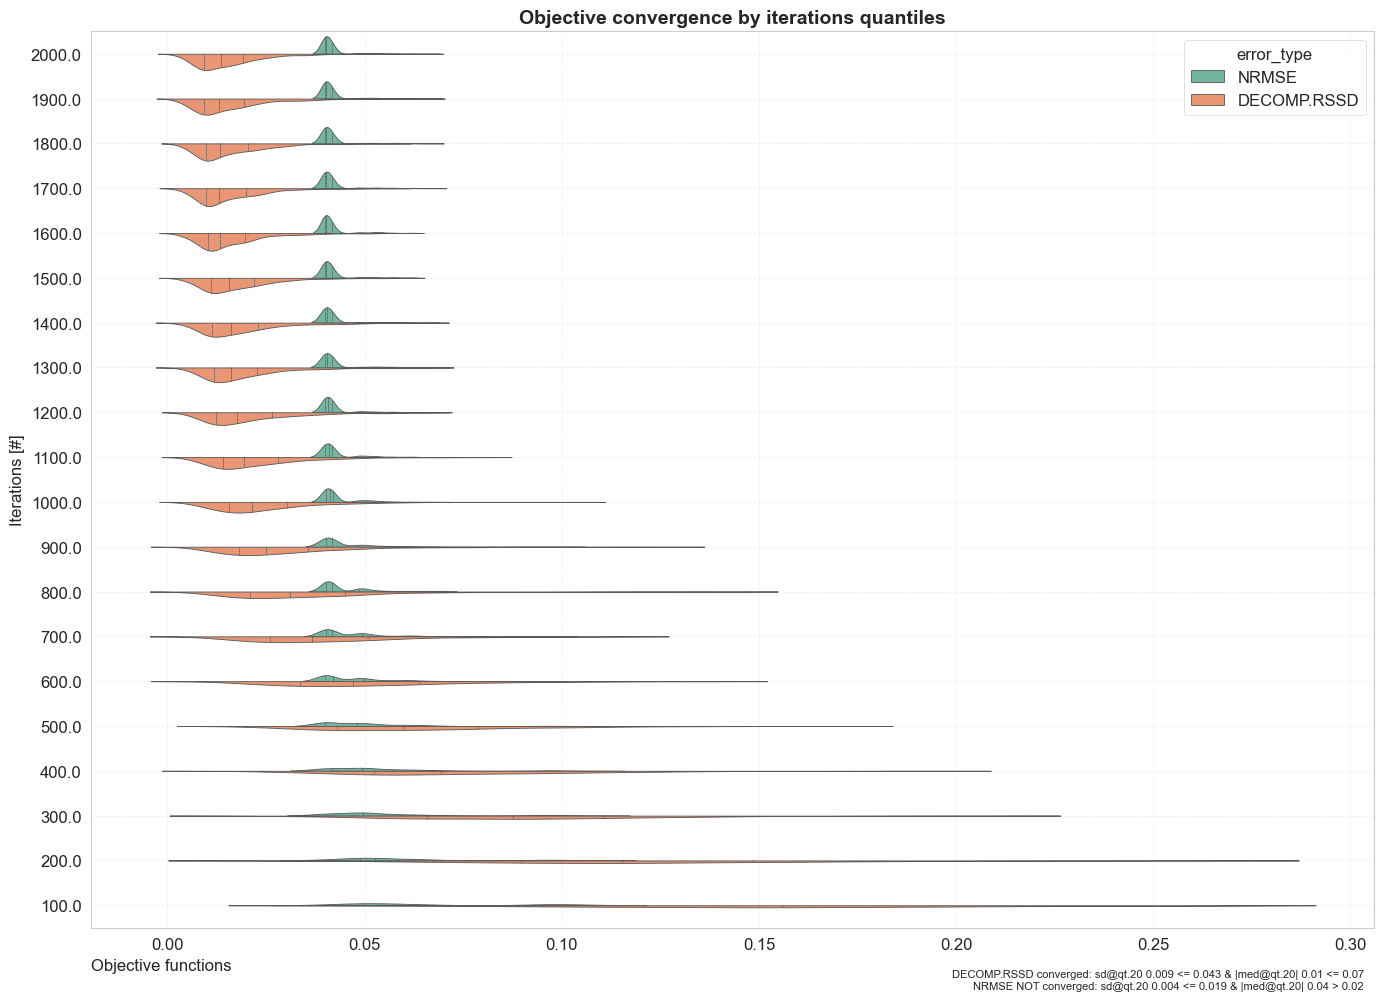

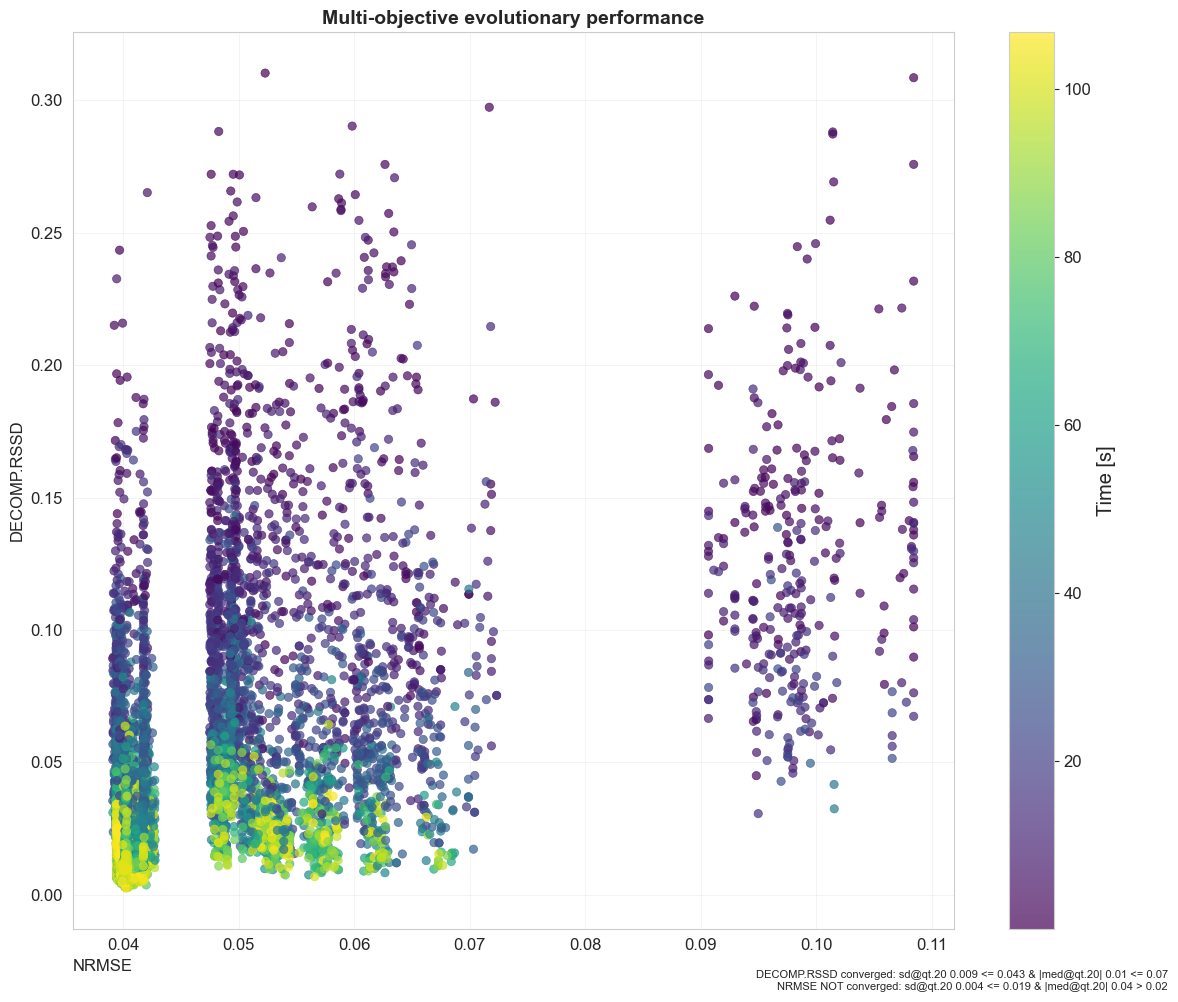

In [6]:
%matplotlib inline
from robyn.modeling.entities.enums import Models, NevergradAlgorithm
from robyn.modeling.entities.modelrun_trials_config import TrialsConfig


trials_config = TrialsConfig(iterations=2000, trials=5)

# Run the model
robyn.train_models(trials_config=trials_config,
                    ts_validation=True,  # changed from True to False -> deacitvate
                    add_penalty_factor=False,
                    rssd_zero_penalty=True,
                    cores=8,
                    nevergrad_algo=NevergradAlgorithm.TWO_POINTS_DE,
                    model_name=Models.RIDGE,
                )

## Evaluate Models

INFO: Evaluating models
2024-12-02 01:52:11,924 - robyn.robyn - INFO - Evaluating models
2024-12-02 01:52:11 [INFO] Starting Pareto optimization
2024-12-02 01:52:11 [INFO] Starting model data aggregation
2024-12-02 01:52:11 [INFO] Computing Pareto fronts
2024-12-02 01:52:12 [INFO] Pareto front computation completed
2024-12-02 01:52:12 [INFO] Preparing Pareto data
2024-12-02 01:52:12 [INFO] Number of Pareto-optimal solutions found: 8369
2024-12-02 01:52:12 [INFO] Selected 4 Pareto-fronts containing 141 candidates
2024-12-02 01:52:12 [INFO] Filtering data for selected Pareto fronts...
2024-12-02 01:52:12 [INFO] Calculating response curves for 705 models' media variables...
Processing rows: 100%|██████████| 705/705 [00:06<00:00, 109.86it/s]
2024-12-02 01:52:19 [INFO] Successfully processed 705 response curves
2024-12-02 01:52:19 [INFO] Computing final metrics...
2024-12-02 01:52:19 [INFO] Calculating ROI and CPA metrics...
2024-12-02 01:52:19 [INFO] Starting plot data generation...
2024-1

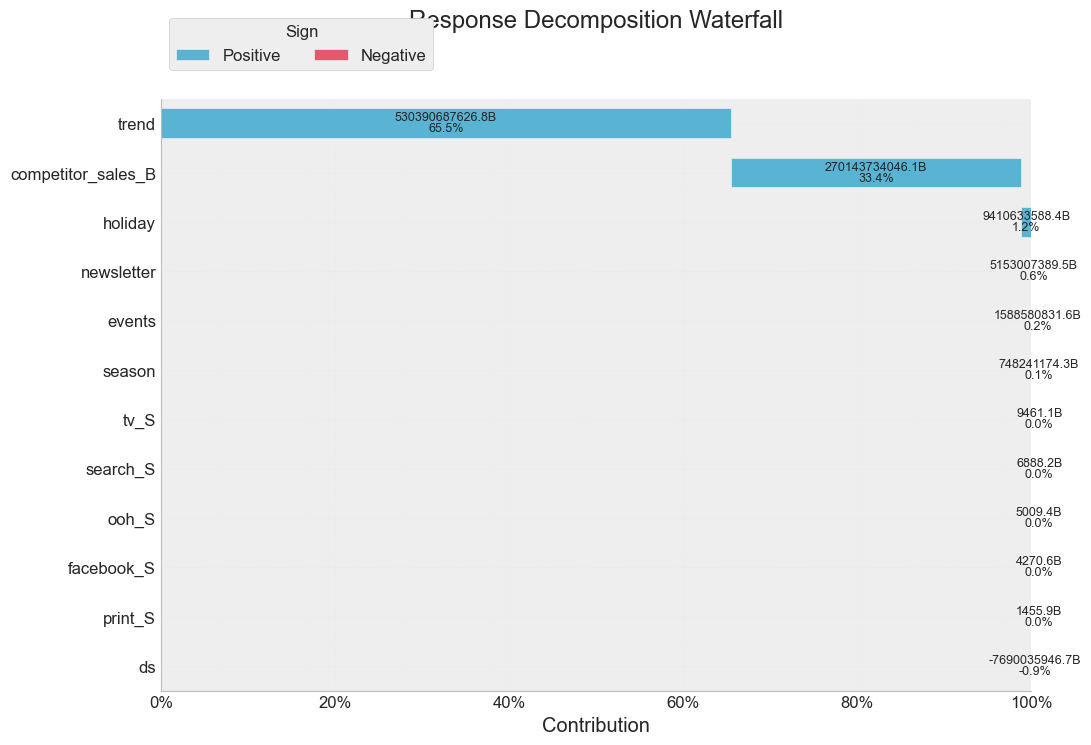

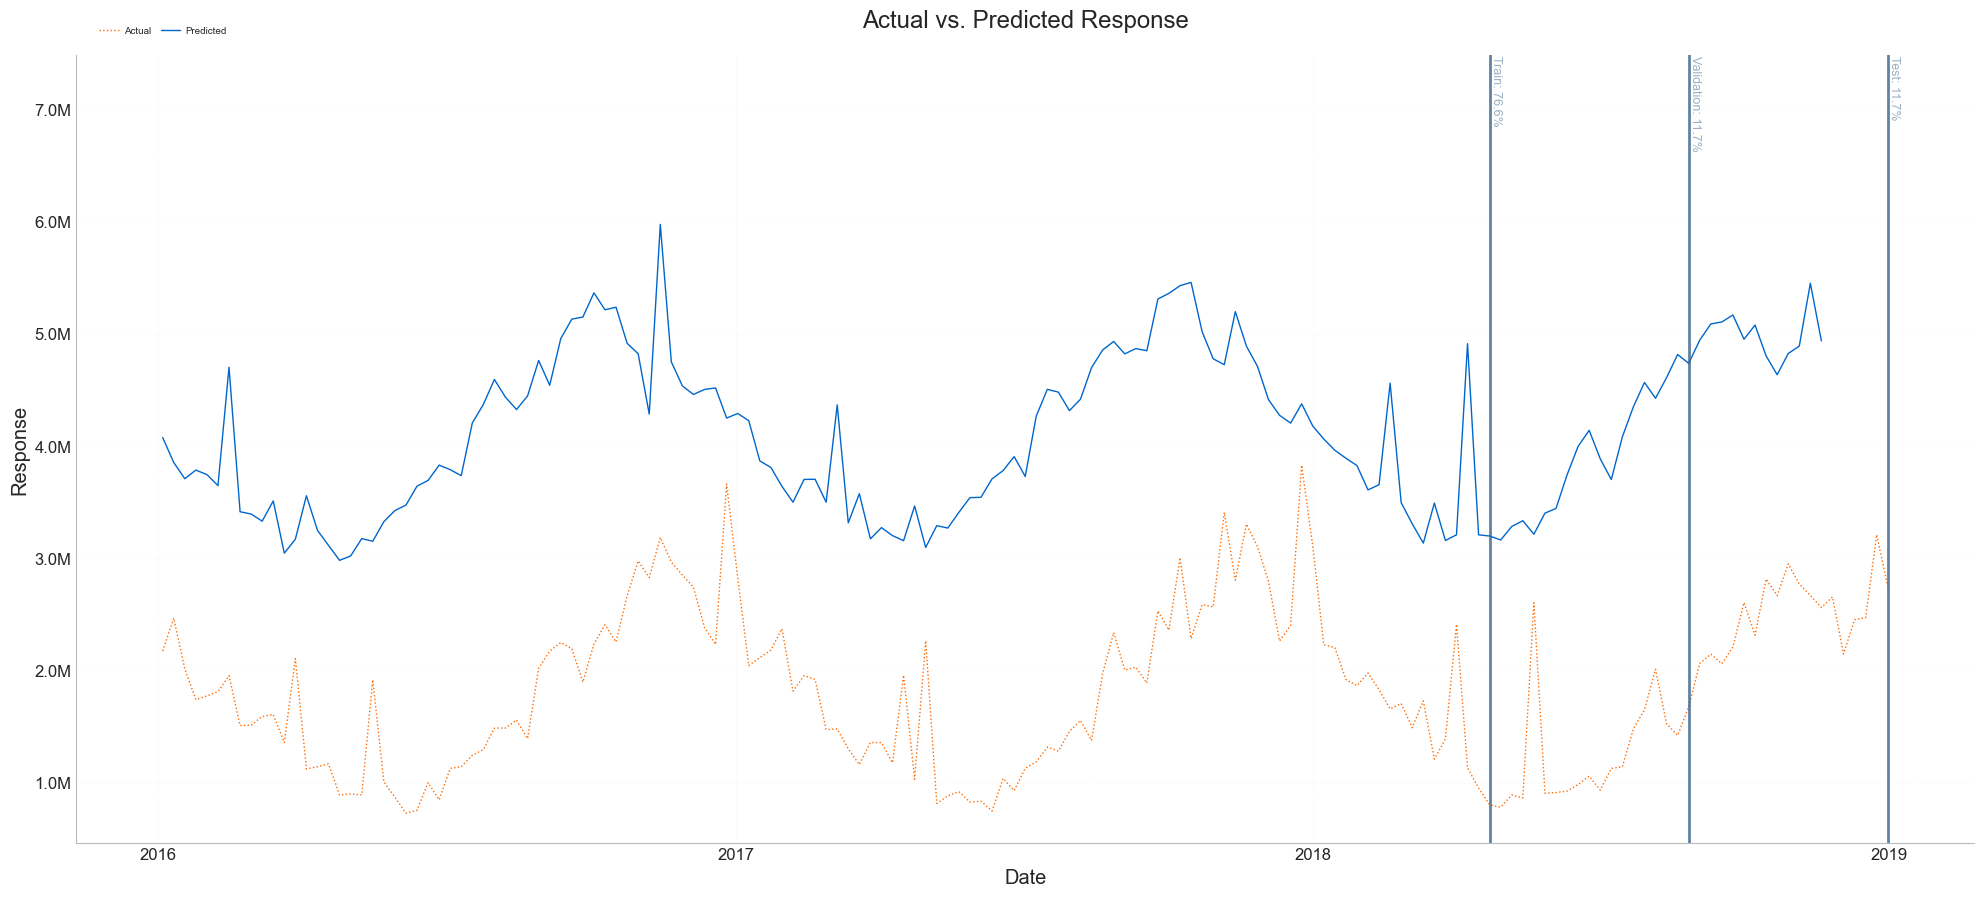

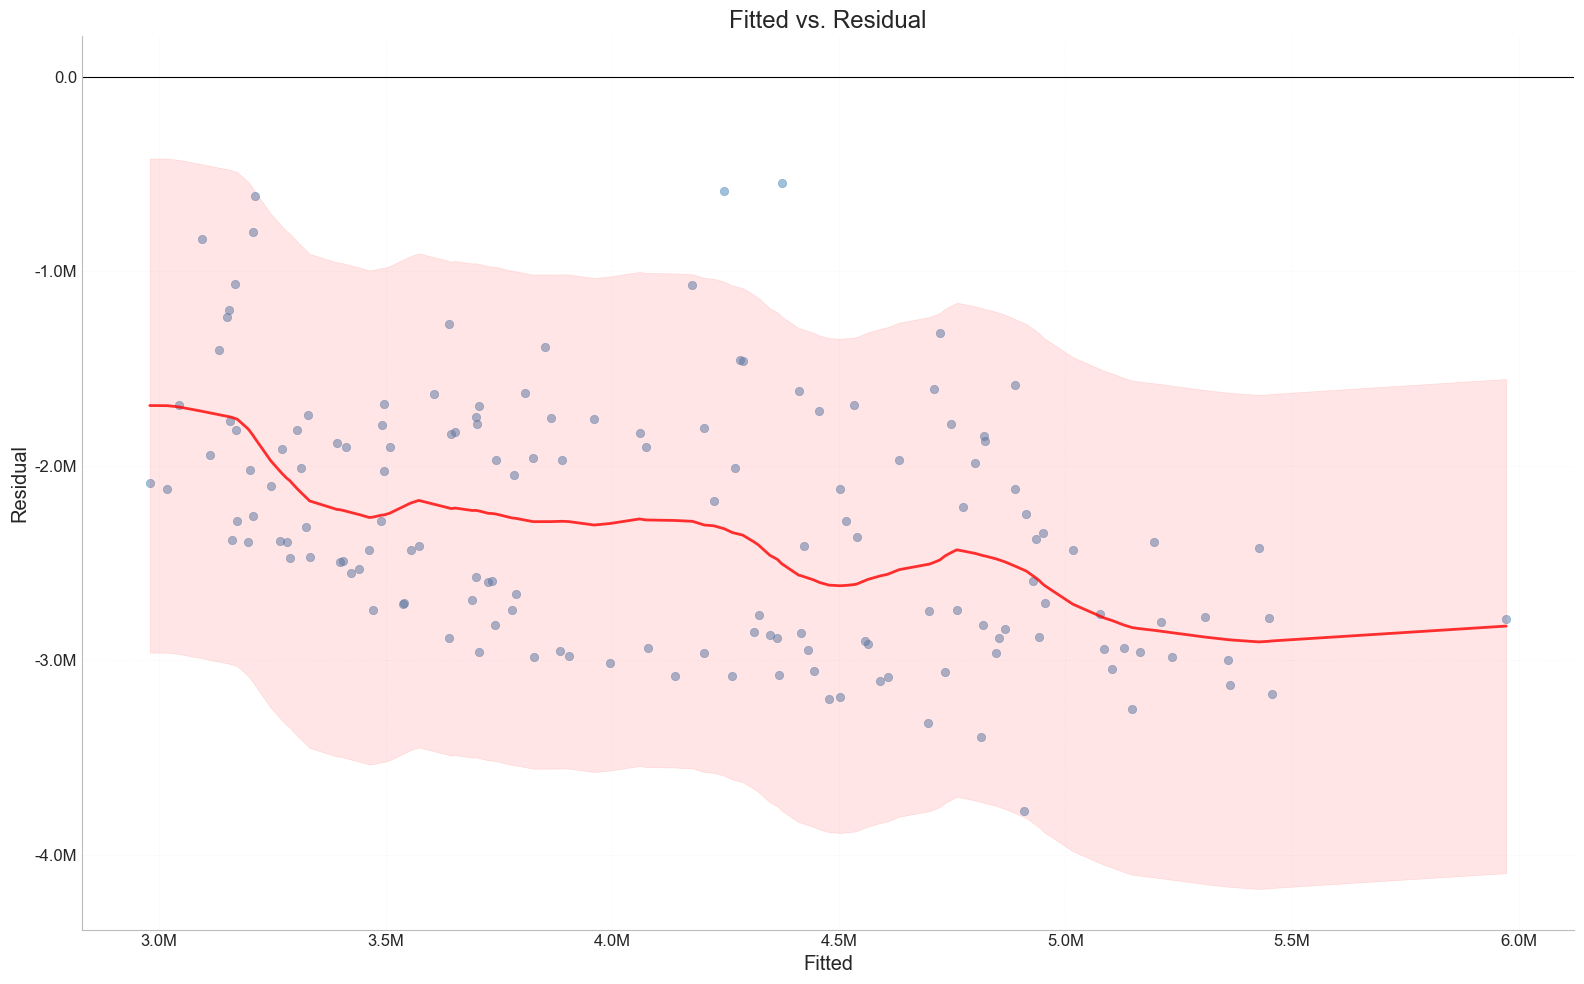

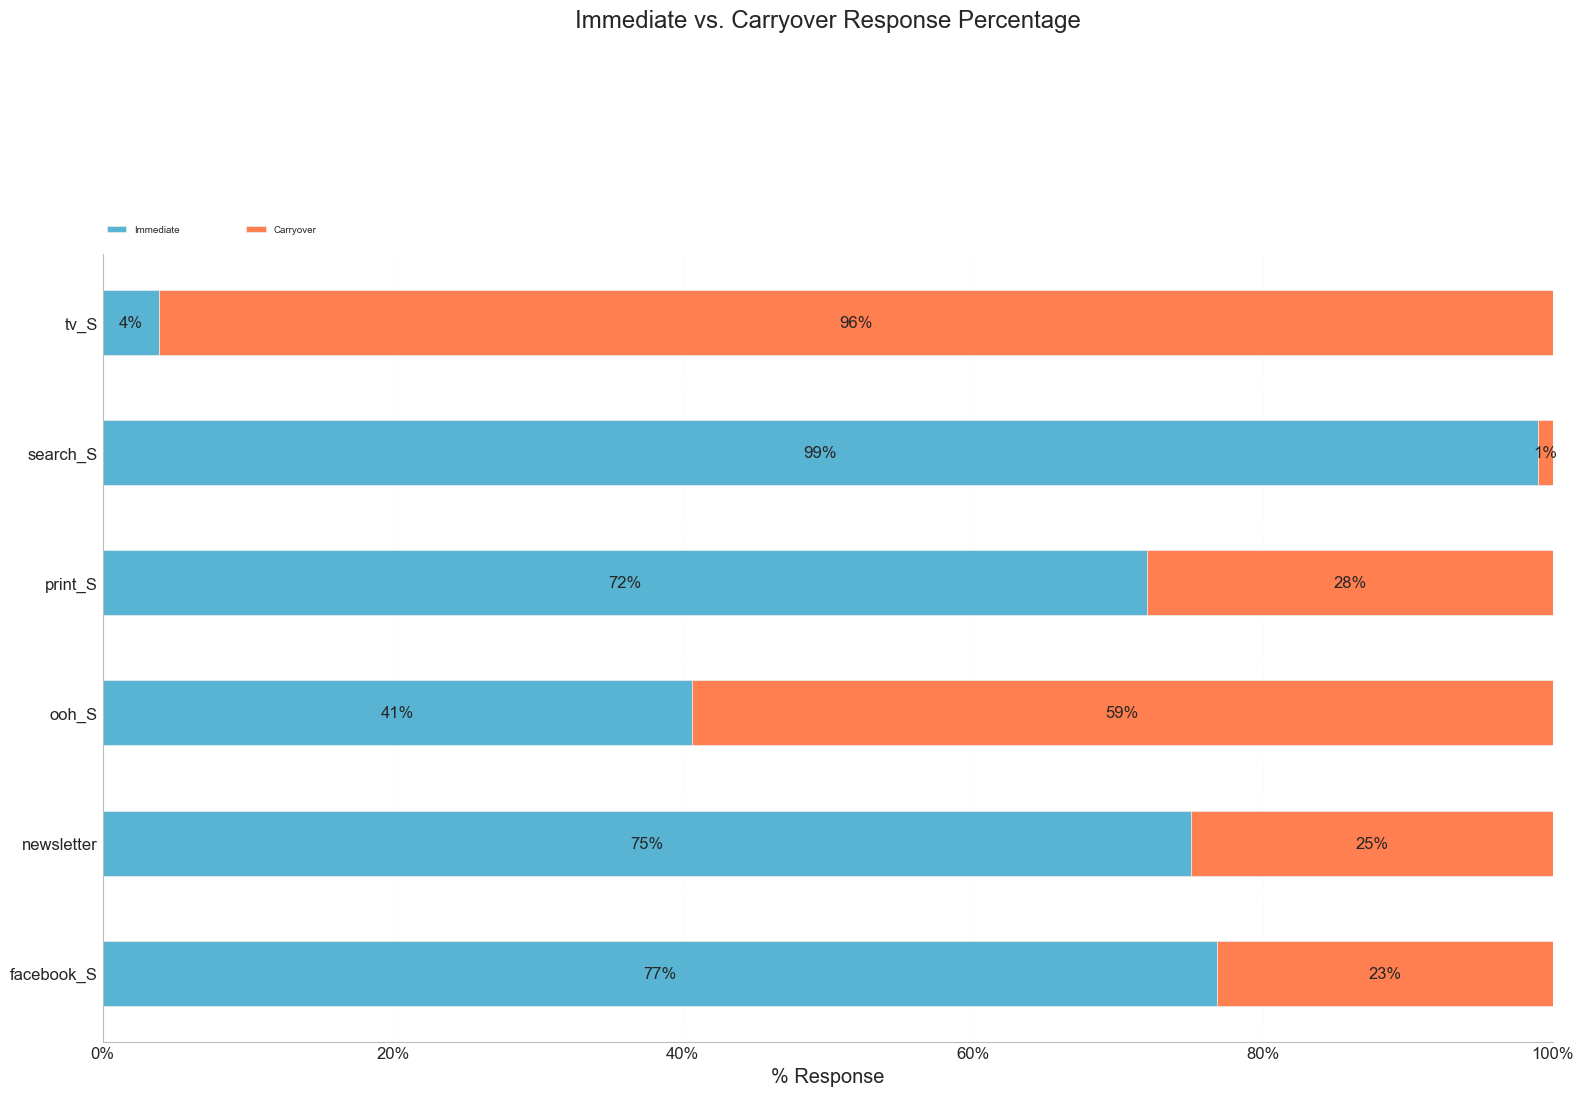

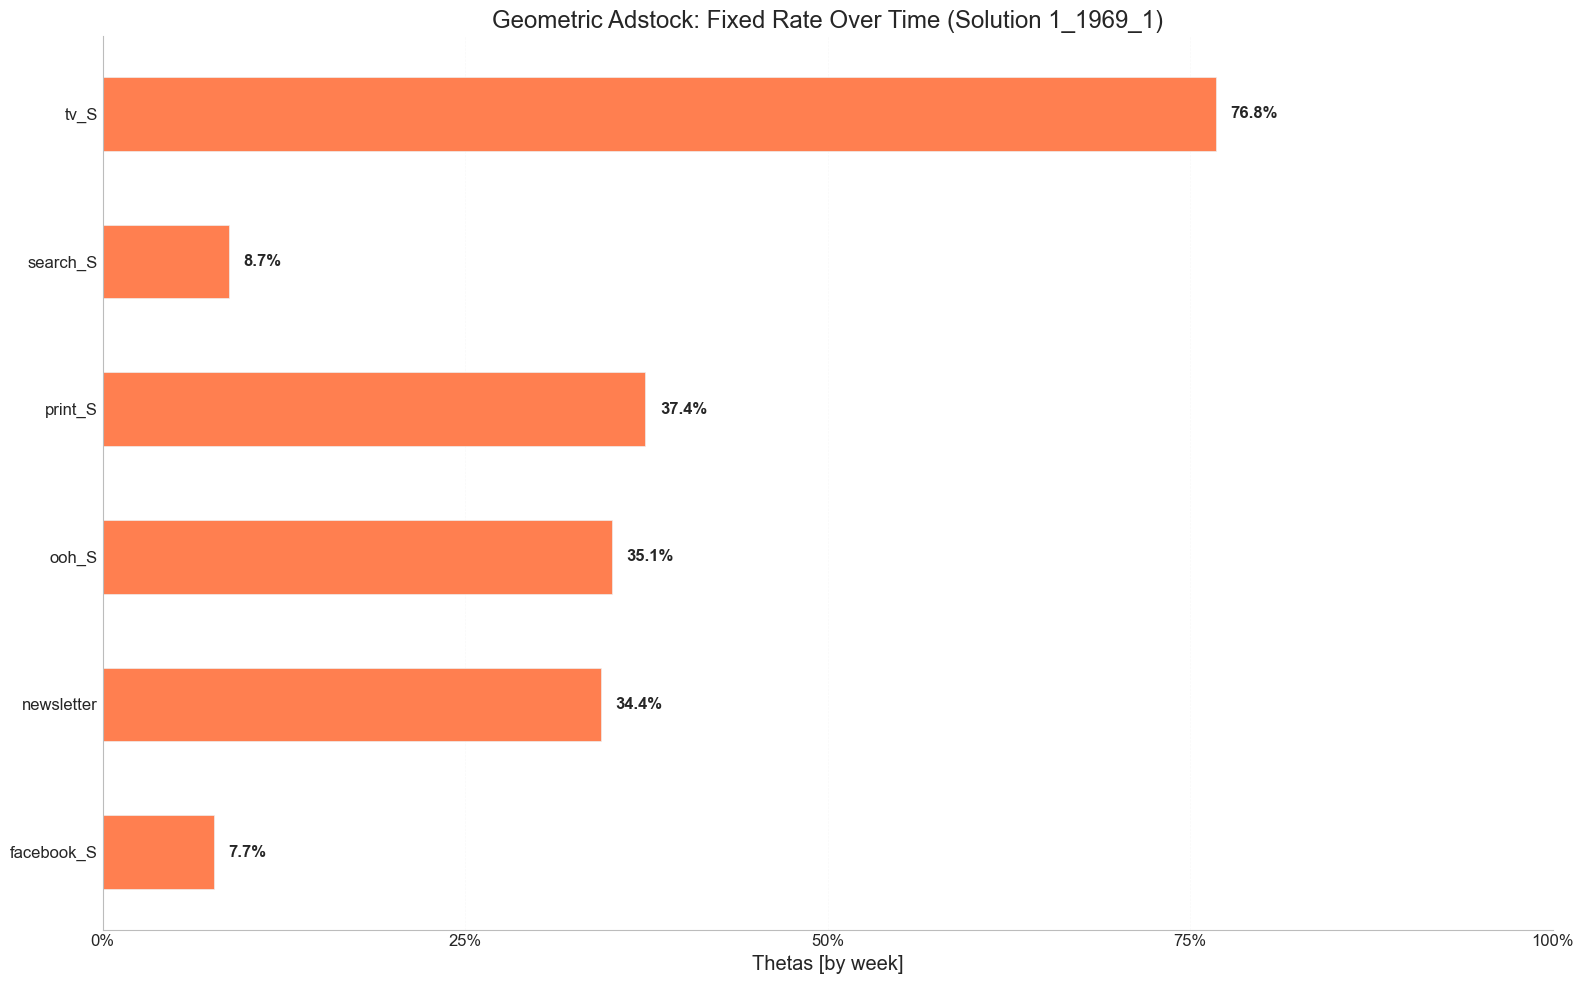

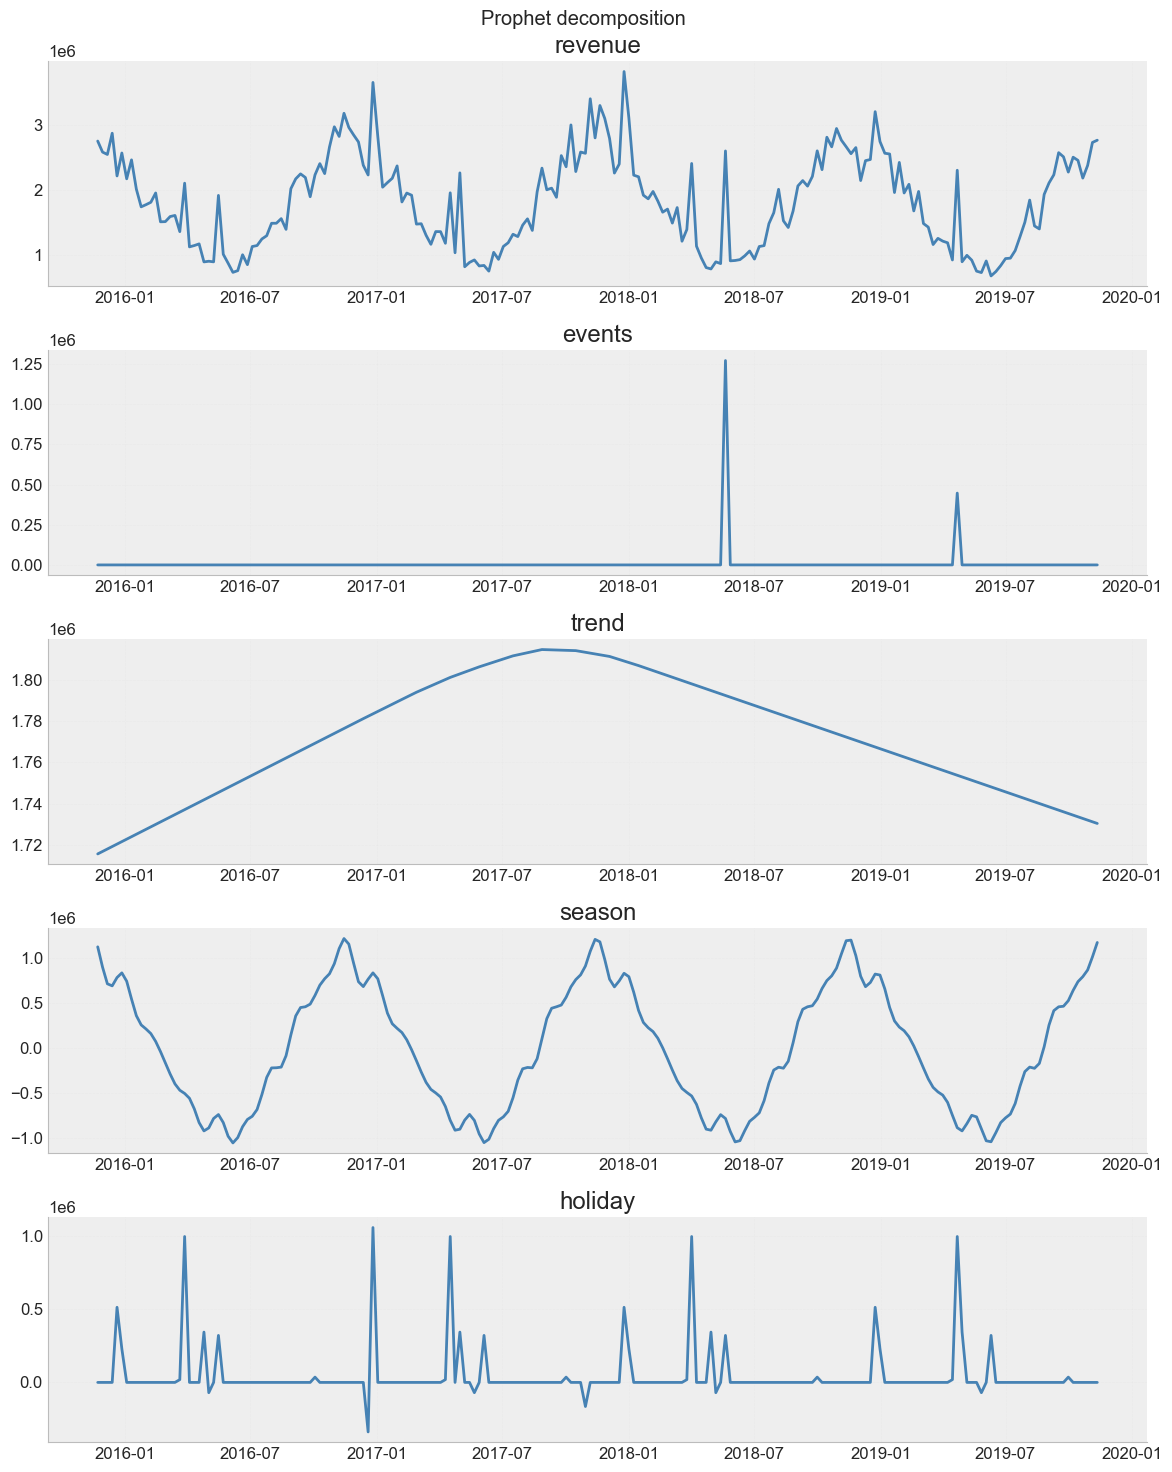

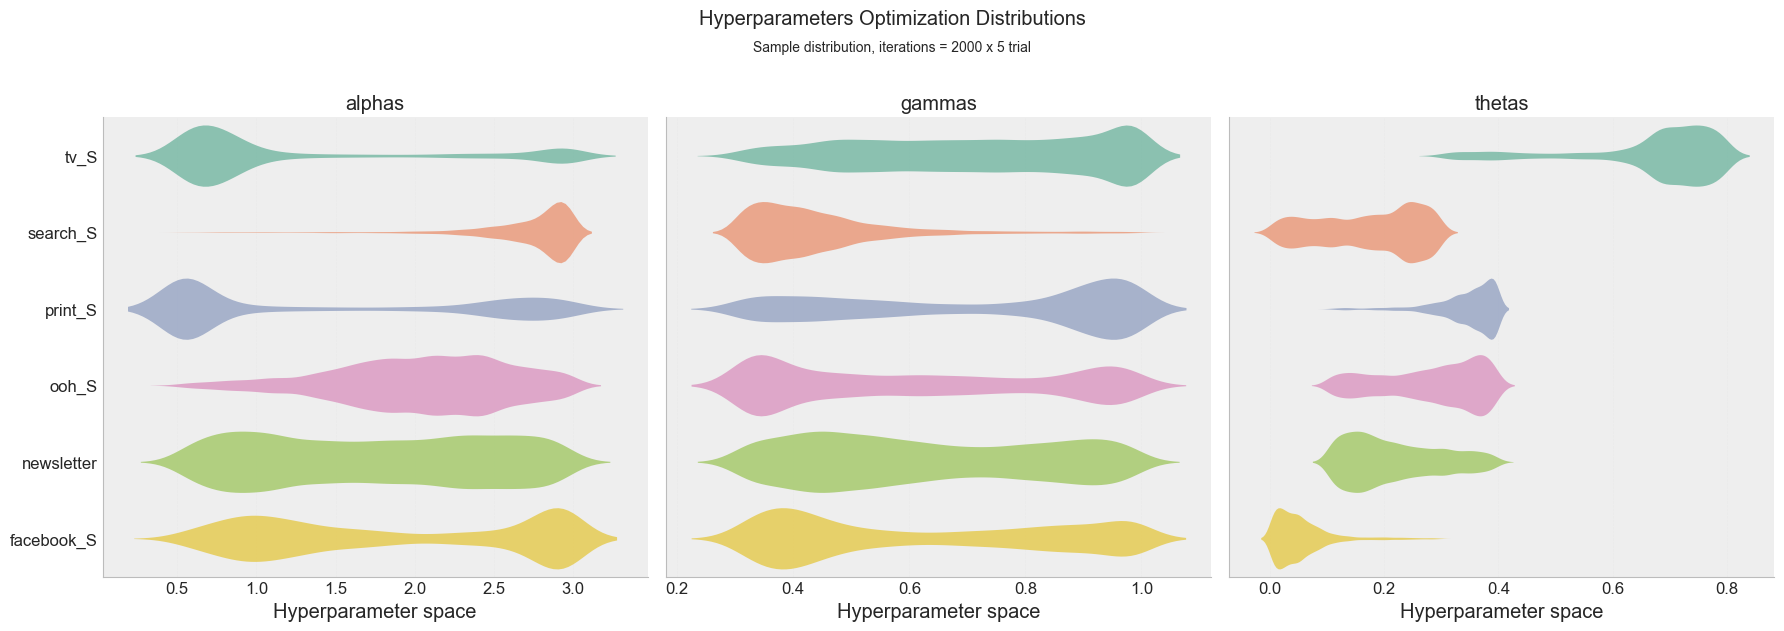

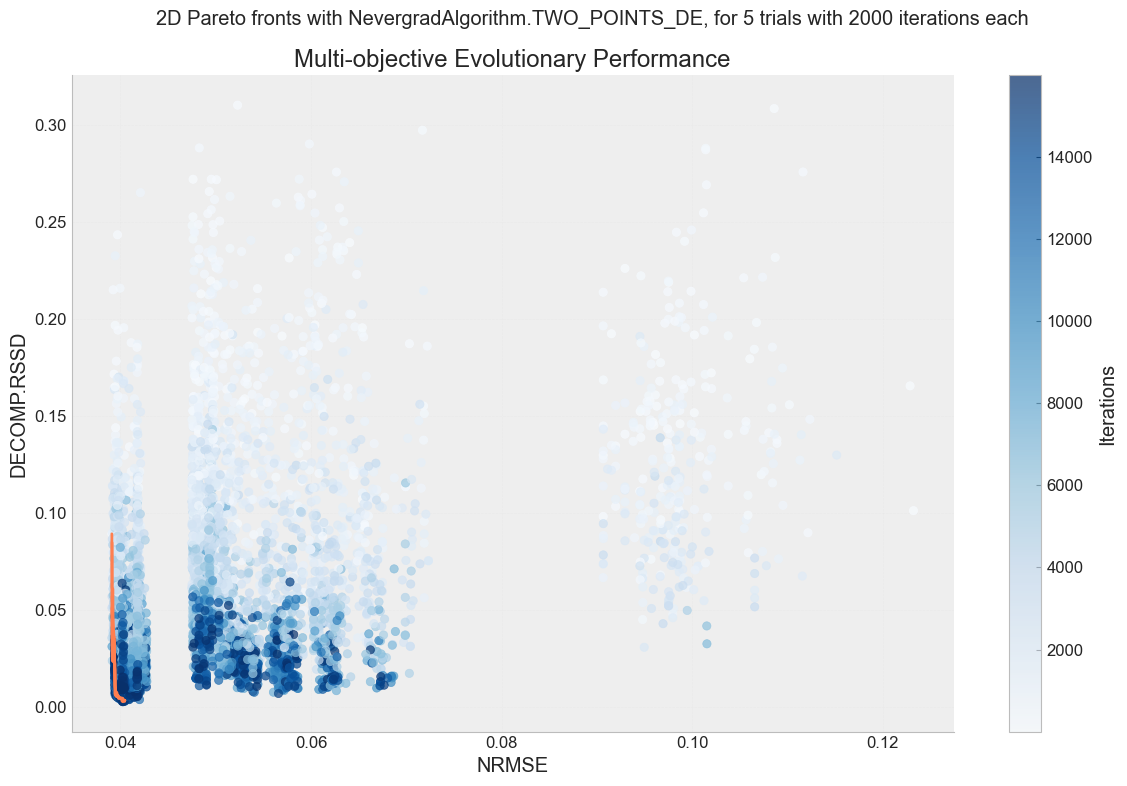

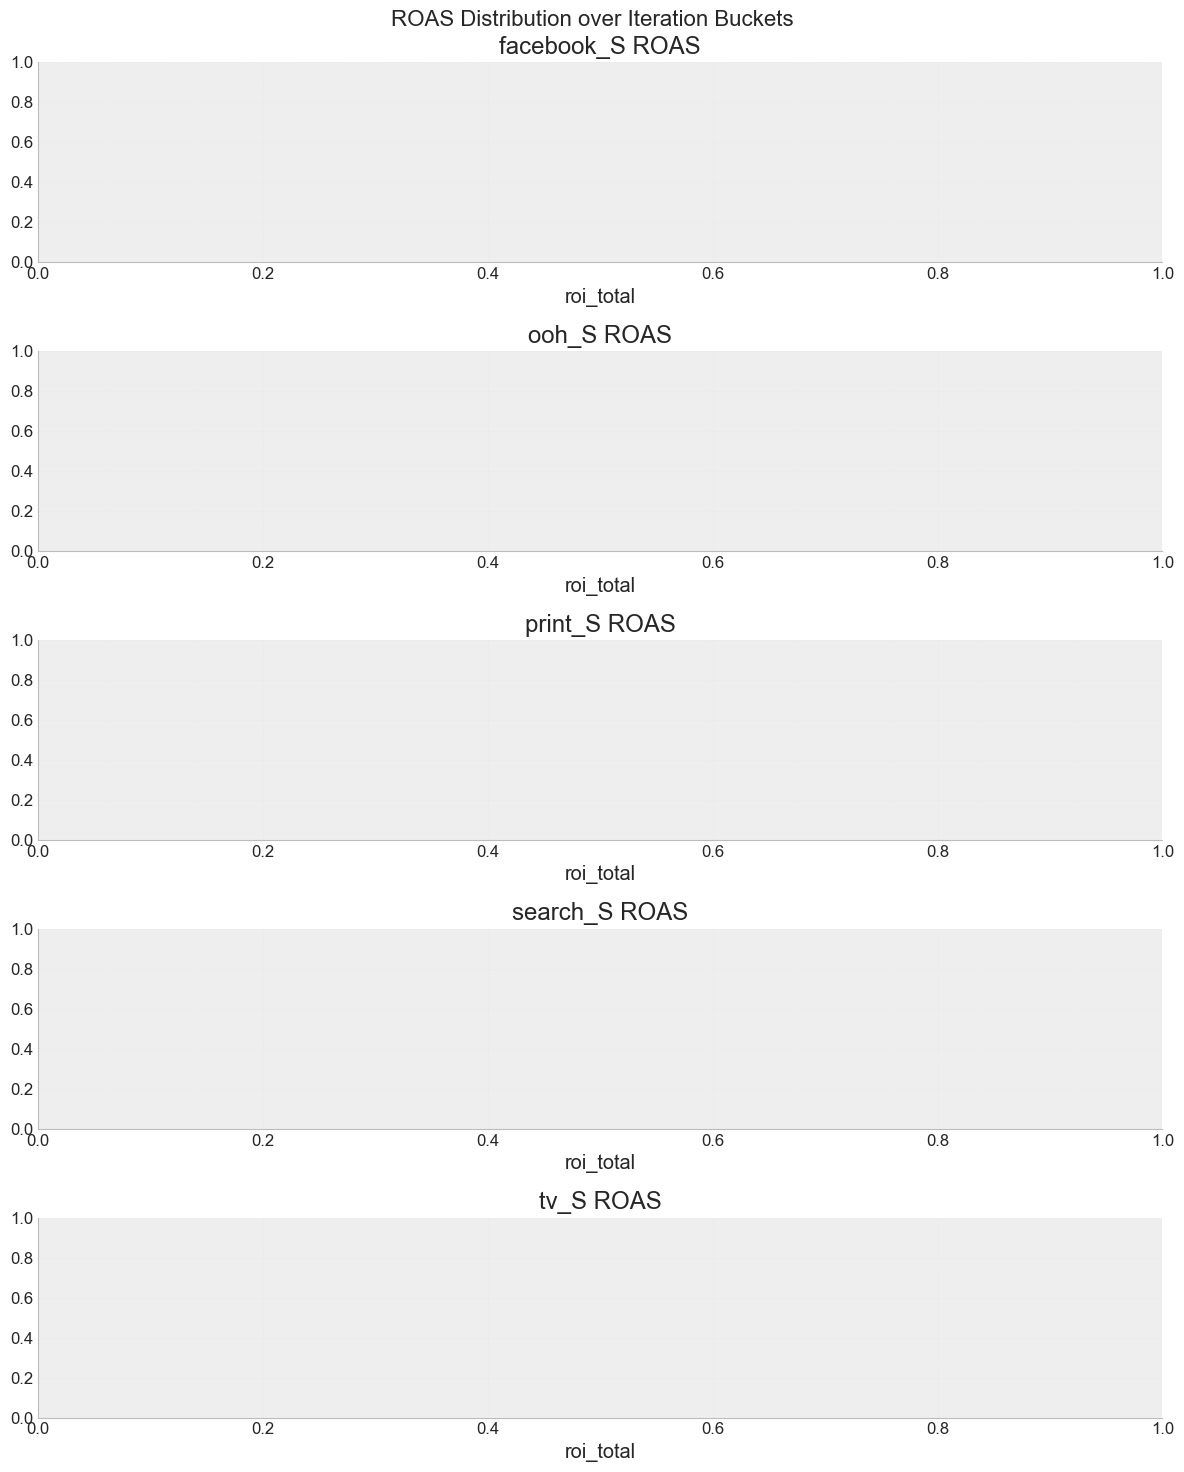

2024-12-02 01:52:52,270 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-12-02 01:52:52,271 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-12-02 01:52:52,271 - robyn.visualization.cluster_visualizer - WARNING - create_correlations_heatmap method is not implemented.


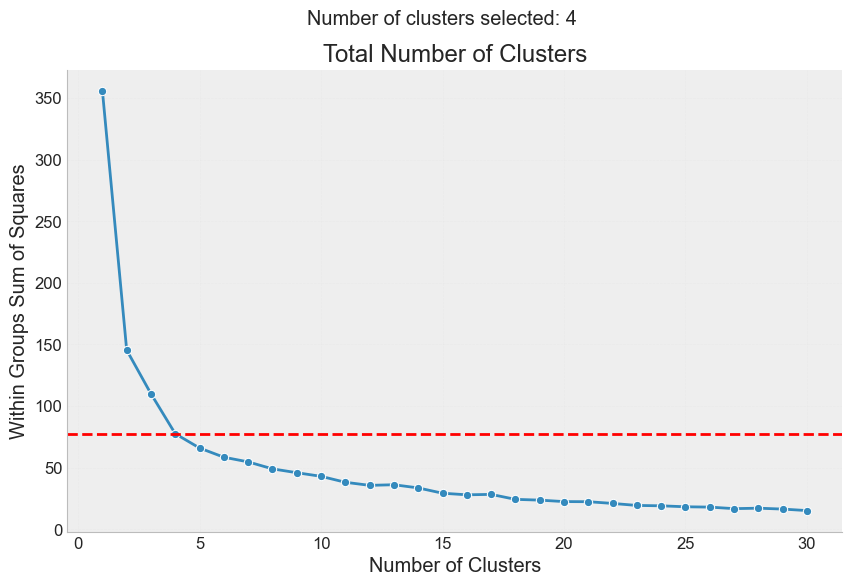

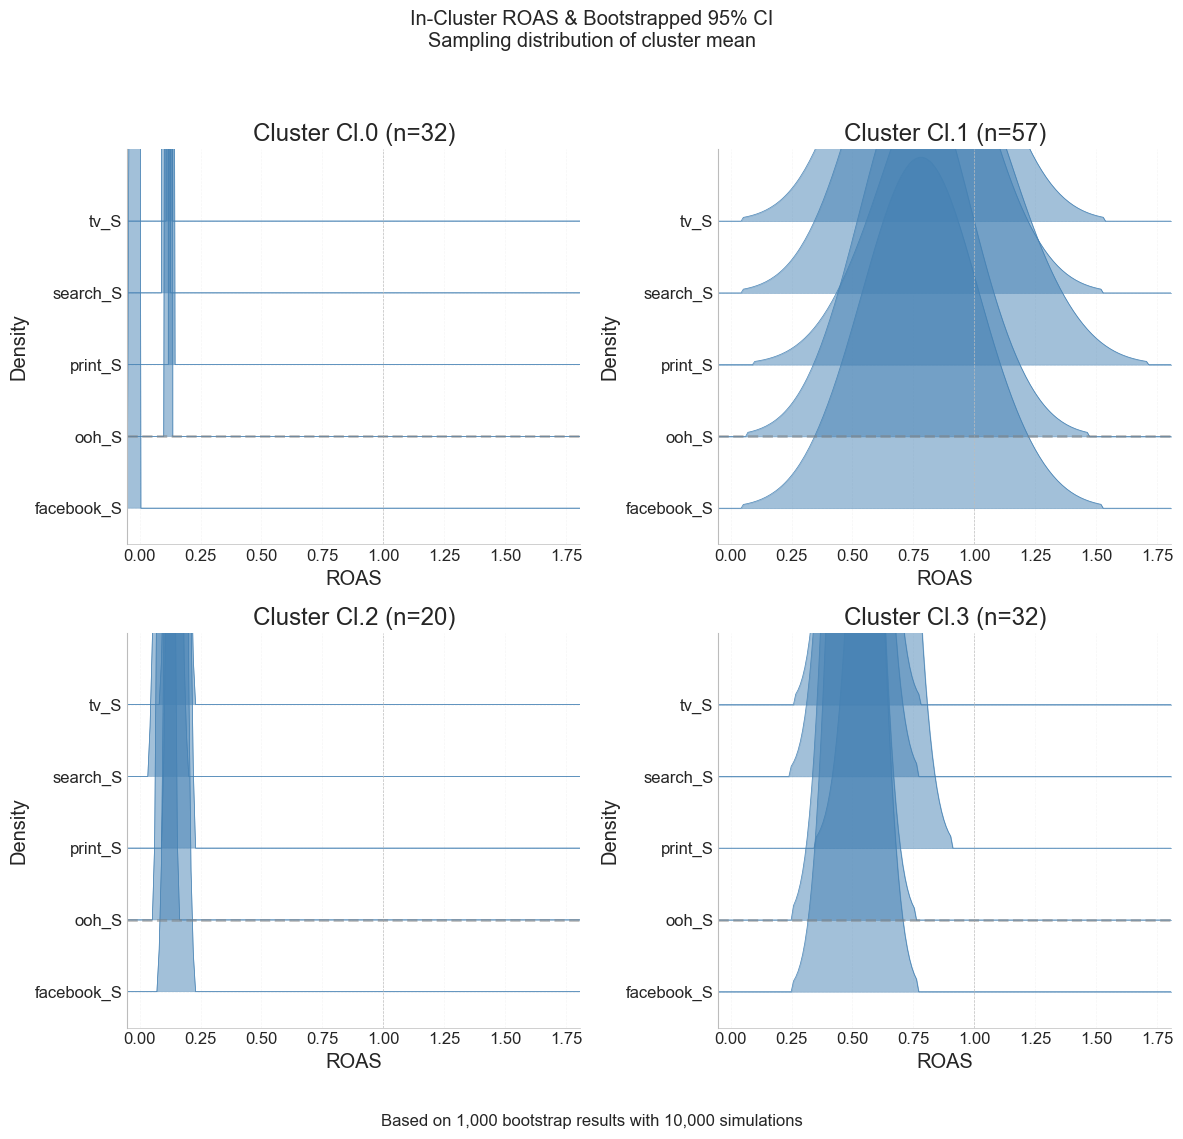

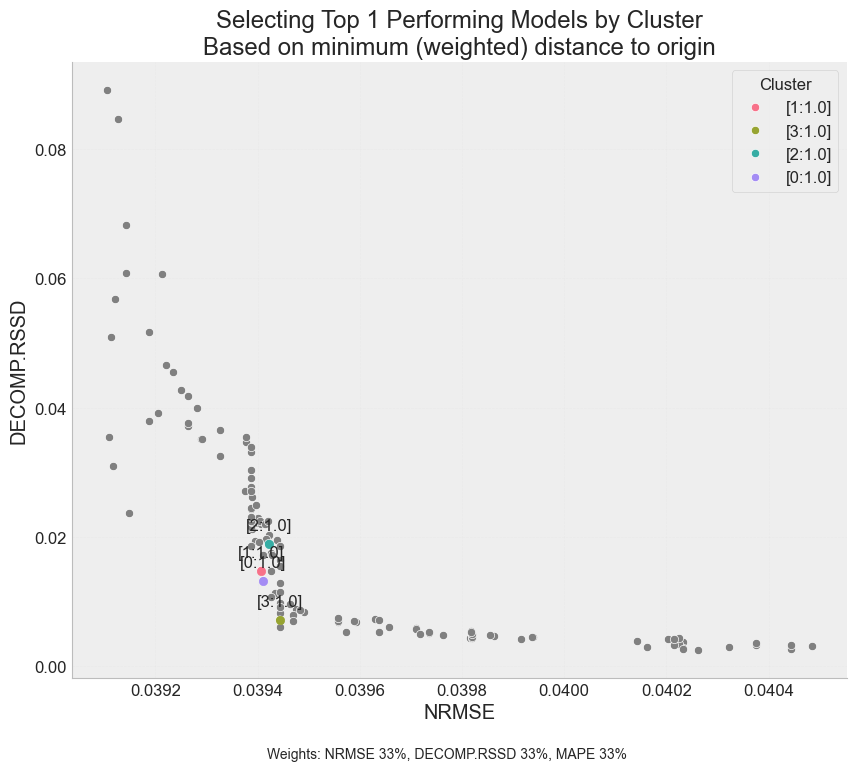

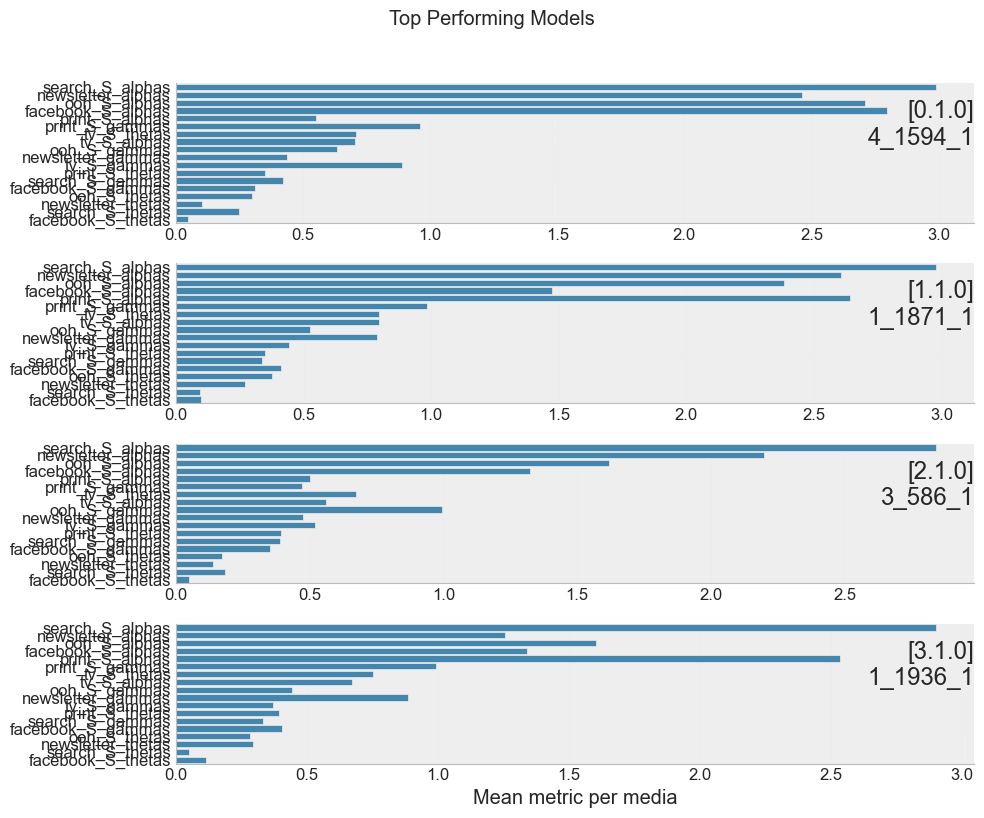

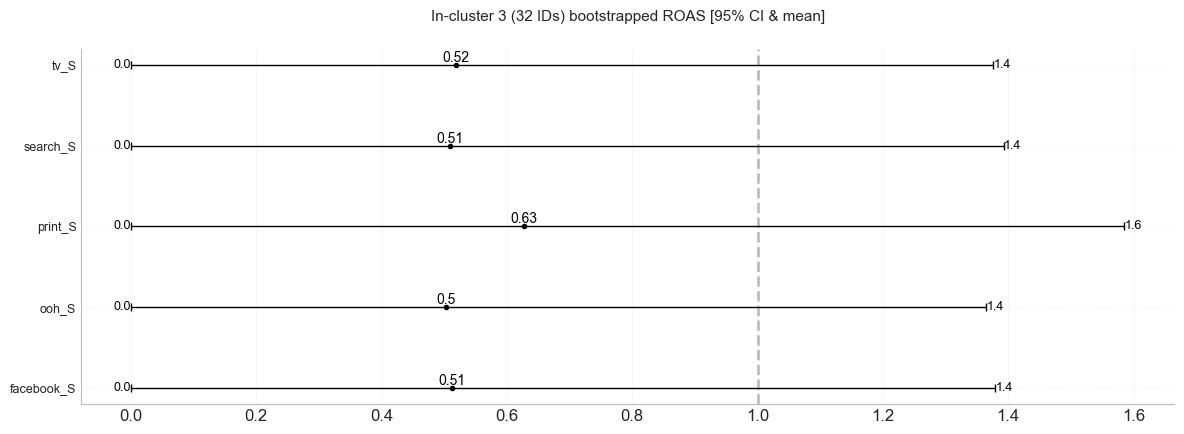

INFO: Model evaluation complete
2024-12-02 01:52:52,987 - robyn.robyn - INFO - Model evaluation complete


<Figure size 1200x1500 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

In [7]:
%matplotlib inline
from robyn.modeling.clustering.clustering_config import ClusterBy, ClusteringConfig

configs = ClusteringConfig(
    dep_var_type= DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by = ClusterBy.HYPERPARAMETERS,
    max_clusters = 10,
    min_clusters = 3,
    weights=[1.0, 1.0, 1.0]
)
robyn.evaluate_models(cluster_config=configs)

## Robyn One Pager Report

2024-12-02 01:52:53,001 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-12-02 01:52:53,002 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-12-02 01:52:53,002 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-12-02 01:52:53,003 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-12-02 01:52:53,003 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-12-02 01:52:53,003 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-12-02 01:52:53,004 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-12-02 01:52:53,004 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-12-02 01:52:53,053 - robyn.reporting.onepager_reporting - ERROR - Failed to generate plot B

ValueError: 'xerr' must not contain negative values

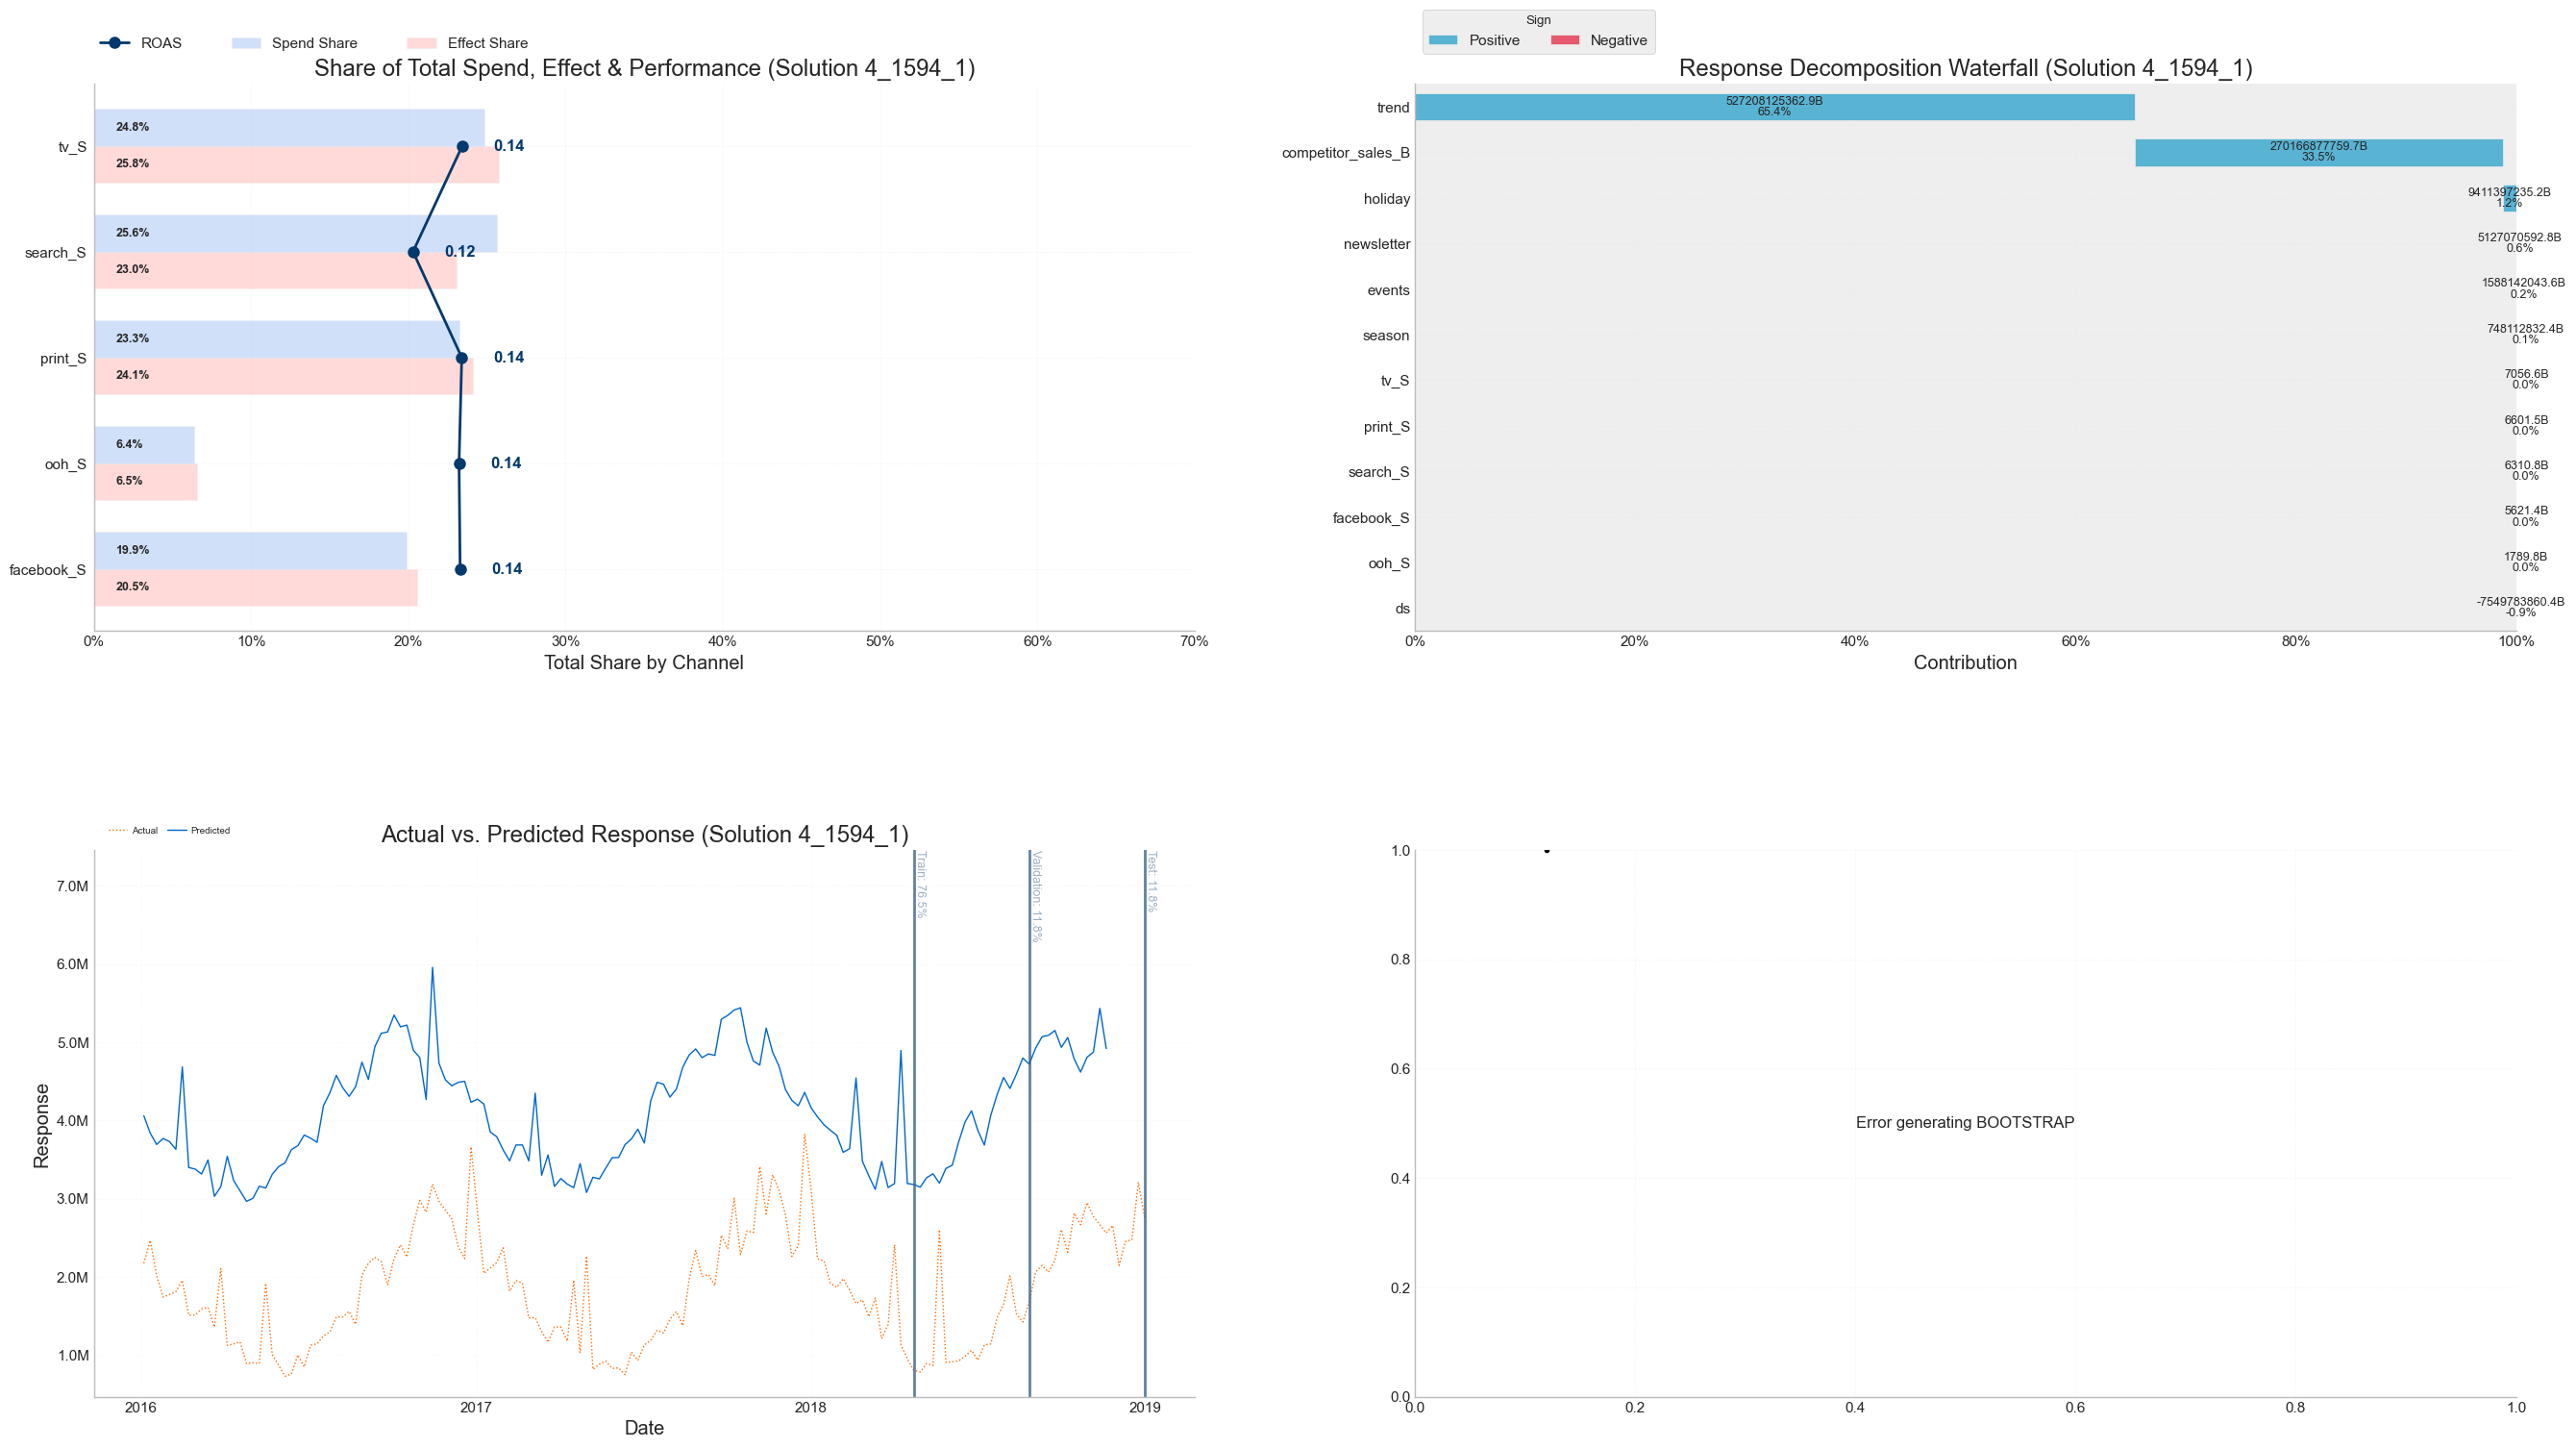

In [8]:
robyn.generate_one_pager()

In [ ]:
robyn.generate_one_pager(solution_id="1_1994_1")

## 4. Budget Allocation

Finally, let's perform budget allocation using the trained model.

This notebook demonstrates the basic workflow of using Robyn for Marketing Mix Modeling. In a real-world scenario, you would need to replace the synthetic data with your actual marketing data and adjust the parameters accordingly.

Remember to explore the full capabilities of Robyn, including model evaluation, visualization, and interpretation of results, which are beyond the scope of this basic demonstration.

In [ ]:
%matplotlib inline
from robyn.allocator.entities.allocation_params import AllocatorParams
from robyn.allocator.entities.allocation_result import (
    AllocationResult,
    OptimOutData,
    MainPoints,
)
from robyn.allocator.entities.optimization_result import OptimizationResult
from robyn.allocator.entities.constraints import Constraints
from robyn.allocator.optimizer import BudgetAllocator
from robyn.allocator.constants import (
    SCENARIO_MAX_RESPONSE,
    ALGO_SLSQP_AUGLAG,
    CONSTRAINT_MODE_EQ,
    DEFAULT_CONSTRAINT_MULTIPLIER,
    DATE_RANGE_ALL,
)
%load_ext autoreload
%autoreload 2

# Create allocator parameters matching R Example 1
allocator_params = AllocatorParams(
    scenario=SCENARIO_MAX_RESPONSE,
    total_budget=None,  # When None, uses total spend in date_range
    target_value=None,
    date_range="all",
    channel_constr_low=[0.7],  # Single value for all channels
    channel_constr_up=[1.2, 1.5, 1.5, 1.5, 1.5],  # Different values per channel
    channel_constr_multiplier=3.0,
    optim_algo="SLSQP_AUGLAG",
    maxeval=100000,
    constr_mode=CONSTRAINT_MODE_EQ,
    plots=True,
)

# Call the budget_allocator method
allocation_result = robyn.optimize_budget(
    allocator_params=allocator_params,
    select_model=None,
)
# Display the allocation result
print(allocation_result)